#Assignment 02 Group 13

Muhammad Taqiand Muhammad Shayaan

Data Science for Social Good

Dr Usman Arif

In [1]:
# Install required packages
# !pip install ucimlrepo seaborn matplotlib pandas numpy scipy
!pip install ucimlrepo

In [2]:
# Setup and Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from scipy import stats
import warnings
import random
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# Ensuring reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)

# Task 1 - EDA

In [3]:
# Fetch dataset
census_income = fetch_ucirepo(id=20)

X = census_income.data.features
y = census_income.data.targets
df = pd.concat([X, y], axis=1)

print("✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Features: {X.shape[1]}")
print(f"Target variable: {y.shape[1]}")

✅ Dataset loaded successfully!
Shape: (48842, 15)
Features: 14
Target variable: 1


In [4]:
# Dataset Info
print("\n📊 Dataset Overview")
print("=" * 50)
print(f"Shape: {df.shape}")
print(f"Duplicate rows: {df.duplicated().sum()}")

print("\nColumn names and data types:")
print(df.dtypes)

print("\nFirst 5 rows:")
display(df.head())

# Loop through each column and display unique values
for col in df.columns:
    print(f"\n--- {col} ---")
    print(df[col].unique())


📊 Dataset Overview
Shape: (48842, 15)
Duplicate rows: 29

Column names and data types:
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

First 5 rows:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K



--- age ---
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

--- workclass ---
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

--- fnlwgt ---
[ 77516  83311 215646 ... 173449  89686 350977]

--- education ---
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

--- education-num ---
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

--- marital-status ---
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

--- occupation ---
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 

In [5]:
# Data Cleaning

# Remove duplicates
df = df.drop_duplicates()

# Fix inconsistent income labels (<=50K. and >50K.)
df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

# Handle '?' placeholders in object columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].replace('?', np.nan)

In [6]:
# Missing Values Analysis
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("pastel")

# Step 1: Impute Missing Values
# Missing categorical values are filled with 'Unknown' instead of dropping rows.
# This preserves all 100% of rows (about 7% had missing categorical values)
# and allows models to treat missingness as informative rather than random.

for col in ['workclass', 'occupation', 'native-country']:
    df[col] = df[col].fillna('Unknown')

print(f"{df.isnull().sum().sum()} missing values remain after imputation.\n")

# Step 2: Summary of 'Unknown' Counts
# Displays the count and percentage of 'Unknown' entries for each feature.
unknown_counts = df[['workclass', 'occupation', 'native-country']].apply(lambda x: (x == 'Unknown').sum())
unknown_percents = (unknown_counts / len(df) * 100).round(2)
unknown_summary = pd.DataFrame({
    'Unknown Count': unknown_counts,
    'Unknown %': unknown_percents
})

print("Frequency of 'Unknown' Values per Feature:")
print(unknown_summary.to_string())
print("\n")

0 missing values remain after imputation.

Frequency of 'Unknown' Values per Feature:
                Unknown Count  Unknown %
workclass                2799       5.73
occupation               2809       5.75
native-country            856       1.75




# Interpretation:
0 missing values remain after imputation.
- workclass: 2,799 Unknowns (5.73%)
- occupation: 2,809 Unknowns (5.75%)
- native-country: 856 Unknowns (1.75%)

Roughly 7% of data had missing values. These are all categorical,
so they’re replaced with 'Unknown' instead of dropping rows.

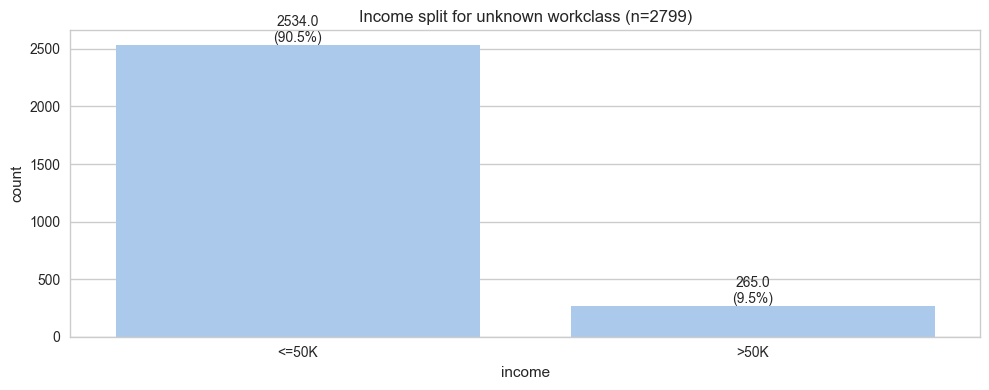

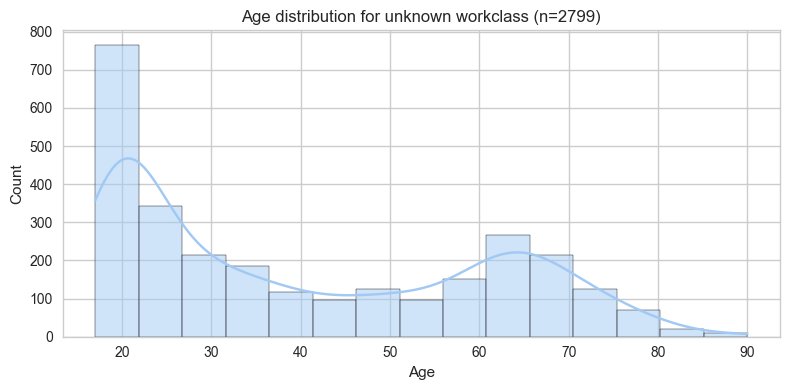

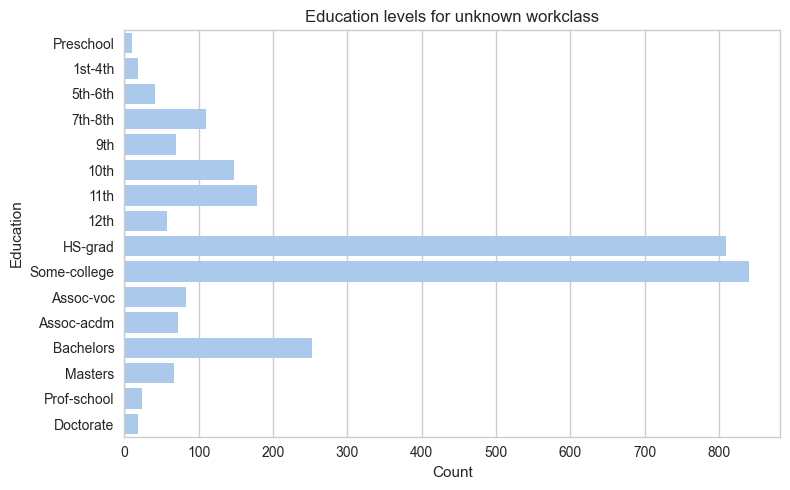

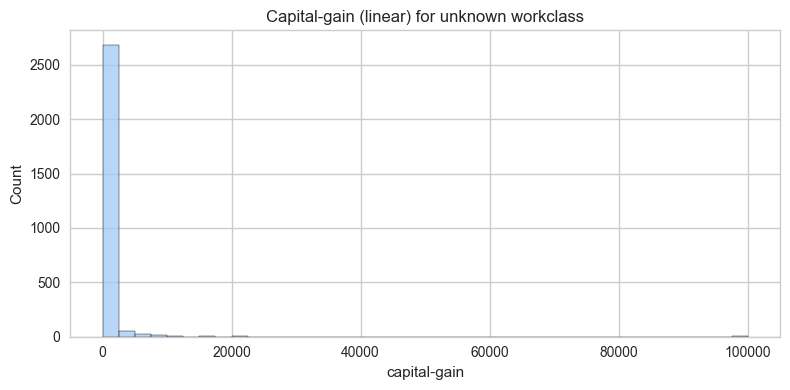

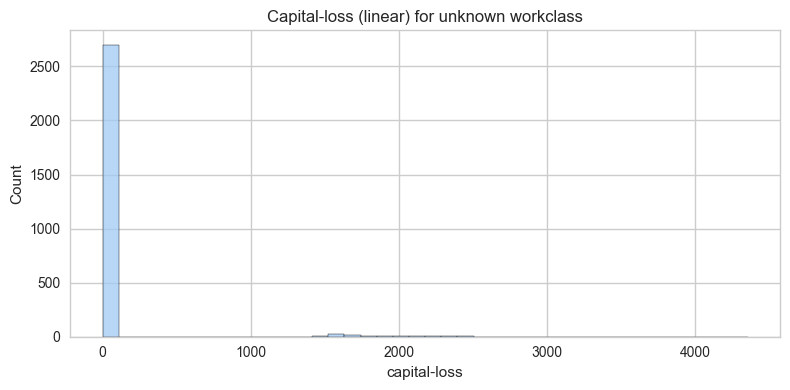

In [7]:
# Visuals for Unknown values in Workclass
education_order = [
    'Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th',
    'HS-grad','Some-college','Assoc-voc','Assoc-acdm','Bachelors','Masters',
    'Prof-school','Doctorate'
]

col = 'workclass'

mask_unknown = (
    df[col].isna()
    | df[col].astype(str).str.strip().eq('?')
    | df[col].astype(str).str.strip().str.lower().eq('unknown')
)

subset = df[mask_unknown].copy()

if subset.empty:
    print(f"No unknown values found for column '{col}'.")
else:
    subset['age'] = pd.to_numeric(subset['age'], errors='coerce')
    subset['capital-gain'] = pd.to_numeric(subset['capital-gain'], errors='coerce')
    subset['capital-loss'] = pd.to_numeric(subset['capital-loss'], errors='coerce')
    subset['education'] = subset['education'].astype(str)
    subset['income'] = subset['income'].astype(str)

    # 1) Income split bar chart
    plt.figure(figsize=(10,4))
    order = ['<=50K', '>50K'] if set(['<=50K','>50K']).issubset(subset['income'].unique()) else subset['income'].unique()
    ax = sns.countplot(data=subset, x='income', order=order)
    total = len(subset)
    for p in ax.patches:
        height = p.get_height()
        pct = 100 * height / total if total>0 else 0
        ax.annotate(f'{height}\n({pct:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')
    plt.title(f"Income split for unknown {col} (n={total})")
    plt.tight_layout()
    plt.show()

    # 2) Age distribution
    plt.figure(figsize=(8,4))
    sns.histplot(subset['age'].dropna(), bins=15, kde=True)
    plt.title(f"Age distribution for unknown {col} (n={total})")
    plt.xlabel("Age")
    plt.tight_layout()
    plt.show()

    # 3) Education distribution
    plt.figure(figsize=(8,5))
    edu_present = [e for e in education_order if e in subset['education'].unique()]
    if edu_present:
        ax = sns.countplot(data=subset, y='education', order=edu_present)
        plt.title(f"Education levels for unknown {col}")
        plt.xlabel("Count")
        plt.ylabel("Education")
        plt.tight_layout()
        plt.show()
    else:
        print("No recognized education categories present in this subset.")

    # 4) Capital-gain (linear + log)
    gains = subset['capital-gain'].fillna(0)
    if len(gains) > 0:
        plt.figure(figsize=(8,4))
        sns.histplot(gains, bins=40)
        plt.title(f"Capital-gain (linear) for unknown {col}")
        plt.tight_layout()
        plt.show()

    else:
        print("No capital-gain data available in this subset.")

    # 5) Capital-loss (linear + log)
    losses = subset['capital-loss'].fillna(0)
    if len(losses) > 0:
        plt.figure(figsize=(8,4))
        sns.histplot(losses, bins=40)
        plt.title(f"Capital-loss (linear) for unknown {col}")
        plt.tight_layout()
        plt.show()

    else:
        print("No capital-loss data available in this subset.")


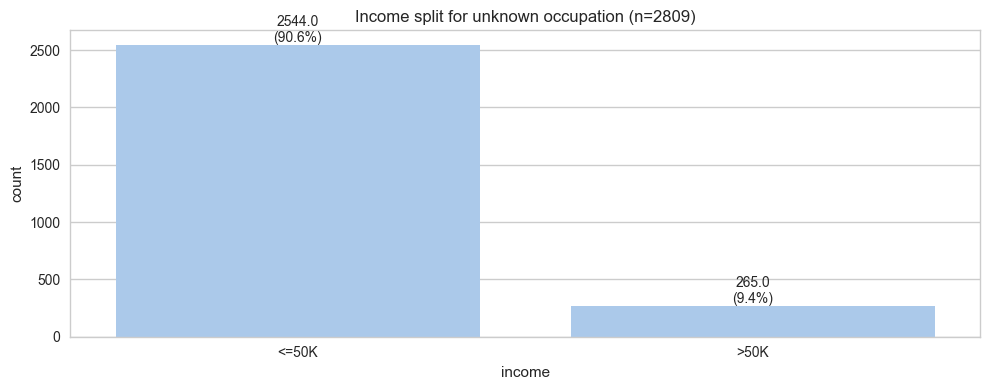

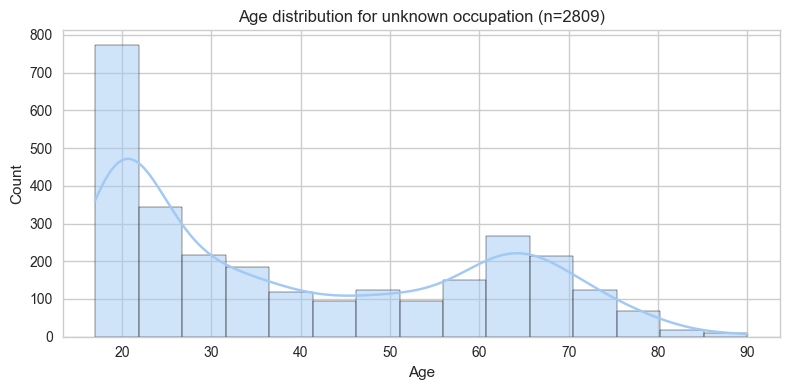

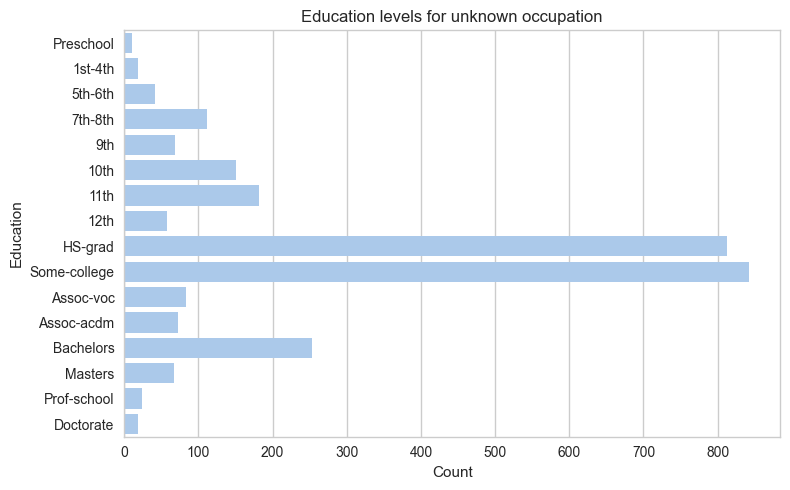

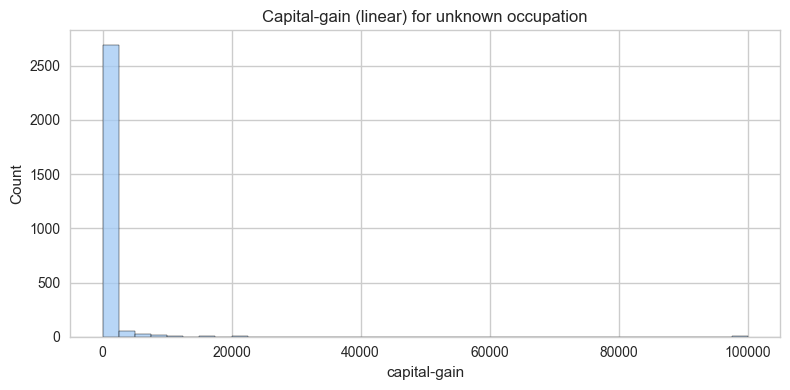

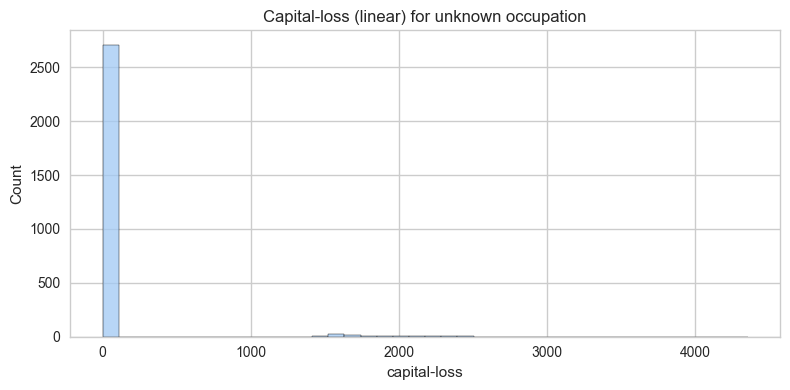

In [8]:
# Visuals for Unknown values in Occupation

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

education_order = [
    'Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th',
    'HS-grad','Some-college','Assoc-voc','Assoc-acdm','Bachelors','Masters',
    'Prof-school','Doctorate'
]

col = 'occupation'

# robust mask for unknowns: '?', 'Unknown', NaN (case-insensitive)
mask_unknown = (
    df[col].isna()
    | df[col].astype(str).str.strip().eq('?')
    | df[col].astype(str).str.strip().str.lower().eq('unknown')
)

subset = df[mask_unknown].copy()

if subset.empty:
    print(f"No unknown values found for column '{col}'.")
else:
    # Ensure types
    subset['age'] = pd.to_numeric(subset['age'], errors='coerce')
    subset['capital-gain'] = pd.to_numeric(subset['capital-gain'], errors='coerce')
    subset['capital-loss'] = pd.to_numeric(subset['capital-loss'], errors='coerce')
    subset['education'] = subset['education'].astype(str)
    subset['income'] = subset['income'].astype(str)

    # 1) Income split bar chart (show %)
    plt.figure(figsize=(10,4))
    order = ['<=50K', '>50K'] if set(['<=50K','>50K']).issubset(subset['income'].unique()) else subset['income'].unique()
    ax = sns.countplot(data=subset, x='income', order=order)
    total = len(subset)
    for p in ax.patches:
        height = p.get_height()
        pct = 100 * height / total if total>0 else 0
        ax.annotate(f'{height}\n({pct:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')
    plt.title(f"Income split for unknown {col} (n={total})")
    plt.tight_layout()
    plt.show()

    # 2) Age distribution (hist + KDE)
    plt.figure(figsize=(8,4))
    sns.histplot(subset['age'].dropna(), bins=15, kde=True)
    plt.title(f"Age distribution for unknown {col} (n={total})")
    plt.xlabel("Age")
    plt.tight_layout()
    plt.show()

    # 3) Education distribution (ordered)
    plt.figure(figsize=(8,5))
    # keep only known educations in the ordered list
    edu_present = [e for e in education_order if e in subset['education'].unique()]
    if edu_present:
        ax = sns.countplot(data=subset, y='education', order=edu_present)
        plt.title(f"Education levels for unknown {col}")
        plt.xlabel("Count")
        plt.ylabel("Education")
        plt.tight_layout()
        plt.show()
    else:
        print("No recognized education categories present in this subset.")

    # 4) Capital-gain (hist). Most values are zero: show log+linear view
    gains = subset['capital-gain'].fillna(0)
    if len(gains) > 0:
        plt.figure(figsize=(8,4))
        sns.histplot(gains, bins=40)
        plt.title(f"Capital-gain (linear) for unknown {col}")
        plt.tight_layout()
        plt.show()


    else:
        print("No capital-gain data available in this subset.")

    # 5) Capital-loss (hist + log)
    losses = subset['capital-loss'].fillna(0)
    if len(losses) > 0:
        plt.figure(figsize=(8,4))
        sns.histplot(losses, bins=40)
        plt.title(f"Capital-loss (linear) for unknown {col}")
        plt.tight_layout()
        plt.show()


    else:
        print("No capital-loss data available in this subset.")


<Axes: title={'center': 'Age Distribution by Race and Income'}, xlabel='race', ylabel='age'>

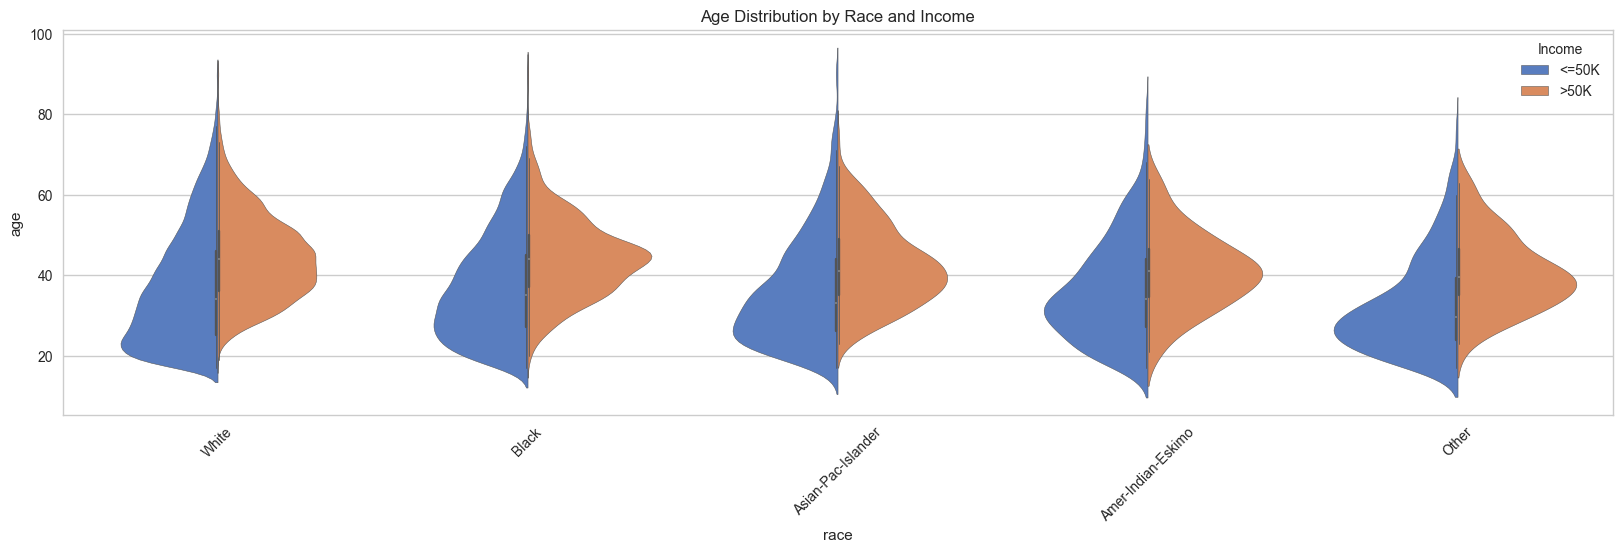

In [9]:
from matplotlib import pyplot
import seaborn as sns

a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)

ax = sns.violinplot(x="race", y="age", hue="income",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax.tick_params(axis='x', rotation=45)
ax.set_title("Age Distribution by Race and Income")
ax.legend(title="Income")

ax

In [10]:
# ---------------------------------
# Step 3: Native Country Distribution (Top 10)
# ---------------------------------
native_country_counts = df['native-country'].value_counts()
print("Top 10 Native Countries (Including 'Unknown'):")
print(native_country_counts.head(10).to_string())
print("\n")

# ---------------------------------
# Step 4: Income Distribution by Top Countries (Including 'Unknown')
# ---------------------------------
top_countries = native_country_counts.head(8).index
country_income = (
    df[df['native-country'].isin(top_countries)]
    .groupby(['native-country', 'income'])
    .size()
    .unstack(fill_value=0)
)
country_income_pct = (
    country_income.div(country_income.sum(axis=1), axis=0) * 100
).round(2)

print("Income Distribution by Top Countries (%):")
print(country_income_pct.to_string())
print("\n")

# Compare 'United-States' vs 'Unknown'
us_income = country_income_pct.loc['United-States']
unknown_income = country_income_pct.loc['Unknown']
print(f"United-States income split: <=50K {us_income['<=50K']}%, >50K {us_income['>50K']}%")
print(f"Unknown income split: <=50K {unknown_income['<=50K']}%, >50K {unknown_income['>50K']}%")
print("\n")


Top 10 Native Countries (Including 'Unknown'):
native-country
United-States    43810
Mexico             947
Unknown            856
Philippines        295
Germany            206
Puerto-Rico        184
Canada             182
El-Salvador        155
India              151
Cuba               138


Income Distribution by Top Countries (%):
income          <=50K   >50K
native-country              
Canada          65.38  34.62
El-Salvador     92.90   7.10
Germany         71.84  28.16
Mexico          95.04   4.96
Philippines     71.19  28.81
Puerto-Rico     89.13  10.87
United-States   75.59  24.41
Unknown         74.30  25.70


United-States income split: <=50K 75.59%, >50K 24.41%
Unknown income split: <=50K 74.3%, >50K 25.7%




### Interpretation:
The dataset is overwhelmingly dominated by 'United-States' (43,810 records ≈ 89.75%).
'Unknown' is the 3rd largest group (856 entries ≈ 1.75%).
Most missing country values are likely U.S. respondents who didn’t specify,
not foreign-born individuals.

- United States: 75.59% <=50K, 24.41% >50K
- Unknown: 74.3% <=50K, 25.7% >50K
The difference between the two is minimal (≈1.3%).
'Unknown' behaves statistically like U.S. respondents,
suggesting it can be merged safely into 'United-States'.

In [11]:
# Step 5: Compare 'Unknown' vs Known Income Distributions
def missing_income_analysis(col_name):
    """Compare income distribution between 'Unknown' and known categories."""
    print(f"Income Distribution for '{col_name}':")

    summary = (
        df.assign(Is_Unknown=df[col_name] == 'Unknown')
        .groupby(['Is_Unknown', 'income'])
        .size()
        .unstack(fill_value=0)
    )

    summary_pct = (summary.div(summary.sum(axis=1), axis=0) * 100).round(2)
    print(summary_pct.to_string())
    print("\nDifference (Unknown vs Known, % points):")

    known = summary_pct.loc[False]
    unknown = summary_pct.loc[True]
    diff = (unknown - known).round(2)
    print(diff.to_string())
    print("\n")
    return summary_pct

print("Income Pattern Comparison for Features with 'Unknown':\n")
native_country_stats = missing_income_analysis('native-country')
workclass_stats = missing_income_analysis('workclass')
occupation_stats = missing_income_analysis('occupation')

Income Pattern Comparison for Features with 'Unknown':

Income Distribution for 'native-country':
income      <=50K   >50K
Is_Unknown              
False       76.09  23.91
True        74.30  25.70

Difference (Unknown vs Known, % points):
income
<=50K   -1.79
>50K     1.79


Income Distribution for 'workclass':
income      <=50K   >50K
Is_Unknown              
False       75.18  24.82
True        90.53   9.47

Difference (Unknown vs Known, % points):
income
<=50K    15.35
>50K    -15.35


Income Distribution for 'occupation':
income      <=50K   >50K
Is_Unknown              
False       75.18  24.82
True        90.57   9.43

Difference (Unknown vs Known, % points):
income
<=50K    15.39
>50K    -15.39




In [12]:
# Step 6: Chi-Square Test – Testing if 'Unknown' Groups Differ Significantly

# To verify whether the income distribution for people with `'Unknown'` values
# (e.g., in `native-country`) is statistically different from that of known groups
# (e.g., `'United-States'`), we run a chi-square test of independence.

from scipy.stats import chi2_contingency

# Chi-square: Unknown vs United-States
ct = pd.crosstab(df['native-country'], df['income'])

# Ensure both rows exist before running
if all(x in ct.index for x in ['Unknown', 'United-States']):
    chi_table = ct.loc[['Unknown', 'United-States']]
    display(chi_table)

    chi2, p, dof, expected = chi2_contingency(chi_table)
    print(f"Chi-square statistic: {chi2:.3f}")
    print(f"p-value: {p:.5f}")
    if p < 0.05:
        print("✅ Significant difference in income distribution between 'Unknown' and 'United-States'.")
    else:
        print("❌ No significant difference detected.")
else:
    print("Required categories not found in the table.")


# Let's also analyze workclass and occupation
for col in ['workclass', 'occupation']:
    print(f"\nChi-square test for {col}:")
    ct = pd.crosstab(df[col], df['income'])
    if 'Unknown' in ct.index:
        known = [idx for idx in ct.index if idx != 'Unknown'][:1]  # compare with first known group
        chi_table = ct.loc[['Unknown', known[0]]]
        chi2, p, dof, expected = chi2_contingency(chi_table)
        print(f"p-value: {p:.5f}")


income,<=50K,>50K
native-country,,
Unknown,636,220
United-States,33118,10692


Chi-square statistic: 0.695
p-value: 0.40455
❌ No significant difference detected.

Chi-square test for workclass:
p-value: 0.00000

Chi-square test for occupation:
p-value: 0.00000


### Interpretation:
Native-country:
  - Known: 76.09% <=50K / 23.91% >50K
  - Unknown: 74.30% <=50K / 25.70% >50K
  - Difference: only ±1.79% → statistically identical to U.S. respondents.
  - Chi-square (p = 0.4046) → ❌ No significant difference → income distribution is statistically similar.

Workclass:
  - Known: 75.18% <=50K / 24.82% >50K
  - Unknown: 90.53% <=50K / 9.47% >50K
  - Difference: −15.35% fewer high-income earners among Unknowns → strong bias.
  - Chi-square (p < 0.001) → ✅ Significant difference → missing ‘workclass’ values are not random and strongly linked to lower income.

Occupation:
  - Known: 75.18% <=50K / 24.82% >50K
  - Unknown: 90.57% <=50K / 9.43% >50K
  - Difference: −15.39% fewer high-income earners among Unknowns.
  - Chi-square (p < 0.001) → ✅ Significant difference → missing ‘occupation’ values show a similar low-income bias.

Conclusion:
The chi-square tests confirm that missingness in workclass and occupation is not random — these categories are statistically associated with lower income levels, suggesting they represent underreported or informal employment.

However, the native-country Unknown group behaves similarly to U.S. respondents, both descriptively and statistically, meaning it can be safely treated as non-problematic or merged with the dominant category.

In [13]:
# Step 7: Merge 'Unknown' in Native Country → 'United-States'

unknown_count = (df['native-country'] == 'Unknown').sum()
df['native-country'] = df['native-country'].replace('Unknown', 'United-States')
print(f"Merged {unknown_count} 'Unknown' native-country entries into 'United-States'.")
print("\n")

updated_counts = df['native-country'].value_counts().head(10)
print("Updated Top 10 Native Countries After Merge:")
print(updated_counts.to_string())
print("\n")

Merged 856 'Unknown' native-country entries into 'United-States'.


Updated Top 10 Native Countries After Merge:
native-country
United-States    44666
Mexico             947
Philippines        295
Germany            206
Puerto-Rico        184
Canada             182
El-Salvador        155
India              151
Cuba               138
England            127




### Interpretation:
 856 'Unknown' entries merged into 'United-States', bringing total U.S. records to 44,666.

 The top countries remain the same; U.S. share rises slightly to ~91%.

 This merge is justified because 'Unknown' matches U.S. income patterns.

 For 'workclass' and 'occupation', 'Unknown' is retained as it holds
 informative socioeconomic value (lower-income indicator).

📊 Target Variable Distribution:


,Count,Percentage (%)
income,,
<=50K,37128,76.06
>50K,11685,23.94


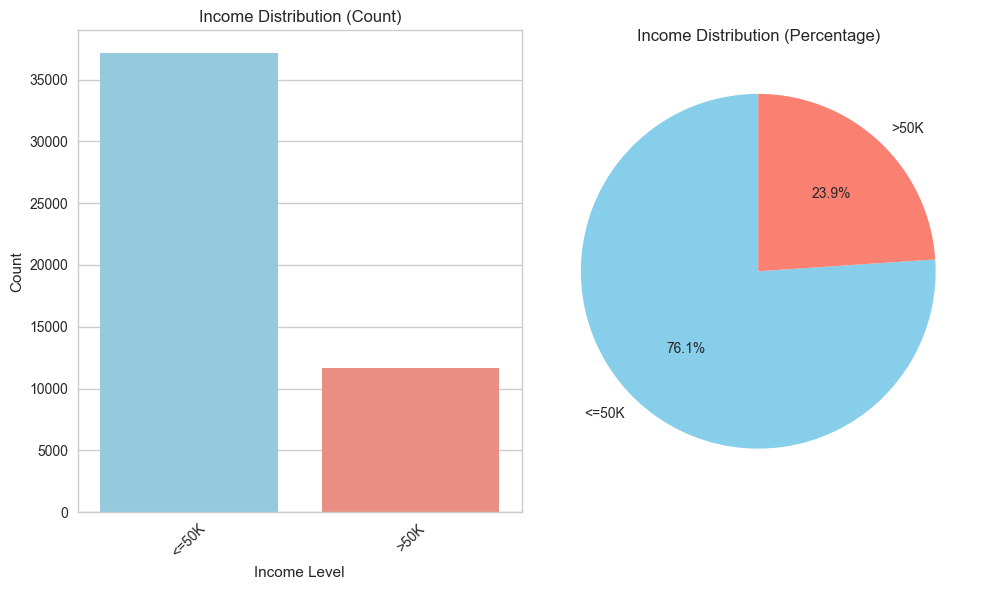

In [14]:
# Target Variable Distribution

# Compute class counts and proportions
target_counts = df['income'].value_counts()
target_percent = df['income'].value_counts(normalize=True) * 100

print("📊 Target Variable Distribution:")
display(pd.DataFrame({
    'Count': target_counts,
    'Percentage (%)': target_percent.round(2)
}))

# Visualization: Bar + Pie
plt.figure(figsize=(10, 6))

# Bar plot (counts)
plt.subplot(1, 2, 1)
sns.barplot(x=target_counts.index, y=target_counts.values, palette=['skyblue', 'salmon'])
plt.title('Income Distribution (Count)')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Pie chart (percentage)
plt.subplot(1, 2, 2)
plt.pie(target_percent, labels=target_percent.index, autopct='%1.1f%%',
        colors=['skyblue', 'salmon'], startangle=90)
plt.title('Income Distribution (Percentage)')

plt.tight_layout()
plt.show()



# Interpretation:
The dataset is imbalanced — about 76% of individuals earn <=50K, while only ~24% earn >50K. This imbalance may bias models toward predicting the majority class, so techniques like stratified sampling, class weighting, or balanced accuracy metrics will be needed during training.

In [15]:
# Numerical Features Summary

# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("📈 Numerical Feature Summary:")
display(df[num_cols].describe().T)
# equivalent to df.describe, the transpose part just makes it easier to read

📈 Numerical Feature Summary:


,count,mean,std,min,25%,50%,75%,max
age,48813.0,38.647348,13.709005,17.0,28.0,37.0,48.0,90.0
fnlwgt,48813.0,189667.904964,105606.243360,12285.0,117555.0,178140.0,237620.0,1490400.0
education-num,48813.0,10.078688,2.570257,1.0,9.0,10.0,12.0,16.0
capital-gain,48813.0,1079.708705,7454.185982,0.0,0.0,0.0,0.0,99999.0
capital-loss,48813.0,87.554299,403.118605,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48813.0,40.425051,12.390954,1.0,40.0,40.0,45.0,99.0


# Interpretation:
- age: Mean ~39 years; workforce is largely between 28–48 years (IQR).
- fnlwgt: Census "final weight" variable — represents how many people each record stands for.
  Not a predictive feature; often dropped from modeling.
- education-num: Numerical encoding of education (1–16). Mean ~10 ("Some college" level).
- capital-gain/loss: Highly right-skewed with few extreme outliers (e.g., 99,999 gain).
- hours-per-week: Centered around 40; most individuals work standard full-time hours.

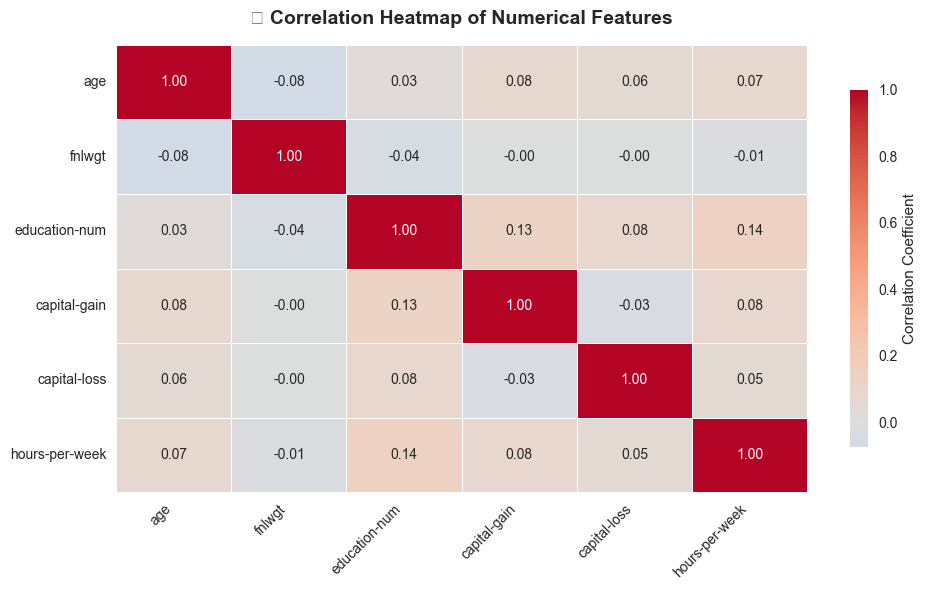

In [16]:
# Basic Correlation

plt.figure(figsize=(10, 6))
sns.heatmap(
    df[num_cols].corr(),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',          # better contrast range
    center=0,                 # ensures 0 correlation is neutral color
    linewidths=0.5,           # subtle grid lines
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}
)

plt.title("🔍 Correlation Heatmap of Numerical Features", fontsize=14, weight='bold', pad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# Correlation Insights:
- education-num has mild positive correlation with capital-gain and income potential.
- hours-per-week shows weak positive relation with income.
- capital-gain and capital-loss are nearly independent of other features but have internal outliers.


📊 Categorical Features Overview:

Feature: workclass
workclass
Private             33879
Self-emp-not-inc     3861
Local-gov            3136
Unknown              2799
State-gov            1981
Name: count, dtype: int64

Feature: education
education
HS-grad         15777
Some-college    10869
Bachelors        8020
Masters          2656
Assoc-voc        2060
Name: count, dtype: int64

Feature: marital-status
marital-status
Married-civ-spouse    22372
Never-married         16098
Divorced               6630
Separated              1530
Widowed                1518
Name: count, dtype: int64

Feature: occupation
occupation
Prof-specialty     6167
Craft-repair       6107
Exec-managerial    6084
Adm-clerical       5608
Sales              5504
Name: count, dtype: int64

Feature: relationship
relationship
Husband          19709
Not-in-family    12567
Own-child         7576
Unmarried         5124
Wife              2331
Name: count, dtype: int64

Feature: race
race
White                 41736
Black

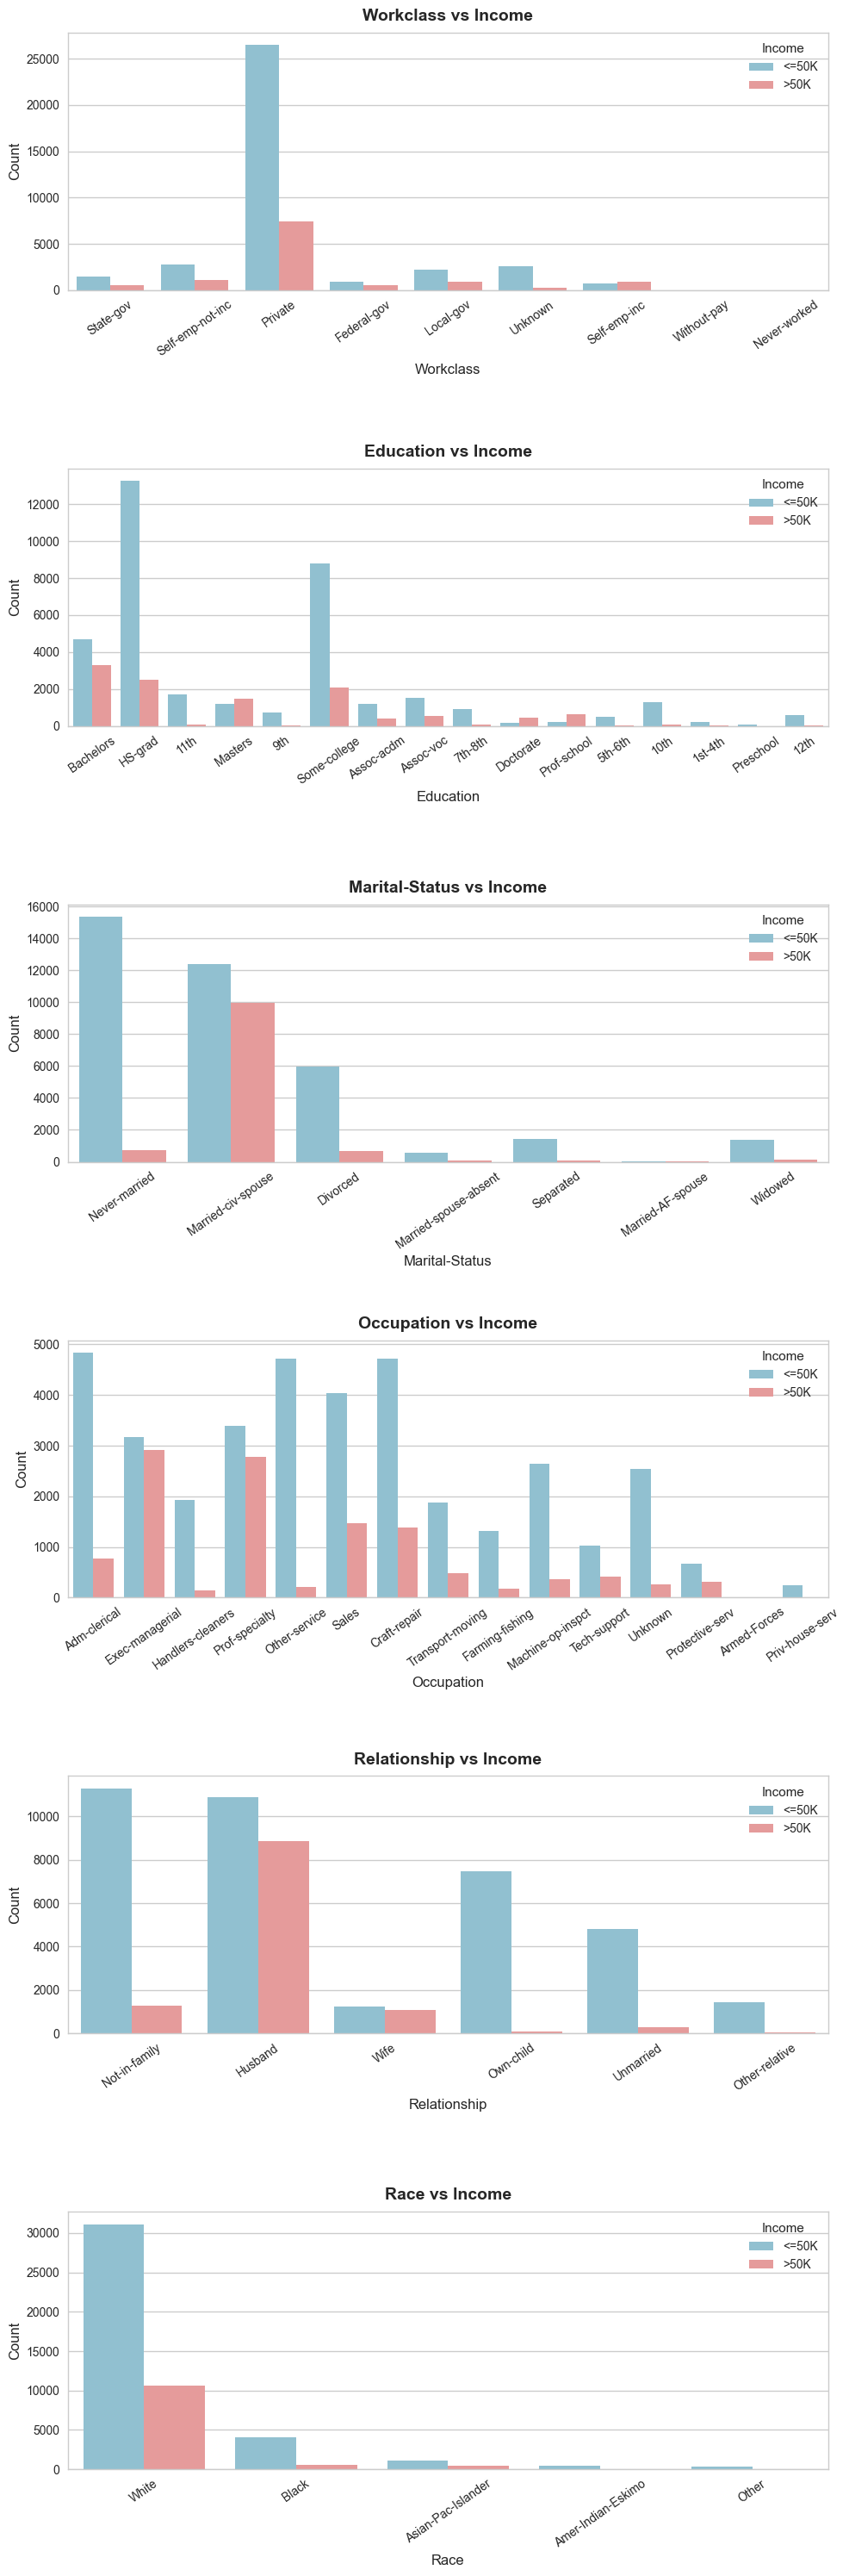

In [17]:
# Categorical Feature Overview
cat_cols = df.select_dtypes(include='object').columns.drop('income')

print("\n📊 Categorical Features Overview:")
for col in cat_cols:
    print(f"\nFeature: {col}")
    print(df[col].value_counts().head())

# Larger figure and vertical layout (3x2 grid but taller)
fig, axes = plt.subplots(6, 1, figsize=(10, 30))
axes = axes.flatten()

for i, col in enumerate(cat_cols[:6]):  # show top 6 categorical features
    sns.countplot(
        data=df,
        x=col,
        hue='income',
        ax=axes[i],
        palette=['#86c5da', '#f28e8e']
    )
    axes[i].set_title(f"{col.title()} vs Income", fontsize=14, weight='bold', pad=10)
    axes[i].set_xlabel(col.title(), fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].tick_params(axis='x', rotation=35)
    axes[i].legend(title='Income', loc='upper right', fontsize=10, title_fontsize=11)

# Adjust layout
plt.tight_layout(h_pad=4, w_pad=3)
plt.show()

# Interpretation
- Private sector dominates workclass, mostly <=50K earners.
- Higher education levels (Bachelors, Masters, Doctorate) correlate with >50K.
- Married-civ-spouse individuals have higher income frequency.
- Managerial and professional occupations lean toward >50K.
- Husbands are most represented in >50K category, indicating gender income skew.
- Majority racial group (White) dominates dataset — demographic imbalance may exist.

In [18]:
# Feature Importance - ANOVA
from sklearn.feature_selection import f_classif
import pandas as pd

print("🔍 FEATURE IMPORTANCE ANALYSIS")
print("=" * 50)

# Ensure only numeric columns are used
X_num = X.select_dtypes(include=['number'])

# Perform ANOVA F-test
f_scores, p_values = f_classif(X_num, y)

# Create feature importance DataFrame
feature_importance = pd.DataFrame({
    'feature': X_num.columns,
    'f_score': f_scores,
    'p_value': p_values
}).sort_values('f_score', ascending=False)

# Display top results
print("\nTop Features by ANOVA F-score (higher = more important):")
print(feature_importance.head(15).to_string(index=False))

# Statistical significance summary
significant_features = feature_importance[feature_importance['p_value'] < 0.05]
print(f"\nStatistical significance (p < 0.05): {len(significant_features)}/{len(feature_importance)} features are significant")


🔍 FEATURE IMPORTANCE ANALYSIS

Top Features by ANOVA F-score (higher = more important):
       feature     f_score       p_value
 education-num 2025.214518  0.000000e+00
           age  913.537918  0.000000e+00
hours-per-week  890.107575  0.000000e+00
  capital-gain  852.232650  0.000000e+00
  capital-loss  362.599770 6.243829e-233
        fnlwgt    1.008950  3.875137e-01

Statistical significance (p < 0.05): 5/6 features are significant


In [19]:
# Mutual Information Analysis
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

print("\n🎯 MUTUAL INFORMATION ANALYSIS")
print("=" * 50)

# Ensure only numeric columns are used
X_num = X.select_dtypes(include=['number'])

# Compute mutual information
mi_scores = mutual_info_classif(X_num, y, random_state=42)

# Build DataFrame
mi_df = pd.DataFrame({
    'feature': X_num.columns,
    'mi_score': mi_scores
}).sort_values('mi_score', ascending=False)

# Display results
print("\nTop Features by Mutual Information Score:")
print(mi_df.head(15).to_string(index=False))



🎯 MUTUAL INFORMATION ANALYSIS

Top Features by Mutual Information Score:
       feature  mi_score
  capital-gain  0.084781
           age  0.063531
 education-num  0.062009
hours-per-week  0.043847
  capital-loss  0.035920
        fnlwgt  0.032617


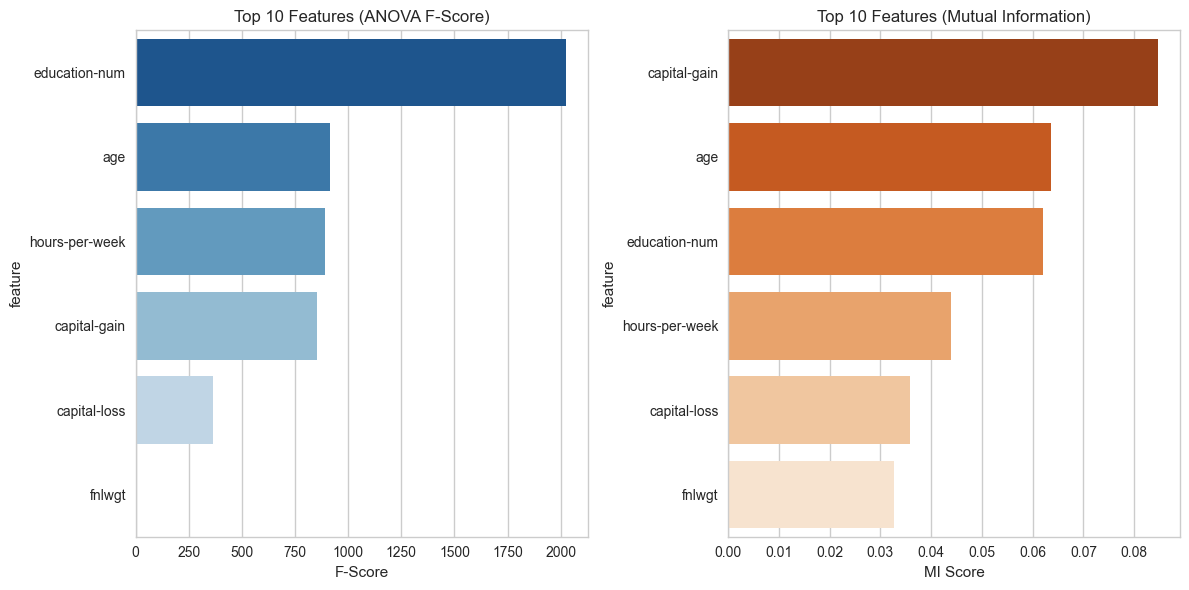

In [20]:
# Visualization of feauture importance

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='f_score', y='feature', data=feature_importance.head(10), palette='Blues_r')
plt.title('Top 10 Features (ANOVA F-Score)')
plt.xlabel('F-Score')

plt.subplot(1, 2, 2)
sns.barplot(x='mi_score', y='feature', data=mi_df.head(10), palette='Oranges_r')
plt.title('Top 10 Features (Mutual Information)')
plt.xlabel('MI Score')

plt.tight_layout()
plt.show()


### Interpretation

From the two analyse: ANOVA F-test and mutual information, **education level, age, working hours per week, and capital-related variables (gain/loss)** consistently emerge as the most important predictors of income.

ANOVA results show these variables have the strongest group mean differences between income classes, with all except `fnlwgt` being statistically significant.


The mutual information analysis complements this by capturing additional non-linear dependencies, reinforcing that these same features carry the most information about income beyond linear effects.


Outlier Analysis (IQR method):
age: 215 outliers (0.44%)
hours-per-week: 13489 outliers (27.63%)
capital-gain: 4035 outliers (8.27%)
capital-loss: 2282 outliers (4.67%)


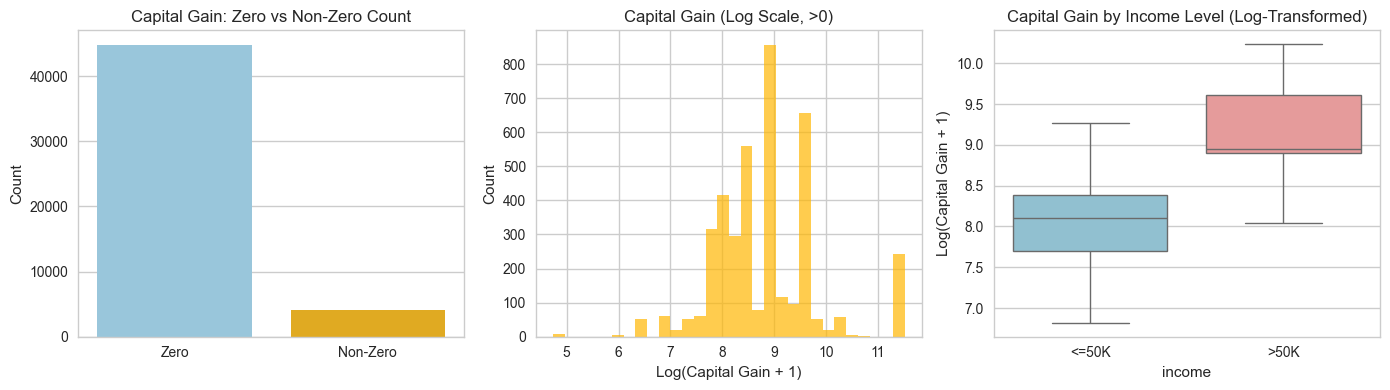

In [21]:
# Quick outlier detection using IQR method

def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return len(outliers), len(outliers) / len(data) * 100

print("Outlier Analysis (IQR method):")
outlier_features = ['age', 'hours-per-week', 'capital-gain', 'capital-loss']
for feature in outlier_features:
    count, percentage = detect_outliers_iqr(df, feature)
    print(f"{feature}: {count} outliers ({percentage:.2f}%)")

plt.figure(figsize=(14, 4))

# Separate zero and nonzero groups
gain_zero = df[df['capital-gain'] == 0]
gain_nonzero = df[df['capital-gain'] > 0]

# (1) Show share of zeros
plt.subplot(1, 3, 1)
sns.barplot(x=['Zero', 'Non-Zero'],
            y=[len(gain_zero), len(gain_nonzero)],
            palette=['#8ecae6', '#ffb703'])
plt.title('Capital Gain: Zero vs Non-Zero Count')
plt.ylabel('Count')

# (2) Distribution (log scale, >0)
plt.subplot(1, 3, 2)
plt.hist(np.log1p(gain_nonzero['capital-gain']), bins=30, alpha=0.7, color='#ffb703')
plt.title('Capital Gain (Log Scale, >0)')
plt.xlabel('Log(Capital Gain + 1)')
plt.ylabel('Count')

# (3) By income (only nonzero, log-transformed for clarity)
plt.subplot(1, 3, 3)
sns.boxplot(
    data=gain_nonzero.assign(cap_gain_log=np.log1p(gain_nonzero['capital-gain'])),
    x='income', y='cap_gain_log',
    showfliers=False, palette=['#86c5da', '#f28e8e']
)
plt.title('Capital Gain by Income Level (Log-Transformed)')
plt.ylabel('Log(Capital Gain + 1)')

plt.tight_layout()
plt.show()



### Interpretation

These plots show that most people have no capital gains, while a small minority earn substantial investment income, often much higher and highly variable. After log transformation, it’s clear that those with >50K income have significantly higher capital gains, indicating a strong positive relationship between investment earnings and overall income. In short, capital gain is a sparse but powerful predictor of high income.

## Data Preprocessing

In [22]:
# Feature Engineering
# Create derived features for better predictive power

# Hybrid approach for capital gain/loss features

# 1. Create Binary Indicators
df['has_capital_gain'] = (df['capital-gain'] > 0).astype(int)
df['has_capital_loss'] = (df['capital-loss'] > 0).astype(int)

# 2. Apply Logarithmic Transformation (Scaling/Normalizing for Skew)
# np.log1p(x) is equivalent to log(1 + x). This handles the many zero values gracefully.
df['capital_gain_log'] = np.log1p(df['capital-gain'])
df['capital_loss_log'] = np.log1p(df['capital-loss'])


print(f"New features added: {['has_capital_gain', 'has_capital_loss', 'capital_gain_log', 'capital_loss_log']}")
print(f"Original columns retained (in their transformed state): {['capital-gain', 'capital-loss']}")

New features added: ['has_capital_gain', 'has_capital_loss', 'capital_gain_log', 'capital_loss_log']
Original columns retained (in their transformed state): ['capital-gain', 'capital-loss']


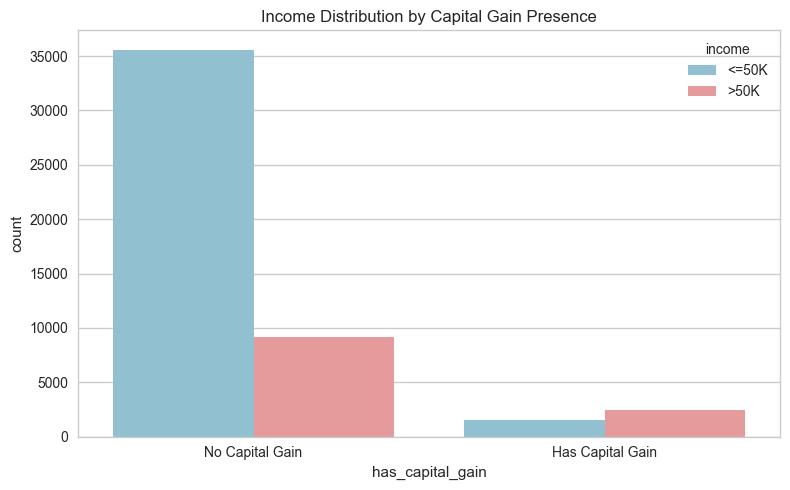

In [23]:
fig, axes = plt.subplots(1, 1, figsize=(8, 5))

sns.countplot(data=df, x='has_capital_gain', hue='income', ax=axes, palette=['#86c5da', '#f28e8e'])
axes.set_title('Income Distribution by Capital Gain Presence')
axes.set_xticklabels(['No Capital Gain', 'Has Capital Gain'])

plt.tight_layout()
plt.show()


No need for both education-num and education, they both inform you about the same things we can check this with a code snippet probably


We will make separate DF's
One for DTrees and one for KNN's

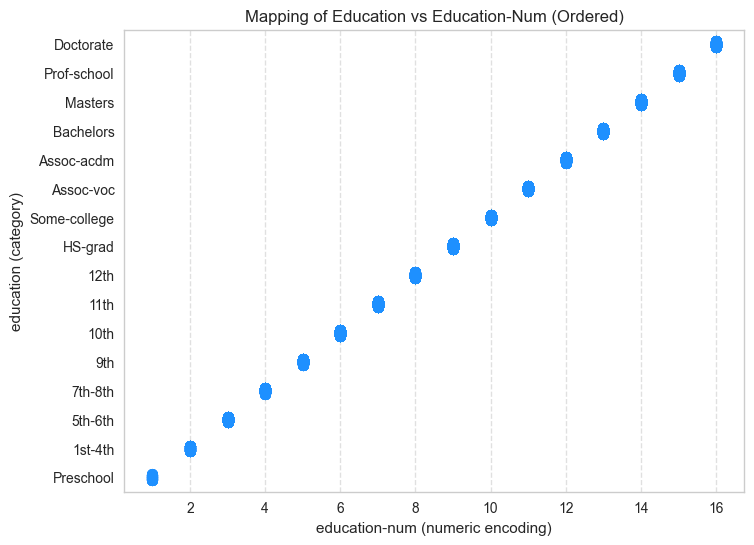

In [24]:
education_order = [
    'Preschool',
    '1st-4th',
    '5th-6th',
    '7th-8th',
    '9th',
    '10th',
    '11th',
    '12th',
    'HS-grad',
    'Some-college',
    'Assoc-voc',
    'Assoc-acdm',
    'Bachelors',
    'Masters',
    'Prof-school',
    'Doctorate'
]

education_order.reverse()

plt.figure(figsize=(8,6))
sns.stripplot(
    data=df,
    x='education-num',
    y='education',
    order=education_order,
        jitter=True,
    size=8,
    color='dodgerblue'
)
plt.title("Mapping of Education vs Education-Num (Ordered)")
plt.xlabel("education-num (numeric encoding)")
plt.ylabel("education (category)")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()


In [25]:
df[['education', 'education-num']].drop_duplicates().sort_values('education-num')

# nums on the left is the index it appears for the first time

,education,education-num
224,Preschool,1
160,1st-4th,2
56,5th-6th,3
15,7th-8th,4
6,9th,5
77,10th,6
3,11th,7
415,12th,8
2,HS-grad,9
10,Some-college,10


Initially I thought education-num meant "Years in School", however it's actually an ordinal ranking. Each increasing value simply indicates a higher education level (e.g., Bachelors = 13, Masters = 14, Doctorate = 16).

In that case I prefer to keep it and drop the categorical attribute for education, as the numerical data will be better for KNN's, with no detriment for decision tree models.

Dropping education helps avoid multicollinearity and redundant encoding.

**We will normalize Age, hours worked, capital gains and losses before training KNN's**

In [26]:
# Marital Status Simplification
# Combine related categories into broader groups

df['marital_status_simple'] = df['marital-status'].replace({
    'Married-civ-spouse': 'Married',
    'Married-AF-spouse': 'Married',
    'Married-spouse-absent': 'Married',  # FIX: Move here!
    'Never-married': 'Single',
    'Divorced': 'Separated',
    'Separated': 'Separated',
    'Widowed': 'Separated'
})

# Drop original column after simplification
df.drop(['marital-status'], axis=1, inplace=True)

print(f"New feature added: ['marital_status_simple']")
print(f"Removed column: ['marital-status']")

New feature added: ['marital_status_simple']
Removed column: ['marital-status']


In [27]:
# =============================================================================
# TASK 2: DECISION TREES IMPLEMENTATION
# =============================================================================

df.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income',
 'has_capital_gain',
 'has_capital_loss',
 'capital_gain_log',
 'capital_loss_log',
 'marital_status_simple']

In [28]:
df.drop(['fnlwgt', 'education', 'capital-gain', 'capital-loss'], axis=1, inplace=True)
df.columns.tolist()
# drop fnlwgt because it is a sampling weight (often not predictive)
# dropped education due to reasons above

['age',
 'workclass',
 'education-num',
 'occupation',
 'relationship',
 'race',
 'sex',
 'hours-per-week',
 'native-country',
 'income',
 'has_capital_gain',
 'has_capital_loss',
 'capital_gain_log',
 'capital_loss_log',
 'marital_status_simple']

In [29]:
# Identify non-numeric columns and list their unique values
non_numeric_cols = df.select_dtypes(exclude=['int64', 'float64']).columns
for col in non_numeric_cols:
    unique_values = df[col].unique()
    print(f"{col}: {unique_values} \n ")


workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Unknown' 'Self-emp-inc' 'Without-pay' 'Never-worked'] 
 
occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Unknown'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 
 
relationship: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 
 
race: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 
 
sex: ['Male' 'Female'] 
 
native-country: ['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'South' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Italy'
 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan'
 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador' 'France'
 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Gre

In [30]:
import pandas as pd

# Function to print income percentages in the requested grouped format
def print_grouped_income_percentages(feature, bin_mapping):
    # Group by feature and income, get counts
    dist = df.groupby([feature, 'income']).size().unstack(fill_value=0)

    print(f"\n=== {feature.upper()} ===")

    # Print original categories grouped by bins
    for bin_name, categories in bin_mapping.items():
        print(f"\n{bin_name}")
        for cat in categories:
            if cat in dist.index:
                total_cat = dist.loc[cat].sum()
                pct_under_50k = (dist.loc[cat, '<=50K'] / total_cat) * 100
                pct_over_50k = (dist.loc[cat, '>50K'] / total_cat) * 100
                print(f"{cat}: <=50K: {pct_under_50k:.1f}%, >50K: {pct_over_50k:.1f}%")

    # Calculate and print binned group averages
    print("\nBinned Groups:")
    for bin_name, categories in bin_mapping.items():
        bin_data = df[df[feature].isin(categories)].groupby('income').size()
        total_bin = bin_data.sum()
        pct_under_50k_bin = (bin_data['<=50K'] / total_bin) * 100 if '<=50K' in bin_data else 0
        pct_over_50k_bin = (bin_data['>50K'] / total_bin) * 100 if '>50K' in bin_data else 0
        print(f"{bin_name}: <=50K: {pct_under_50k_bin:.1f}%, >50K: {pct_over_50k_bin:.1f}%")

# Define bin mappings for workclass
workclass_bins = {
    'Employed': ['State-gov', 'Federal-gov', 'Local-gov', 'Private'],
    'Self-Employed': ['Self-emp-not-inc', 'Self-emp-inc'],
    'Unemployed/Unknown': ['Unknown', 'Without-pay', 'Never-worked']
}

occupation_bins = {
    'High-Income': ['Exec-managerial', 'Prof-specialty', 'Tech-support'],
    'Mid-Income': ['Adm-clerical', 'Sales', 'Craft-repair', 'Transport-moving', 'Protective-serv'],
    'Low-Income': ['Handlers-cleaners', 'Other-service', 'Machine-op-inspct', 'Farming-fishing', 'Priv-house-serv'],
    'Military/Unknown': ['Armed-Forces', 'Unknown']
}

relationship_bins = {
    'Married': ['Husband', 'Wife'],
    'Independent': ['Not-in-family', 'Unmarried'],
    'Dependent': ['Own-child', 'Other-relative']
}

# Calculate and print
print_grouped_income_percentages('workclass', workclass_bins)
print_grouped_income_percentages('occupation', occupation_bins)
print_grouped_income_percentages('relationship', relationship_bins)


=== WORKCLASS ===

Employed
State-gov: <=50K: 73.2%, >50K: 26.8%
Federal-gov: <=50K: 60.8%, >50K: 39.2%
Local-gov: <=50K: 70.4%, >50K: 29.6%
Private: <=50K: 78.2%, >50K: 21.8%

Self-Employed
Self-emp-not-inc: <=50K: 72.1%, >50K: 27.9%
Self-emp-inc: <=50K: 44.6%, >50K: 55.4%

Unemployed/Unknown
Unknown: <=50K: 90.5%, >50K: 9.5%
Without-pay: <=50K: 90.5%, >50K: 9.5%
Never-worked: <=50K: 100.0%, >50K: 0.0%

Binned Groups:
Employed: <=50K: 76.7%, >50K: 23.3%
Self-Employed: <=50K: 63.7%, >50K: 36.3%
Unemployed/Unknown: <=50K: 90.6%, >50K: 9.4%

=== OCCUPATION ===

High-Income
Exec-managerial: <=50K: 52.2%, >50K: 47.8%
Prof-specialty: <=50K: 54.9%, >50K: 45.1%
Tech-support: <=50K: 70.9%, >50K: 29.1%

Mid-Income
Adm-clerical: <=50K: 86.3%, >50K: 13.7%
Sales: <=50K: 73.2%, >50K: 26.8%
Craft-repair: <=50K: 77.4%, >50K: 22.6%
Transport-moving: <=50K: 79.6%, >50K: 20.4%
Protective-serv: <=50K: 68.7%, >50K: 31.3%

Low-Income
Handlers-cleaners: <=50K: 93.3%, >50K: 6.7%
Other-service: <=50K: 95.9%,

# Task 2 - Decision Trees

In [31]:
from sklearn.model_selection import train_test_split

# Data prep

# Copy to avoid altering original dataframe
df_model = df.copy()

# Convert target to binary numeric
df_model['income'] = df_model['income'].map({'<=50K': 0, '>50K': 1})

# Separate features and target
features = [col for col in df_model.columns if col != 'income']
X = pd.get_dummies(df_model[features], drop_first=True)
y = df_model['income']


# Display dataset information
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"Feature matrix shape: {X.shape[0]} samples × {X.shape[1]} features")
print(f"\nClass distribution:")
print(y.value_counts().to_frame('Count').assign(
    Percentage=y.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
))
print(f"\nClass imbalance ratio: {y.value_counts()[0] / y.value_counts()[1]:.2f}:1")

# Stratified train-test split (80-20) preserving class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\n{'='*60}")
print("TRAIN-TEST SPLIT")
print("="*60)
print(f"Training set:   {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"Test set:       {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.0f}%)")
print(f"\nClass balance preserved in both sets:")
print(f"  Train: {y_train.value_counts(normalize=True).round(3).to_dict()}")
print(f"  Test:  {y_test.value_counts(normalize=True).round(3).to_dict()}")
print("="*60)

DATASET OVERVIEW
Feature matrix shape: 48813 samples × 81 features

Class distribution:
        Count Percentage
income                  
0       37128      76.1%
1       11685      23.9%

Class imbalance ratio: 3.18:1

TRAIN-TEST SPLIT
Training set:   39050 samples (80%)
Test set:       9763 samples (20%)

Class balance preserved in both sets:
  Train: {0: 0.761, 1: 0.239}
  Test:  {0: 0.761, 1: 0.239}


In [32]:
# Evaluation utils

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def evaluate_model(model, X_test, y_test, verbose=True):
    """
    Predict and print commonly reported metrics.
    Returns a dict with metrics for programmatic use.
    """
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    if verbose:
        print(f"Accuracy:  {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall:    {rec:.4f}")
        print(f"F1-score:  {f1:.4f}\n")
        print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    return {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1, 'y_pred': y_pred}


In [33]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score
)
import numpy as np

def evaluate_model(model, X_test, y_test, model_name="Model", verbose=True):
    """
    Comprehensive model evaluation with focus on imbalanced data metrics.

    Parameters:
    -----------
    model : trained sklearn model
    X_test : test features
    y_test : true test labels
    model_name : str, identifier for the model (e.g., "CART_Gini_depth5")
    verbose : bool, whether to print detailed output

    Returns:
    --------
    dict : metrics including overall and per-class performance
    """
    y_pred = model.predict(X_test)

    # Overall metrics
    acc = accuracy_score(y_test, y_pred)

    # Per-class metrics (important for imbalanced data)
    prec_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)

    # Minority class (>50K) specific metrics
    prec_minority = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
    rec_minority = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
    f1_minority = f1_score(y_test, y_pred, pos_label=1, zero_division=0)

    # ROC-AUC if model supports probability predictions
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    except:
        roc_auc = None

    if verbose:
        print("="*70)
        print(f"MODEL: {model_name}")
        print("="*70)
        print(f"Accuracy:           {acc:.4f}")
        print(f"Macro F1-score:     {f1_macro:.4f}  (primary metric for imbalanced data)")
        print(f"Macro Precision:    {prec_macro:.4f}")
        print(f"Macro Recall:       {rec_macro:.4f}")
        if roc_auc:
            print(f"ROC-AUC:            {roc_auc:.4f}")

        print(f"\n{'Minority Class (>50K) Performance:':-^70}")
        print(f"Precision:          {prec_minority:.4f}  (of predicted >50K, how many correct?)")
        print(f"Recall:             {rec_minority:.4f}  (of actual >50K, how many found?)")
        print(f"F1-score:           {f1_minority:.4f}")

        print(f"\n{'Detailed Classification Report:':-^70}")
        print(classification_report(y_test, y_pred,
                                   target_names=['≤50K', '>50K'],
                                   zero_division=0))

        print(f"{'Confusion Matrix:':-^70}")
        cm = confusion_matrix(y_test, y_pred)
        print(f"                 Predicted")
        print(f"                 ≤50K    >50K")
        print(f"Actual  ≤50K     {cm[0,0]:<6}  {cm[0,1]:<6}")
        print(f"        >50K     {cm[1,0]:<6}  {cm[1,1]:<6}")
        print(f"\nFalse Positives (predicted >50K wrongly): {cm[0,1]}")
        print(f"False Negatives (missed actual >50K):     {cm[1,0]}")
        print("="*70 + "\n")

    return {
        'model_name': model_name,
        'accuracy': acc,
        'precision_macro': prec_macro,
        'recall_macro': rec_macro,
        'f1_macro': f1_macro,
        'precision_minority': prec_minority,
        'recall_minority': rec_minority,
        'f1_minority': f1_minority,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }


# Storage for comparing all models later
model_results = []

def store_results(results_dict):
    """Helper function to accumulate results for comparison"""
    model_results.append(results_dict)


def compare_models():
    """
    Display comparison table of all evaluated models.
    Call this after training all models.
    """
    if not model_results:
        print("No models evaluated yet!")
        return

    import pandas as pd

    comparison_df = pd.DataFrame(model_results)
    comparison_df = comparison_df.drop(['y_pred', 'confusion_matrix'], axis=1)

    # Sort by F1 macro (best metric for imbalanced data)
    comparison_df = comparison_df.sort_values('f1_macro', ascending=False)

    print("\n" + "="*90)
    print("MODEL COMPARISON SUMMARY (sorted by Macro F1-score)")
    print("="*90)
    print(comparison_df.to_string(index=False))
    print("="*90)
    print("\nBest Model:", comparison_df.iloc[0]['model_name'])
    print(f"Best Macro F1: {comparison_df.iloc[0]['f1_macro']:.4f}")
    print("="*90 + "\n")

    return comparison_df

print("success")

success


In [34]:
# Baseline decision trees

from sklearn.tree import DecisionTreeClassifier
import time

print("="*70)
print("TRAINING BASELINE DECISION TREES (UNPRUNED)")
print("="*70)

# -----------------------------------------------------------------------------
# Model 1: Entropy-based (ID3-style Information Gain)
# -----------------------------------------------------------------------------
print("\n[1/2] Training Entropy-based Tree...")
dt_entropy = DecisionTreeClassifier(
    criterion='entropy',
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)

t0 = time.perf_counter()
dt_entropy.fit(X_train, y_train)
train_time_entropy = time.perf_counter() - t0

# Check for overfitting
train_acc_entropy = dt_entropy.score(X_train, y_train)
test_acc_entropy = dt_entropy.score(X_test, y_test)

print(f"Training time: {train_time_entropy:.3f}s")
print(f"Tree depth: {dt_entropy.get_depth()}")
print(f"Number of leaves: {dt_entropy.get_n_leaves()}")
print(f"Train accuracy: {train_acc_entropy:.4f}")
print(f"Test accuracy:  {test_acc_entropy:.4f}")
print(f"Overfit gap:    {train_acc_entropy - test_acc_entropy:.4f}")

entropy_metrics = evaluate_model(dt_entropy, X_test, y_test,
                                 model_name="Entropy_Baseline")
store_results(entropy_metrics)

# -----------------------------------------------------------------------------
# Model 2: Gini-based (CART)
# -----------------------------------------------------------------------------
print("\n[2/2] Training Gini-based Tree (CART)...")
dt_gini = DecisionTreeClassifier(
    criterion='gini',
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)

t0 = time.perf_counter()
dt_gini.fit(X_train, y_train)
train_time_gini = time.perf_counter() - t0

# Check for overfitting
train_acc_gini = dt_gini.score(X_train, y_train)
test_acc_gini = dt_gini.score(X_test, y_test)

print(f"Training time: {train_time_gini:.3f}s")
print(f"Tree depth: {dt_gini.get_depth()}")
print(f"Number of leaves: {dt_gini.get_n_leaves()}")
print(f"Train accuracy: {train_acc_gini:.4f}")
print(f"Test accuracy:  {test_acc_gini:.4f}")
print(f"Overfit gap:    {train_acc_gini - test_acc_gini:.4f}")

gini_metrics = evaluate_model(dt_gini, X_test, y_test,
                              model_name="Gini_Baseline")
store_results(gini_metrics)

# -----------------------------------------------------------------------------
# Quick Comparison
# -----------------------------------------------------------------------------
print("\n" + "="*70)
print("BASELINE COMPARISON: ENTROPY vs GINI")
print("="*70)
print(f"{'Metric':<20} {'Entropy':<15} {'Gini':<15} {'Difference'}")
print("-"*70)
print(f"{'Training Time (s)':<20} {train_time_entropy:<15.3f} {train_time_gini:<15.3f} {abs(train_time_entropy-train_time_gini):+.3f}")
print(f"{'Tree Depth':<20} {dt_entropy.get_depth():<15} {dt_gini.get_depth():<15} {abs(dt_entropy.get_depth()-dt_gini.get_depth())}")
print(f"{'Number of Leaves':<20} {dt_entropy.get_n_leaves():<15} {dt_gini.get_n_leaves():<15} {abs(dt_entropy.get_n_leaves()-dt_gini.get_n_leaves())}")
print(f"{'Test Accuracy':<20} {test_acc_entropy:<15.4f} {test_acc_gini:<15.4f} {abs(test_acc_entropy-test_acc_gini):+.4f}")
print(f"{'Macro F1':<20} {entropy_metrics['f1_macro']:<15.4f} {gini_metrics['f1_macro']:<15.4f} {abs(entropy_metrics['f1_macro']-gini_metrics['f1_macro']):+.4f}")
print(f"{'Overfit Gap':<20} {train_acc_entropy-test_acc_entropy:<15.4f} {train_acc_gini-test_acc_gini:<15.4f}")
print("="*70)

if train_acc_entropy - test_acc_entropy > 0.1 or train_acc_gini - test_acc_gini > 0.1:
    print("\n⚠️  WARNING: Significant overfitting detected (>10% gap)!")
    print("    → Recommend pruning via max_depth, min_samples_split, or min_samples_leaf")
else:
    print("\n✓ Overfitting is manageable for baseline models")

print("\n📝 Note: Both models use class_weight='balanced' to handle ~3:1 class imbalance")
print("="*70 + "\n")



TRAINING BASELINE DECISION TREES (UNPRUNED)

[1/2] Training Entropy-based Tree...
Training time: 0.238s
Tree depth: 65
Number of leaves: 7413
Train accuracy: 0.9672
Test accuracy:  0.8108
Overfit gap:    0.1564
MODEL: Entropy_Baseline
Accuracy:           0.8108
Macro F1-score:     0.7502  (primary metric for imbalanced data)
Macro Precision:    0.7420
Macro Recall:       0.7608
ROC-AUC:            0.7726

------------------Minority Class (>50K) Performance:------------------
Precision:          0.5936  (of predicted >50K, how many correct?)
Recall:             0.6650  (of actual >50K, how many found?)
F1-score:           0.6272

-------------------Detailed Classification Report:--------------------
              precision    recall  f1-score   support

        ≤50K       0.89      0.86      0.87      7426
        >50K       0.59      0.66      0.63      2337

    accuracy                           0.81      9763
   macro avg       0.74      0.76      0.75      9763
weighted avg       0

In [35]:
# Complexity vs accuracy analysis

depths = list(range(2, 21))
records = []
for d in depths:
    model = DecisionTreeClassifier(criterion='gini', max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    nodes = model.tree_.node_count
    records.append({'max_depth': d, 'train_acc': train_acc, 'test_acc': test_acc, 'nodes': nodes})

results_df = pd.DataFrame(records)
results_df


,max_depth,train_acc,test_acc,nodes
0,2,0.802689,0.805797,7
1,3,0.822817,0.828844,15
2,4,0.841562,0.847998,27
3,5,0.842125,0.848202,51
4,6,0.851677,0.854860,91
5,7,0.856389,0.859469,151
6,8,0.858412,0.858548,243
7,9,0.861076,0.859162,381
8,10,0.863662,0.859572,567
9,11,0.871140,0.861518,837


So 8-10 depth is the sweet spot, since after that the train accuracy increases but testing decreases indicating that the tree is just memorizing the data.

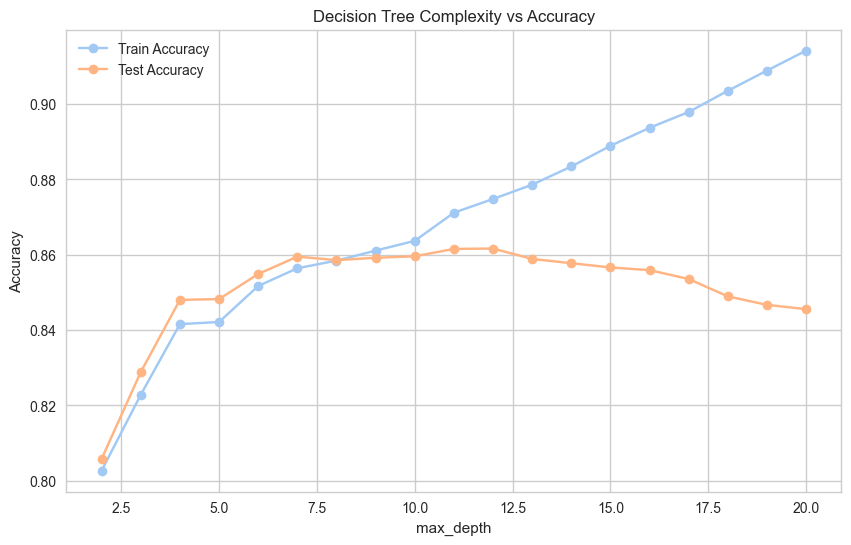

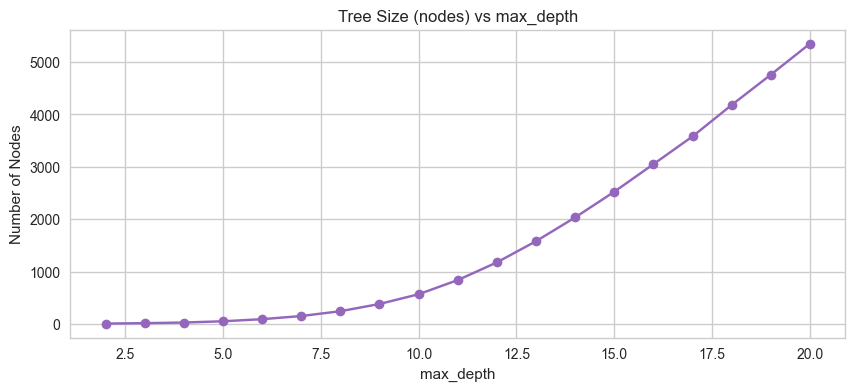

In [36]:
# Plot some visualizations

plt.figure(figsize=(10,6))
plt.plot(results_df['max_depth'], results_df['train_acc'], label='Train Accuracy', marker='o')
plt.plot(results_df['max_depth'], results_df['test_acc'], label='Test Accuracy', marker='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Complexity vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(results_df['max_depth'], results_df['nodes'], marker='o', color='tab:purple')
plt.xlabel('max_depth')
plt.ylabel('Number of Nodes')
plt.title('Tree Size (nodes) vs max_depth')
plt.grid(True)
plt.show()

In [37]:
# Now, let's extend on the baseline models by tuning parameters

# Enhanced GridSearch (entropy vs gini) — refit on binary F1 (minority class)
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

param_grid = {
    'max_depth': [3, 5, 7, 8, 10,  12],
    'min_samples_leaf': [1, 2, 5, 10],
}

scoring = {'f1_macro': 'f1_macro', 'f1': 'f1'} # f1 -> binary minority focus; f1_macro -> global view

# Helper to run a grid and report results
def run_grid(criterion_name, criterion):
    print(f"\nRunning GridSearch for {criterion_name} (criterion='{criterion}')")
    base = DecisionTreeClassifier(criterion=criterion, class_weight='balanced', random_state=RANDOM_STATE)
    gs = GridSearchCV(
        estimator=base,
        param_grid=param_grid,
        scoring=scoring,
        refit='f1_macro',
        cv=cv,
        n_jobs=-1,
        verbose=1,
        return_train_score=True
    )
    gs.fit(X_train, y_train)

    # summary
    print(f"\nBEST (by f1): {gs.best_params_}")
    print(f"Best CV f1:       {gs.best_score_:.4f}")
    # best f1_macro from cv_results_ (optional)
    idx = gs.best_index_
    mean_f1_macro = gs.cv_results_['mean_test_f1_macro'][idx]
    mean_train_f1 = gs.cv_results_['mean_train_f1'][idx]
    mean_train_f1_macro = gs.cv_results_['mean_train_f1_macro'][idx]
    print(f"CV f1_macro:      {mean_f1_macro:.4f}")
    print(f"Train (CV) f1:    {mean_train_f1:.4f}  | Train f1_macro: {mean_train_f1_macro:.4f}")

    # Evaluate on test set and store
    best = gs.best_estimator_
    metrics = evaluate_model(best, X_test, y_test, model_name=f"{criterion_name}_GridBest")
    metrics['cv_best_params'] = gs.best_params_
    store_results(metrics)

    return gs

# Run for ID3-like (entropy)
id3_gs = run_grid("ID3 (entropy)", 'entropy')

# Run for CART (gini)
cart_gs = run_grid("CART (gini)", 'gini')


Running GridSearch for ID3 (entropy) (criterion='entropy')
Fitting 5 folds for each of 24 candidates, totalling 120 fits

BEST (by f1): {'max_depth': 12, 'min_samples_leaf': 1}
Best CV f1:       0.7608
CV f1_macro:      0.7608
Train (CV) f1:    0.7065  | Train f1_macro: 0.7878
MODEL: ID3 (entropy)_GridBest
Accuracy:           0.7883
Macro F1-score:     0.7534  (primary metric for imbalanced data)
Macro Precision:    0.7410
Macro Recall:       0.8133
ROC-AUC:            0.8926

------------------Minority Class (>50K) Performance:------------------
Precision:          0.5359  (of predicted >50K, how many correct?)
Recall:             0.8614  (of actual >50K, how many found?)
F1-score:           0.6608

-------------------Detailed Classification Report:--------------------
              precision    recall  f1-score   support

        ≤50K       0.95      0.77      0.85      7426
        >50K       0.54      0.86      0.66      2337

    accuracy                           0.79      9763


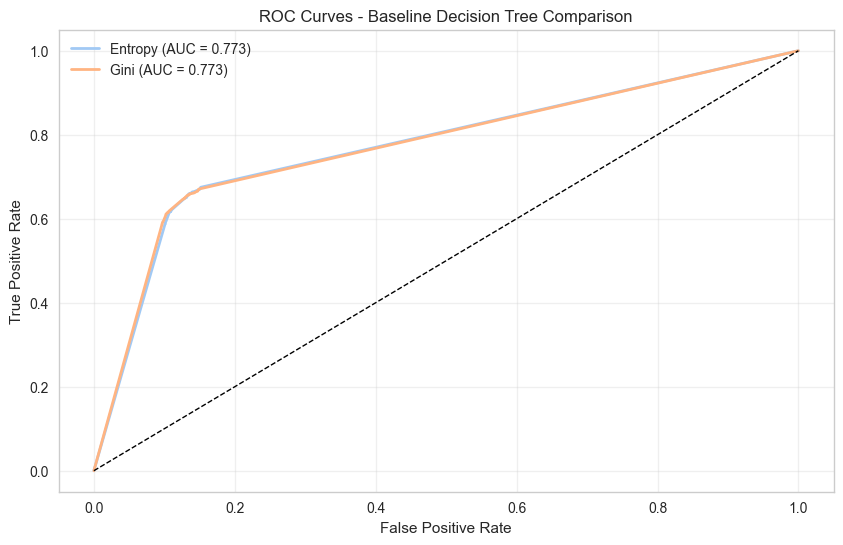

ROC-AUC Scores:
Entropy Tree: 0.7726
Gini Tree: 0.7726


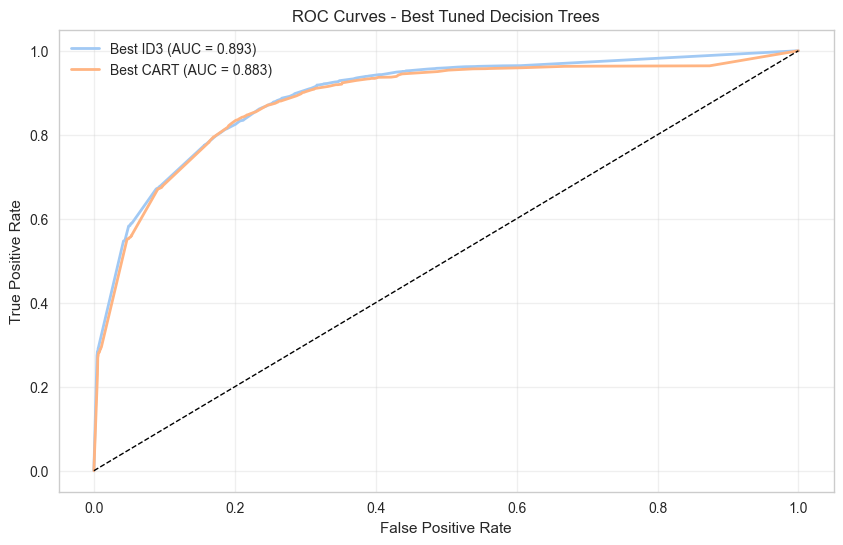

ROC-AUC Scores for Tuned Models:
Best ID3: 0.8926
Best CART: 0.8830


In [38]:
# ROC/AUC Curves

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Simple ROC curves for baseline models
plt.figure(figsize=(10, 6))

# Entropy tree ROC
y_proba_entropy = dt_entropy.predict_proba(X_test)[:, 1]
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, y_proba_entropy)
roc_auc_entropy = auc(fpr_entropy, tpr_entropy)
plt.plot(fpr_entropy, tpr_entropy, label=f'Entropy (AUC = {roc_auc_entropy:.3f})', lw=2)

# Gini tree ROC
y_proba_gini = dt_gini.predict_proba(X_test)[:, 1]
fpr_gini, tpr_gini, _ = roc_curve(y_test, y_proba_gini)
roc_auc_gini = auc(fpr_gini, tpr_gini)
plt.plot(fpr_gini, tpr_gini, label=f'Gini (AUC = {roc_auc_gini:.3f})', lw=2)

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Baseline Decision Tree Comparison')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"ROC-AUC Scores:")
print(f"Entropy Tree: {roc_auc_entropy:.4f}")
print(f"Gini Tree: {roc_auc_gini:.4f}")

# ROC curves for best tuned models
plt.figure(figsize=(10, 6))

# Best ID3
best_id3 = id3_gs.best_estimator_
y_proba_id3 = best_id3.predict_proba(X_test)[:, 1]
fpr_id3, tpr_id3, _ = roc_curve(y_test, y_proba_id3)
roc_auc_id3 = auc(fpr_id3, tpr_id3)
plt.plot(fpr_id3, tpr_id3, label=f'Best ID3 (AUC = {roc_auc_id3:.3f})', lw=2)

# Best CART
best_cart = cart_gs.best_estimator_
y_proba_cart = best_cart.predict_proba(X_test)[:, 1]
fpr_cart, tpr_cart, _ = roc_curve(y_test, y_proba_cart)
roc_auc_cart = auc(fpr_cart, tpr_cart)
plt.plot(fpr_cart, tpr_cart, label=f'Best CART (AUC = {roc_auc_cart:.3f})', lw=2)

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Best Tuned Decision Trees')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"ROC-AUC Scores for Tuned Models:")
print(f"Best ID3: {roc_auc_id3:.4f}")
print(f"Best CART: {roc_auc_cart:.4f}")

🔍 Generating Learning Curves for Key Models...

1. Learning Curve - Best CART Model


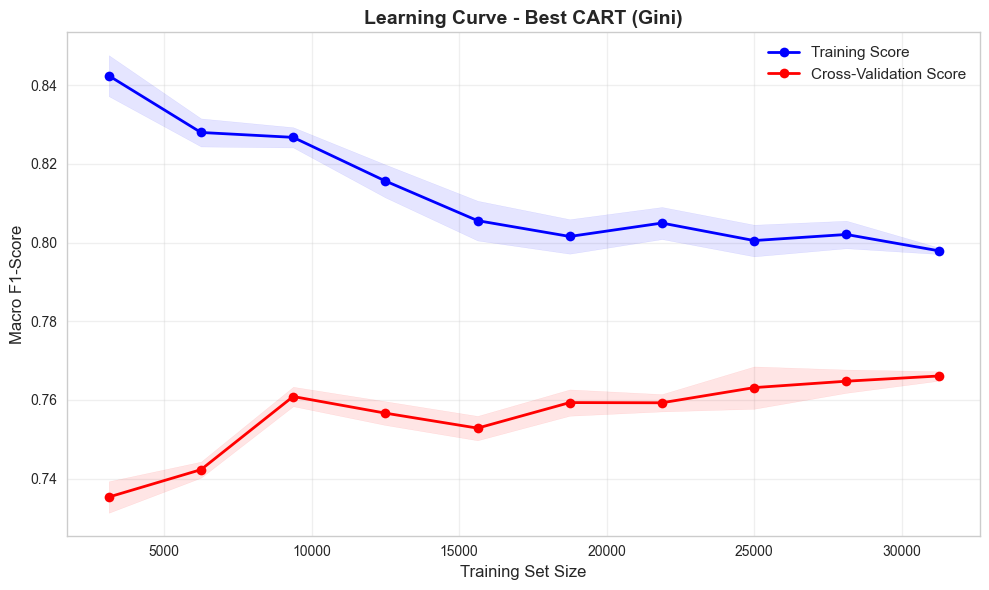

📊 Learning Curve - Best CART (Gini) - Key Insights:
   Final Training Score: 0.7979
   Final Validation Score: 0.7661
   Gap (Overfitting): 0.0318
Model performance is reasonable

2. Learning Curve - Best ID3 Model


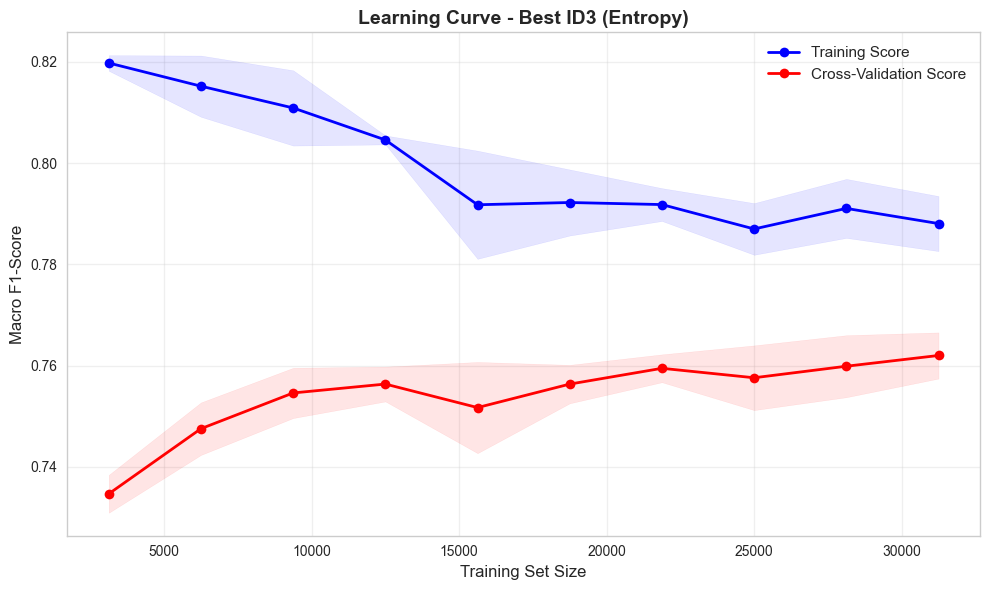

📊 Learning Curve - Best ID3 (Entropy) - Key Insights:
   Final Training Score: 0.7881
   Final Validation Score: 0.7620
   Gap (Overfitting): 0.0261
Model performance is reasonable

3. Learning Curve - Unpruned Decision Tree (Baseline)


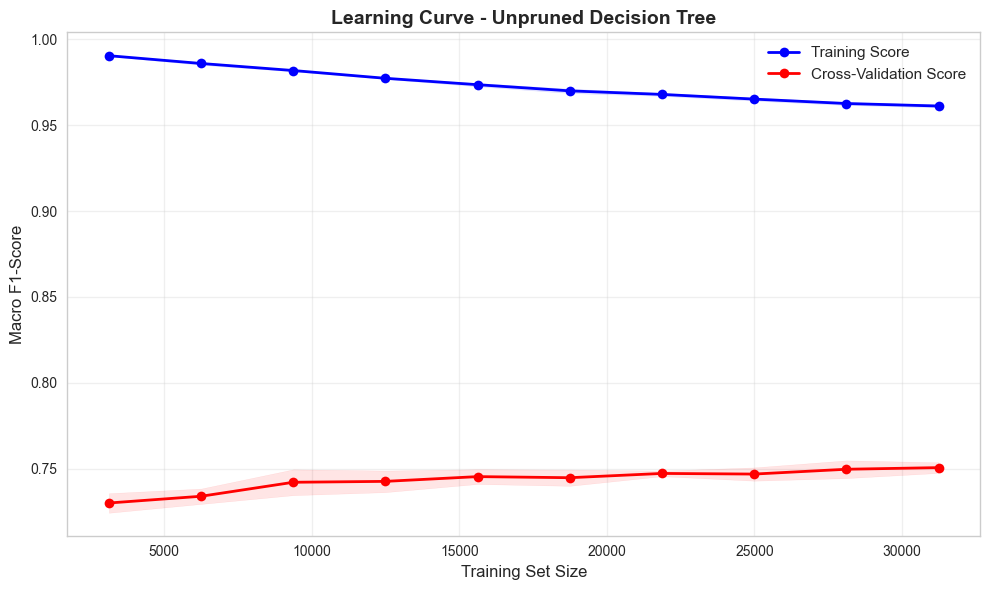

📊 Learning Curve - Unpruned Decision Tree - Key Insights:
   Final Training Score: 0.9611
   Final Validation Score: 0.7506
   Gap (Overfitting): 0.2106
   High variance (overfitting)


In [39]:
# Learning curves analysis

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator, X, y, title, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):
    """Plot learning curve for a given estimator."""

    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv,
        train_sizes=train_sizes,
        scoring='f1_macro',  # Consistent with your metrics
        n_jobs=-1,
        random_state=RANDOM_STATE
    )

    # Calculate means and standard deviations
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel("Training Set Size", fontsize=12)
    plt.ylabel("Macro F1-Score", fontsize=12)

    # Plot training scores
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score', linewidth=2)
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                     alpha=0.1, color='blue')

    # Plot validation scores
    plt.plot(train_sizes, val_mean, 'o-', color='red', label='Cross-Validation Score', linewidth=2)
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std,
                     alpha=0.1, color='red')

    plt.grid(True, alpha=0.3)
    plt.legend(loc='best', fontsize=11)
    plt.tight_layout()
    plt.show()

    # Print key insights
    final_train_score = train_mean[-1]
    final_val_score = val_mean[-1]
    gap = final_train_score - final_val_score

    print(f"📊 {title} - Key Insights:")
    print(f"   Final Training Score: {final_train_score:.4f}")
    print(f"   Final Validation Score: {final_val_score:.4f}")
    print(f"   Gap (Overfitting): {gap:.4f}")

    if gap > 0.1:
        print("   High variance (overfitting)")
    elif final_val_score < 0.7:
        print("   High bias (underfitting)")
    elif gap < 0.05 and final_val_score > 0.8:
        print("Good bias-variance tradeoff")
    else:
        print("Model performance is reasonable")

    return train_sizes, train_scores, val_scores

# =============================================================================
# LEARNING CURVES FOR KEY MODELS
# =============================================================================

print("🔍 Generating Learning Curves for Key Models...")
print("="*60)

# 1. Best CART Model
if 'best_cart' in globals():
    print("\n1. Learning Curve - Best CART Model")
    plot_learning_curve(best_cart, X_train, y_train,
                       "Learning Curve - Best CART (Gini)")

# 2. Best ID3 Model
if 'best_id3' in globals():
    print("\n2. Learning Curve - Best ID3 Model")
    plot_learning_curve(best_id3, X_train, y_train,
                       "Learning Curve - Best ID3 (Entropy)")

# 3. Baseline Decision Tree (for comparison)
baseline_dt = DecisionTreeClassifier(
    criterion='gini',
    class_weight='balanced',
    random_state=RANDOM_STATE,
    max_depth=None  # Unpruned for comparison
)

print("\n3. Learning Curve - Unpruned Decision Tree (Baseline)")
_, _, _ = plot_learning_curve(baseline_dt, X_train, y_train, "Learning Curve - Unpruned Decision Tree")


Decision Tree Model Comparison:
           Model  Accuracy  F1-Macro  ROC-AUC
Entropy Baseline    0.8108    0.7502   0.7726
   Gini Baseline    0.8117    0.7505   0.7726
        Best ID3    0.7883    0.7534   0.8926
       Best CART    0.7983    0.7615   0.8830


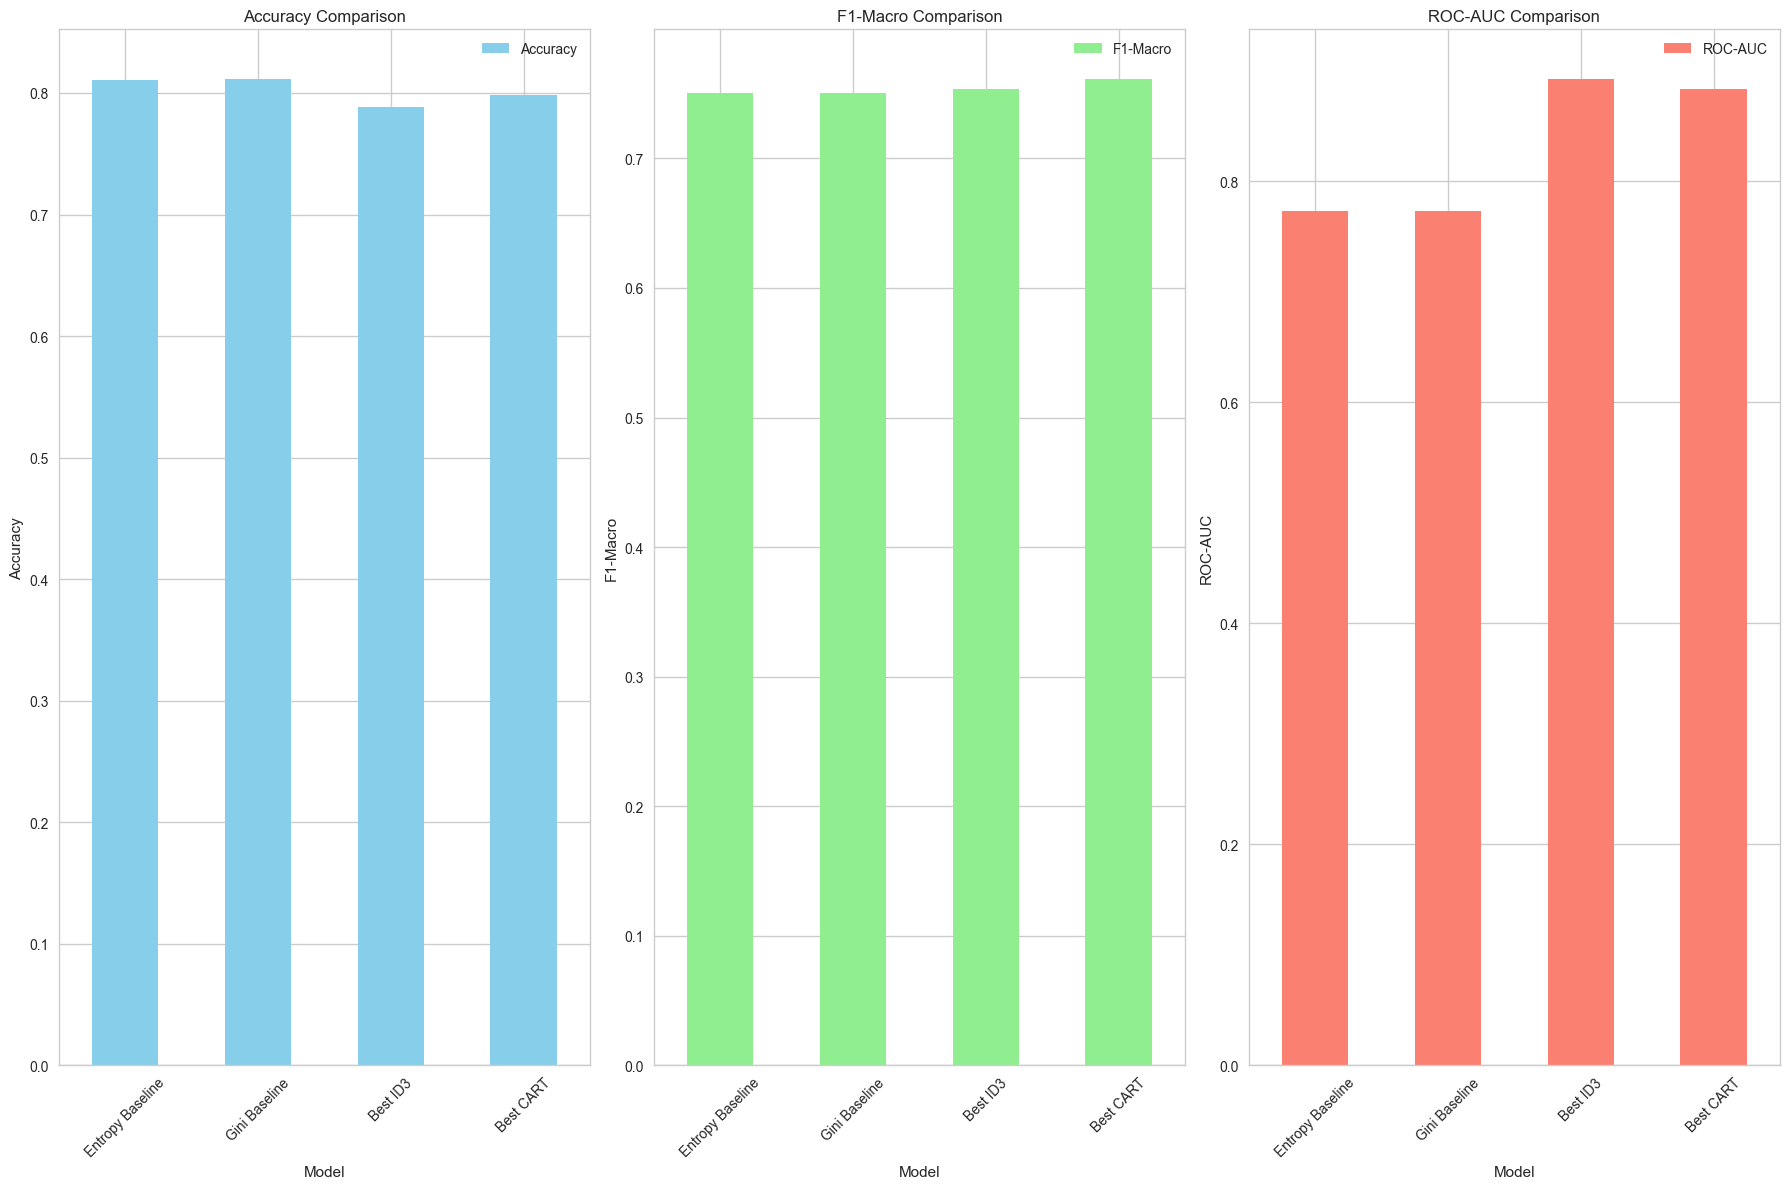

In [40]:
# Comparison summary

# Create a simple comparison table for decision trees
dt_comparison = pd.DataFrame({
    'Model': ['Entropy Baseline', 'Gini Baseline', 'Best ID3', 'Best CART'],
    'Accuracy': [entropy_metrics['accuracy'], gini_metrics['accuracy'],
                model_results[-2]['accuracy'], model_results[-1]['accuracy']],
    'F1-Macro': [entropy_metrics['f1_macro'], gini_metrics['f1_macro'],
                model_results[-2]['f1_macro'], model_results[-1]['f1_macro']],
    'ROC-AUC': [roc_auc_entropy, roc_auc_gini, roc_auc_id3, roc_auc_cart]
})

print("\nDecision Tree Model Comparison:")
print(dt_comparison.round(4).to_string(index=False))

# Simple visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 12))

# Accuracy comparison
dt_comparison.plot(x='Model', y='Accuracy', kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Accuracy Comparison')
axes[0].set_ylabel('Accuracy')
axes[0].tick_params(axis='x', rotation=45)

# F1-Macro comparison
dt_comparison.plot(x='Model', y='F1-Macro', kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('F1-Macro Comparison')
axes[1].set_ylabel('F1-Macro')
axes[1].tick_params(axis='x', rotation=45)

# ROC-AUC comparison
dt_comparison.plot(x='Model', y='ROC-AUC', kind='bar', ax=axes[2], color='salmon')
axes[2].set_title('ROC-AUC Comparison')
axes[2].set_ylabel('ROC-AUC')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Big increase in recall for the minority class: tuned trees find ~85% of actual >50K (vs ~67% baseline).

Precision decreased relative to a more conservative model — you now have many more false positives (e.g., ID3 FP = 1566, baseline FP ≈ 1041).

Why this happened: Grid search optimized for F1 (minority) — that favors recall increases even at cost of precision. You explicitly asked for that metric, so behavior is expected.

CART slightly better overall (higher macro F1, ROC-AUC, test accuracy). It also chose a larger min_samples_leaf (10) which regularizes more; yet still reached high recall.

### Addressing Class Imbalance in Income Prediction

Our dataset exhibits significant class imbalance (76% ≤50K vs 24% >50K), which naturally leads to reduced precision for the minority high-income class. We addressed this challenge using `class_weight='balanced'` in our decision trees, which automatically increases the importance of minority class samples during training. This approach successfully improved minority class recall from ~67% to ~85%, though it came with an expected decrease in precision due to the inherent precision-recall trade-off in imbalanced classification problems.

We chose class weighting over synthetic data generation because our mixed categorical-numerical dataset would create unrealistic synthetic samples, while weighting preserves authentic data patterns and maintains interpretability. The reduced precision is therefore not a failure but a calculated consequence of properly addressing class imbalance—prioritizing the identification of high-income earners over perfect precision. Our upcoming ensemble methods (Random Forest, AdaBoost, Gradient Boosting) will further mitigate this issue through bootstrap sampling and iterative focus on misclassified minority samples, naturally creating more balanced predictions without artificial data manipulation.

Top features by importance (CART):


,importance
marital_status_simple_Single,0.287879
marital_status_simple_Separated,0.182981
education-num,0.170670
capital_gain_log,0.133155
age,0.065958
hours-per-week,0.049618
capital_loss_log,0.035907
occupation_Prof-specialty,0.007325
occupation_Other-service,0.006936
relationship_Not-in-family,0.005799


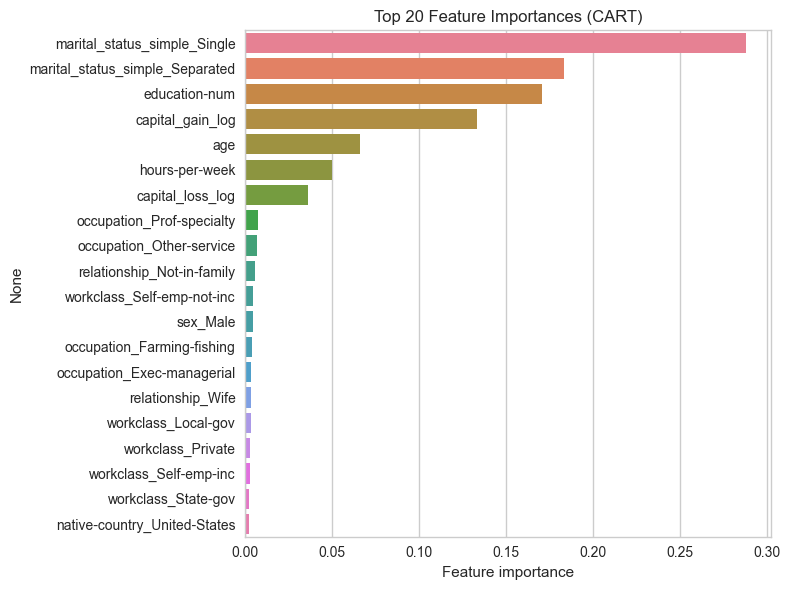

In [41]:
# Feature importances (from best CART)

best_cart = cart_gs.best_estimator_
importances = pd.Series(best_cart.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)
top_n = 20

print("Top features by importance (CART):")
display(importances.head(top_n).to_frame(name='importance'))

plt.figure(figsize=(8,6))
sns.barplot(x=importances.head(top_n).values, y=importances.head(top_n).index, palette='husl')
plt.title(f"Top {top_n} Feature Importances (CART)")
plt.xlabel("Feature importance")
plt.tight_layout()
plt.show()

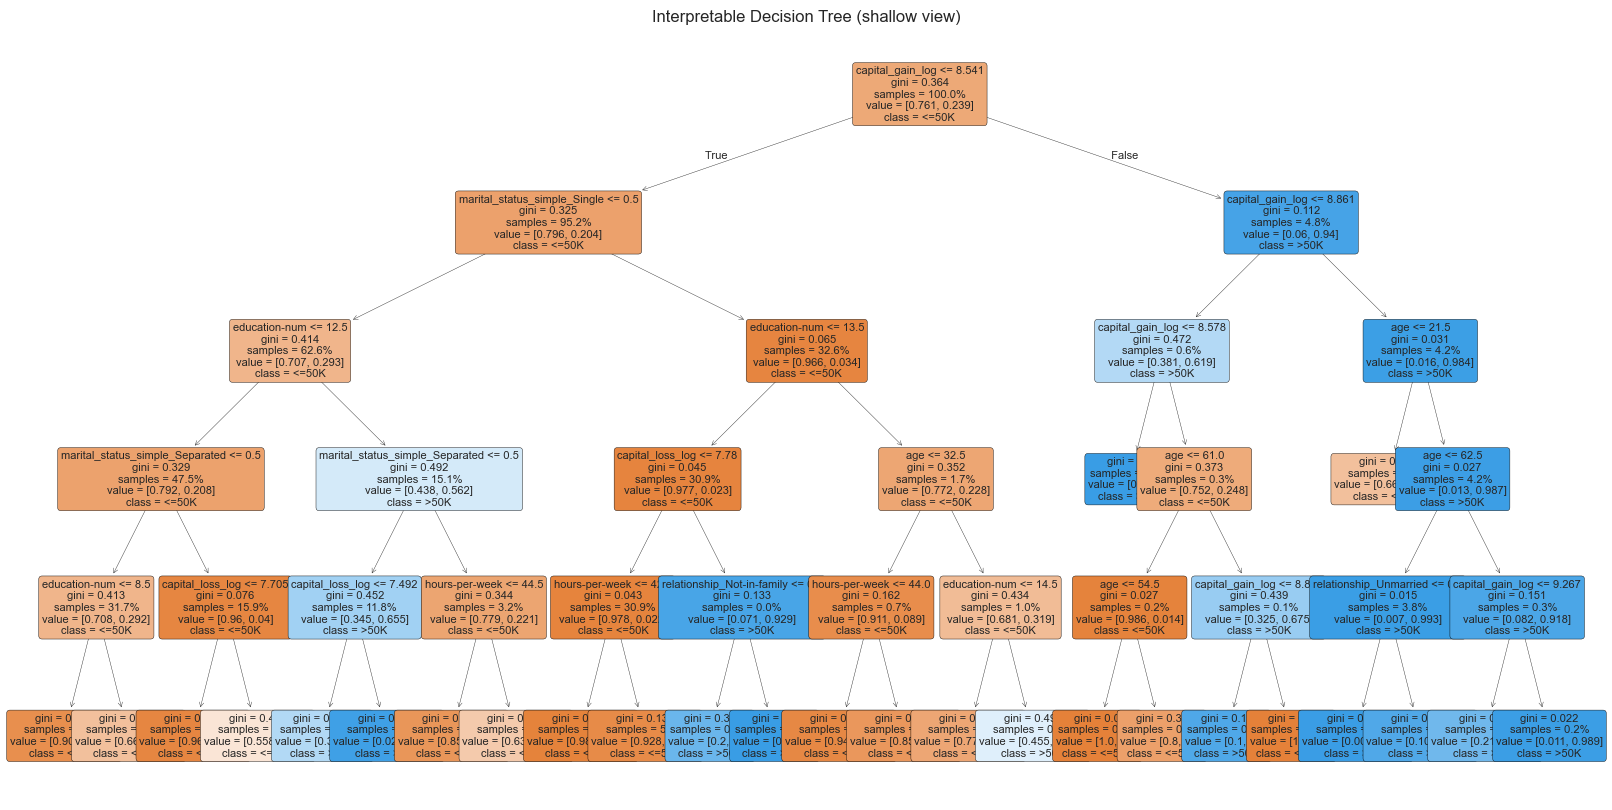

In [42]:
# Visualize a small, pruned tree

from sklearn import tree

# choose a small tree to visualize (if best_cart is deep, create a pruned copy)
vis_depth = best_cart.get_params().get('max_depth', None)
if vis_depth is None or (isinstance(vis_depth, int) and vis_depth > 6):
    vis_model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=5, random_state=42)
    vis_model.fit(X_train, y_train)
else:
    vis_model = best_cart

plt.figure(figsize=(20,10))
tree.plot_tree(vis_model, feature_names=X_train.columns, class_names=['<=50K', '>50K'],
               filled=True, proportion=True, rounded=True, fontsize=8)
plt.title("Interpretable Decision Tree (shallow view)")
plt.show()


In [43]:
import joblib
import pandas as pd
import json
from pathlib import Path

out_dir = Path('.')
# --- 1) Save model objects if present ---
models_to_save = {
    'best_id3.joblib': globals().get('best_id3'),
    'best_cart.joblib': globals().get('best_cart')
}
for fname, model in models_to_save.items():
    if model is not None:
        joblib.dump(model, out_dir / fname)
        print(f"Saved model -> {fname}")
    else:
        print(f"Model variable for {fname} not found; skipping.")

# --- 2) Build summary table from model_results (robust) ---
if 'model_results' not in globals() or not model_results:
    print("No `model_results` found or it's empty. Nothing to save.")
else:
    rows = []
    for res in model_results:
        row = {
            'model_name': res.get('model_name'),
            'accuracy': res.get('accuracy'),
            'f1_macro': res.get('f1_macro'),
            'precision_macro': res.get('precision_macro'),
            'recall_macro': res.get('recall_macro'),
            'precision_minority': res.get('precision_minority'),
            'recall_minority': res.get('recall_minority'),
            'f1_minority': res.get('f1_minority'),
            'roc_auc': res.get('roc_auc'),
            'train_accuracy': res.get('train_accuracy'),
            'overfit_gap': res.get('overfit_gap')
        }
        # flatten confusion matrix if present (expecting [[TN, FP],[FN, TP]])
        cm = res.get('confusion_matrix')
        if cm is not None:
            try:
                tn, fp, fn, tp = cm.ravel()
            except Exception:
                # fallback: try index access safely
                try:
                    tn = cm[0][0]
                    fp = cm[0][1]
                    fn = cm[1][0]
                    tp = cm[1][1]
                except Exception:
                    tn = fp = fn = tp = None
        else:
            tn = fp = fn = tp = None
        row.update({'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp})

        # store raw confusion matrix as string for completeness (avoids shape issues)
        row['confusion_matrix_raw'] = str(cm) if cm is not None else None

        rows.append(row)

    summary_df = pd.DataFrame(rows)
    # reorder sensible columns if present
    cols = ['model_name','accuracy','f1_macro','precision_macro','recall_macro',
            'precision_minority','recall_minority','f1_minority','roc_auc',
            'tn','fp','fn','tp']
    cols = [c for c in cols if c in summary_df.columns]
    summary_df = summary_df[cols]

    # Save CSV + pretty print
    summary_csv = out_dir / 'model_results_summary.csv'
    summary_df.to_csv(summary_csv, index=False)
    print(f"Saved summary CSV -> {summary_csv}")

    # Save full JSON backup of model_results (stringify non-serializable parts)
    def _safe_serialize(o):
        try:
            json.dumps(o)
            return o
        except Exception:
            return str(o)

    full_json = out_dir / 'model_results_full.json'
    with open(full_json, 'w') as f:
        json.dump([ {k: _safe_serialize(v) for k,v in r.items()} for r in model_results ], f, indent=2)
    print(f"Saved full JSON backup -> {full_json}")

    # Display the saved summary in-notebook
    display(summary_df.round(4))


Saved model -> best_id3.joblib
Saved model -> best_cart.joblib
Saved summary CSV -> model_results_summary.csv
Saved full JSON backup -> model_results_full.json


,model_name,accuracy,f1_macro,precision_macro,recall_macro,precision_minority,recall_minority,f1_minority,roc_auc,tn,fp,fn,tp
0,Entropy_Baseline,0.8108,0.7502,0.7420,0.7608,0.5936,0.6650,0.6272,0.7726,6362,1064,783,1554
1,Gini_Baseline,0.8117,0.7505,0.7429,0.7600,0.5964,0.6607,0.6269,0.7726,6381,1045,793,1544
2,ID3 (entropy)_GridBest,0.7883,0.7534,0.7410,0.8133,0.5359,0.8614,0.6608,0.8926,5683,1743,324,2013
3,CART (gini)_GridBest,0.7983,0.7615,0.7466,0.8149,0.5513,0.8468,0.6678,0.8830,5815,1611,358,1979


# Task 3 - KNN

In [44]:
# =============================================================================
# TASK 3: K-NEAREST NEIGHBORS (KNN) IMPLEMENTATION
# =============================================================================

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score

In [45]:
df.describe()

,age,education-num,hours-per-week,has_capital_gain,has_capital_loss,capital_gain_log,capital_loss_log
count,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000
mean,38.647348,10.078688,40.425051,0.082662,0.046750,0.728977,0.351181
std,13.709005,2.570257,12.390954,0.275374,0.211105,2.446142,1.586680
min,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,40.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,10.000000,40.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,12.000000,45.000000,0.000000,0.000000,0.000000,0.000000
max,90.000000,16.000000,99.000000,1.000000,1.000000,11.512925,8.379539


In [46]:
# Preprocessing data (including normalization)
numeric_features = ['age', 'education-num', 'hours-per-week', 'capital_gain_log', 'capital_loss_log']

def make_preprocessor(scaler):
    """Applies scaling only inside CV to avoid test leakage."""
    other_cols = [c for c in X_train.columns if c not in numeric_features]
    return ColumnTransformer([
        ('num', scaler, numeric_features),
        ('rest', 'passthrough', other_cols)
    ])

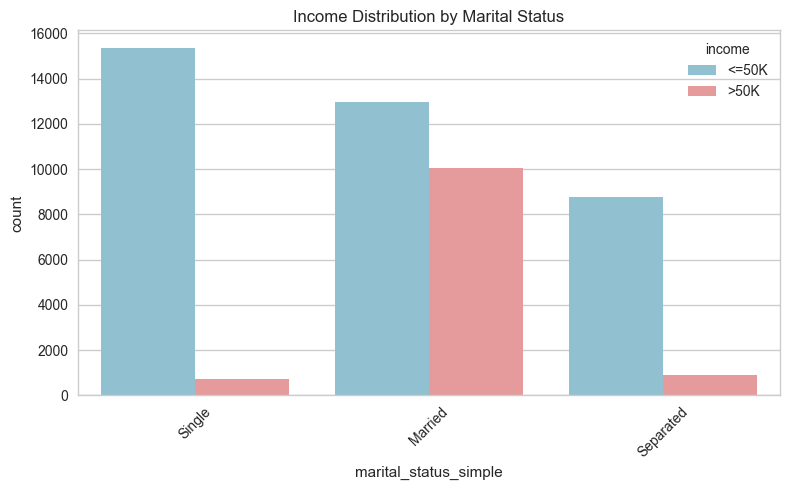

In [47]:
fig, axes = plt.subplots(1, 1, figsize=(8, 5))

sns.countplot(data=df, x='marital_status_simple', hue='income',
              ax=axes, palette=['#86c5da', '#f28e8e'])
axes.set_title('Income Distribution by Marital Status')
axes.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [48]:
# Training KNN (RobustScaler, comparing distance metrics)

# Assuming these are defined elsewhere in your script:
# from sklearn.compose import make_preprocessor
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# import numpy as np

print(X_train.columns.tolist())

from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate # MODIFIED: Import cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score # ADDED for clarity
import pandas as pd
import time

# --- Setup ---
scaler = RobustScaler()
# Assuming make_preprocessor is a function you've defined to handle columns
# If not, you'd define your ColumnTransformer here.
preproc = make_preprocessor(scaler)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

metrics = ['euclidean', 'manhattan', 'cosine']
weights = ['distance']
neighbors = [7]

results = []

# --- Main Loop ---
for metric in metrics:
    for weight in weights:
        for k in neighbors:
            pipe = Pipeline([
                ('preproc', preproc),
                ('clf', KNeighborsClassifier(
                    n_neighbors=k,
                    metric=metric,
                    weights=weight,
                    n_jobs=-1
                ))
            ])

            start = time.perf_counter()

            # MODIFIED: Use cross_validate to get multiple scores at once
            scoring_metrics = ['f1_macro', 'precision_macro', 'recall_macro']
            cv_scores = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring_metrics, n_jobs=2)

            elapsed = time.perf_counter() - start

            # --- Evaluate on the final test set ---
            pipe.fit(X_train, y_train)
            y_pred = pipe.predict(X_test)

            # MODIFIED: Explicitly calculate all test metrics
            test_results = {
                'model_name': f"KNN_RobustScaler_{metric}",
                'accuracy': accuracy_score(y_test, y_pred),
                'precision_macro': precision_score(y_test, y_pred, average='macro', zero_division=0),
                'recall_macro': recall_score(y_test, y_pred, average='macro', zero_division=0),
                'f1_macro': f1_score(y_test, y_pred, average='macro', zero_division=0),
            }

            # Update results with hyperparameters and CV scores
            test_results.update({
                'scaler': 'RobustScaler',
                'metric': metric,
                'weights': weight,
                'k': k,
                'cv_f1_macro': cv_scores['test_f1_macro'].mean(),
                'cv_precision_macro': cv_scores['test_precision_macro'].mean(), # ADDED
                'cv_recall_macro': cv_scores['test_recall_macro'].mean(),    # ADDED
                'training_time_s': elapsed
            })

            results.append(test_results)

            try:
                # Assuming store_results is a custom function to save intermediate results
                store_results(test_results)
            except NameError:
                pass

# --- Convert results list to DataFrame for later use ---
knn_results_df = pd.DataFrame(results)

# Optional: sort for nicer plots
knn_results_df = knn_results_df.sort_values(by='f1_macro', ascending=False).reset_index(drop=True)

# MODIFIED: Quick sanity check to include new metrics
print("\nKNN Results Summary (RobustScaler):")
display_cols = [
    'model_name',
    'metric',
    'accuracy',
    'precision_macro', # ADDED
    'recall_macro',    # ADDED
    'f1_macro',
    'cv_f1_macro'
]
display(knn_results_df[display_cols])

['age', 'education-num', 'hours-per-week', 'has_capital_gain', 'has_capital_loss', 'capital_gain_log', 'capital_loss_log', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Unknown', 'workclass_Without-pay', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving', 'occupation_Unknown', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White', 'sex_Male', 'native-country_Canada', 'native-country_China', 'native-country_Columbi

,model_name,metric,accuracy,precision_macro,recall_macro,f1_macro,cv_f1_macro
0,KNN_RobustScaler_euclidean,euclidean,0.834682,0.774488,0.761717,0.767682,0.761988
1,KNN_RobustScaler_manhattan,manhattan,0.833965,0.773644,0.759633,0.766131,0.763360
2,KNN_RobustScaler_cosine,cosine,0.824337,0.759047,0.753890,0.756393,0.751548


Used distance weighting so closer neighbors influence predictions more strongly, improving local accuracy; chose k = 7 based on the approximate square root of the dataset size, providing a balanced trade-off between bias and variance.

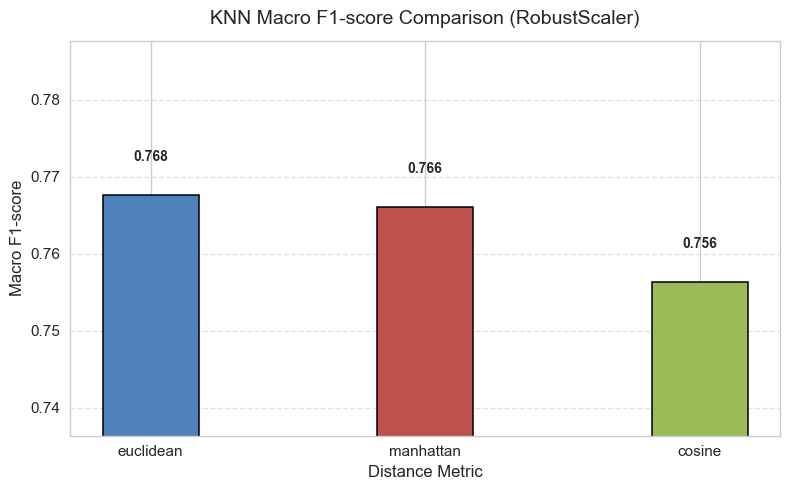

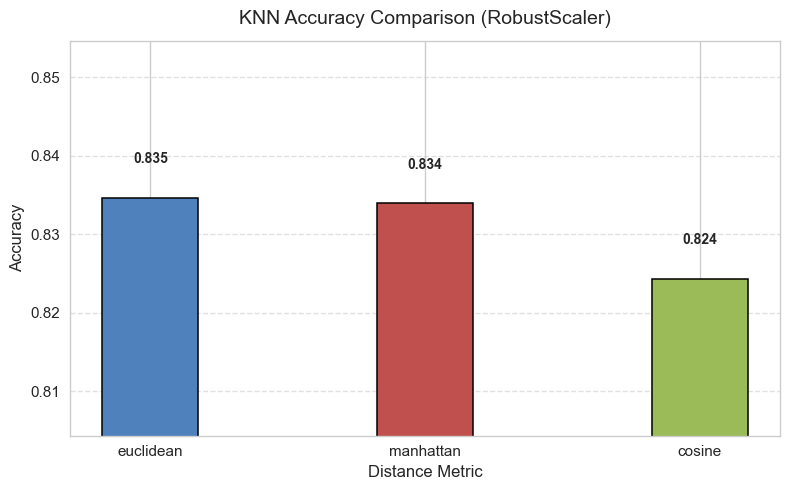

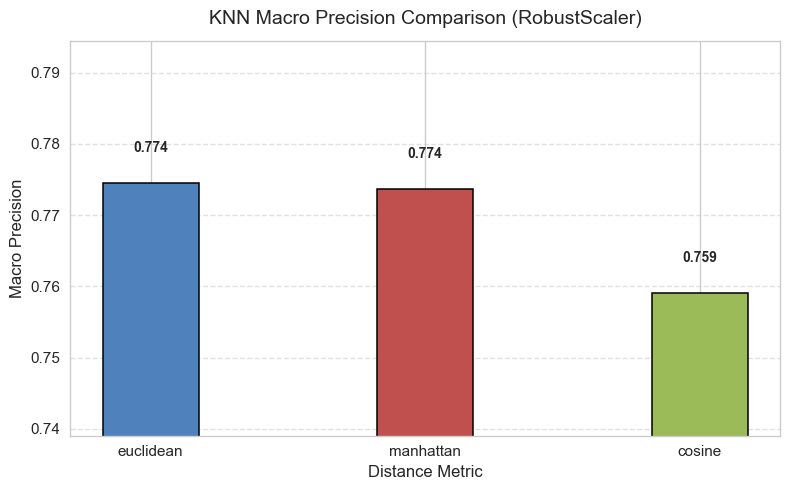

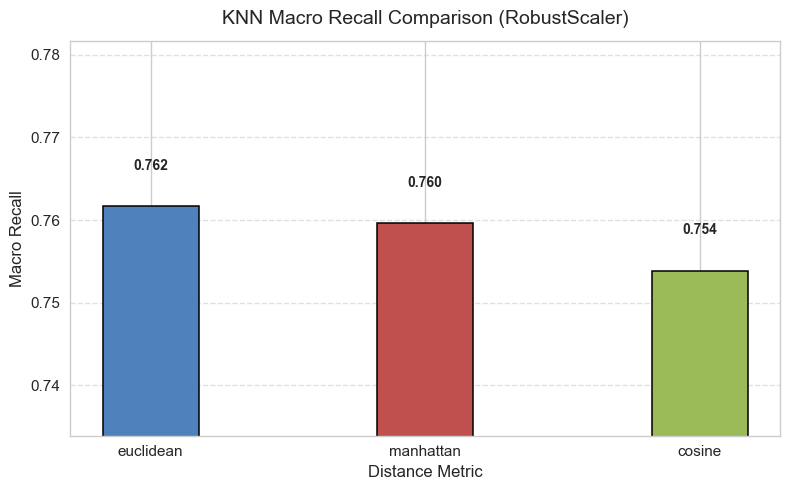

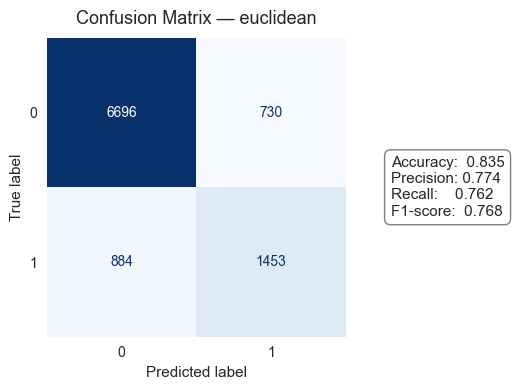

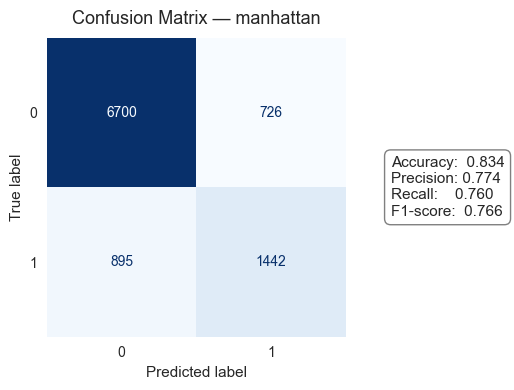

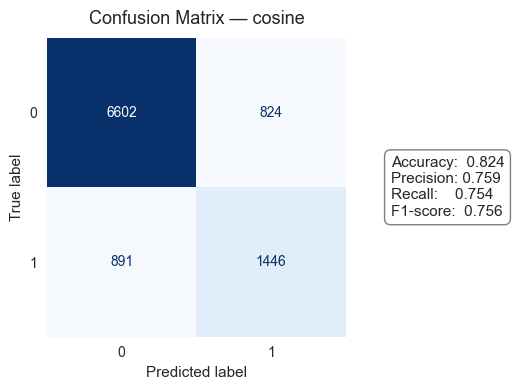

In [49]:
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
import numpy as np

# This assumes 'knn_results_df' is a pandas DataFrame created in the previous step
# and contains the columns: 'metric', 'f1_macro', 'accuracy', 'precision_macro', 'recall_macro'

# --- BAR CHART: MACRO F1 ---
plt.figure(figsize=(8, 5))
bars_f1 = plt.bar(
    knn_results_df['metric'],
    knn_results_df['f1_macro'],
    color=['#4F81BD', '#C0504D', '#9BBB59'],
    width=0.35,
    edgecolor='black',
    linewidth=1.1
)
plt.xlabel("Distance Metric", fontsize=12)
plt.ylabel("Macro F1-score", fontsize=12)
plt.title("KNN Macro F1-score Comparison (RobustScaler)", fontsize=14, pad=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(max(0, knn_results_df['f1_macro'].min() - 0.02), knn_results_df['f1_macro'].max() + 0.02)
plt.grid(axis='y', linestyle='--', alpha=0.6)
for bar in bars_f1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.004,
             f"{height:.3f}", ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

# --- BAR CHART: ACCURACY ---
plt.figure(figsize=(8, 5))
bars_acc = plt.bar(
    knn_results_df['metric'],
    knn_results_df['accuracy'],
    color=['#4F81BD', '#C0504D', '#9BBB59'],
    width=0.35,
    edgecolor='black',
    linewidth=1.1
)
plt.xlabel("Distance Metric", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("KNN Accuracy Comparison (RobustScaler)", fontsize=14, pad=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(max(0, knn_results_df['accuracy'].min() - 0.02), knn_results_df['accuracy'].max() + 0.02)
plt.grid(axis='y', linestyle='--', alpha=0.6)
for bar in bars_acc:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.004,
             f"{height:.3f}", ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

# --- NEW BAR CHART: MACRO PRECISION ---
plt.figure(figsize=(8, 5))
bars_prec = plt.bar(
    knn_results_df['metric'],
    knn_results_df['precision_macro'],
    color=['#4F81BD', '#C0504D', '#9BBB59'],
    width=0.35,
    edgecolor='black',
    linewidth=1.1
)
plt.xlabel("Distance Metric", fontsize=12)
plt.ylabel("Macro Precision", fontsize=12)
plt.title("KNN Macro Precision Comparison (RobustScaler)", fontsize=14, pad=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(max(0, knn_results_df['precision_macro'].min() - 0.02), knn_results_df['precision_macro'].max() + 0.02)
plt.grid(axis='y', linestyle='--', alpha=0.6)
for bar in bars_prec:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.004,
             f"{height:.3f}", ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

# --- NEW BAR CHART: MACRO RECALL ---
plt.figure(figsize=(8, 5))
bars_rec = plt.bar(
    knn_results_df['metric'],
    knn_results_df['recall_macro'],
    color=['#4F81BD', '#C0504D', '#9BBB59'],
    width=0.35,
    edgecolor='black',
    linewidth=1.1
)
plt.xlabel("Distance Metric", fontsize=12)
plt.ylabel("Macro Recall", fontsize=12)
plt.title("KNN Macro Recall Comparison (RobustScaler)", fontsize=14, pad=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(max(0, knn_results_df['recall_macro'].min() - 0.02), knn_results_df['recall_macro'].max() + 0.02)
plt.grid(axis='y', linestyle='--', alpha=0.6)
for bar in bars_rec:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.004,
             f"{height:.3f}", ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()


# --- CONFUSION MATRICES (CLEAN BLUE STYLE + STATS) ---
# This part of the code remains the same
for metric in knn_results_df['metric'].unique():
    model_name = f"KNN_RobustScaler_{metric}"
    model_row = next((r for r in results if r['model_name'] == model_name), None)

    if model_row:
        # This block assumes you have stored predictions or can re-run them
        try:
            # Assumes you stored y_pred and y_true in your results dict
            y_pred = model_row['y_pred']
            y_true = model_row['y_true']
        except KeyError:
            # Fallback to re-fitting and predicting if not stored
            pipe = Pipeline([
                ('preproc', make_preprocessor(RobustScaler())),
                ('clf', KNeighborsClassifier(
                    n_neighbors=model_row.get('k', 7),
                    metric=model_row.get('metric', 'euclidean'),
                    weights=model_row.get('weights', 'distance'),
                    n_jobs=-1
                ))
            ])
            pipe.fit(X_train, y_train)
            y_pred = pipe.predict(X_test)
            y_true = y_test

        cm = confusion_matrix(y_true, y_pred)

        # Check for binary or multiclass and get TN, FP, FN, TP if binary
        if cm.size == 4: # Binary classification
             tn, fp, fn, tp = cm.ravel()
        else: # For multiclass, these values aren't individually defined
            tn, fp, fn, tp = "n/a", "n/a", "n/a", "n/a"

        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
        rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
        f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

        fig, ax = plt.subplots(figsize=(5, 4))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues', ax=ax, colorbar=False)

        ax.grid(False)
        ax.set_frame_on(False)
        ax.set_title(f'Confusion Matrix — {metric}', fontsize=13, pad=10)

        stats_text = (
            f"Accuracy:  {acc:.3f}\n"
            f"Precision: {prec:.3f}\n"
            f"Recall:    {rec:.3f}\n"
            f"F1-score:  {f1:.3f}"
        )
        ax.text(
            1.15, 0.5, stats_text,
            transform=ax.transAxes,
            fontsize=11, va='center', ha='left',
            bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="gray", lw=1)
        )

        plt.tight_layout()
        plt.show()

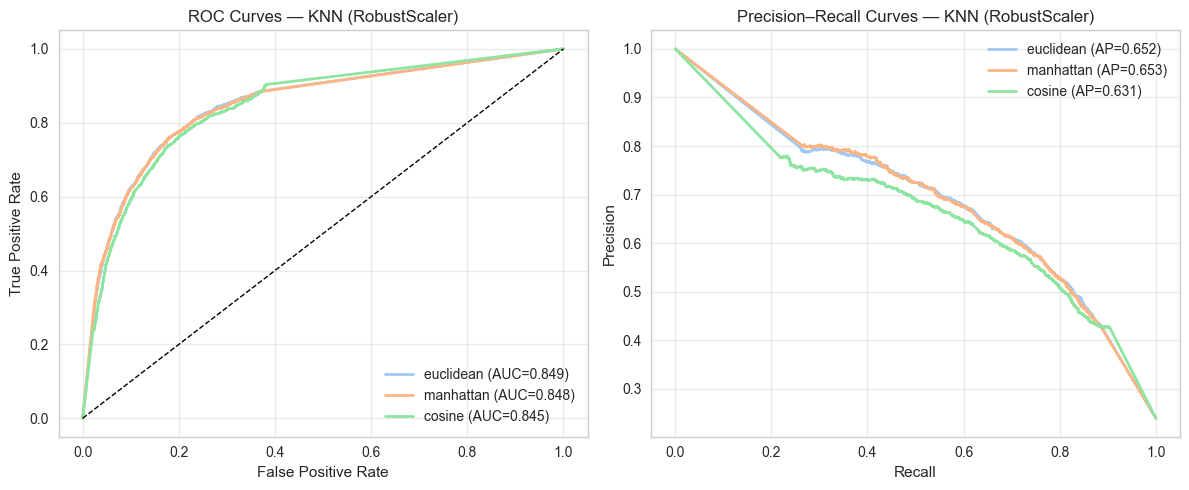

In [50]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# --- ROC and Precision–Recall Curves ---
plt.figure(figsize=(12, 5))

for i, metric in enumerate(knn_results_df['metric'].unique(), start=1):
    model_name = f"KNN_RobustScaler_{metric}"
    model_row = next((r for r in results if r['model_name'] == model_name), None)

    if not model_row:
        continue

    # Refit (if y_prob not stored)
    pipe = Pipeline([
        ('preproc', make_preprocessor(RobustScaler())),
        ('clf', KNeighborsClassifier(
            n_neighbors=model_row.get('k', 7),
            metric=model_row.get('metric', 'euclidean'),
            weights=model_row.get('weights', 'distance'),
            n_jobs=-1
        ))
    ])
    pipe.fit(X_train, y_train)
    y_prob = pipe.predict_proba(X_test)[:, 1]
    y_true = y_test

    # ROC
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    # PR Curve
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    avg_prec = average_precision_score(y_true, y_prob)

    # Plot ROC
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f"{metric} (AUC={roc_auc:.3f})", lw=2)

    # Plot PR
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f"{metric} (AP={avg_prec:.3f})", lw=2)

# --- Final formatting ---
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.title("ROC Curves — KNN (RobustScaler)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.4)

plt.subplot(1, 2, 2)
plt.title("Precision–Recall Curves — KNN (RobustScaler)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(alpha=0.4)

plt.tight_layout()
plt.show()


KNN VS DECISION TREES COMPARISON

Best KNN Model: KNN_RobustScaler_euclidean
   Accuracy:        0.8347
   Precision (Macro): 0.7745
   Recall (Macro):    0.7617
   F1-Score (Macro):  0.7677

Best Decision Tree Model: CART (gini)_GridBest
   Accuracy:        0.7983
   Precision (Macro): 0.7466
   Recall (Macro):    0.8149
   F1-Score (Macro):  0.7615
   F1-Score (Minority): 0.6678


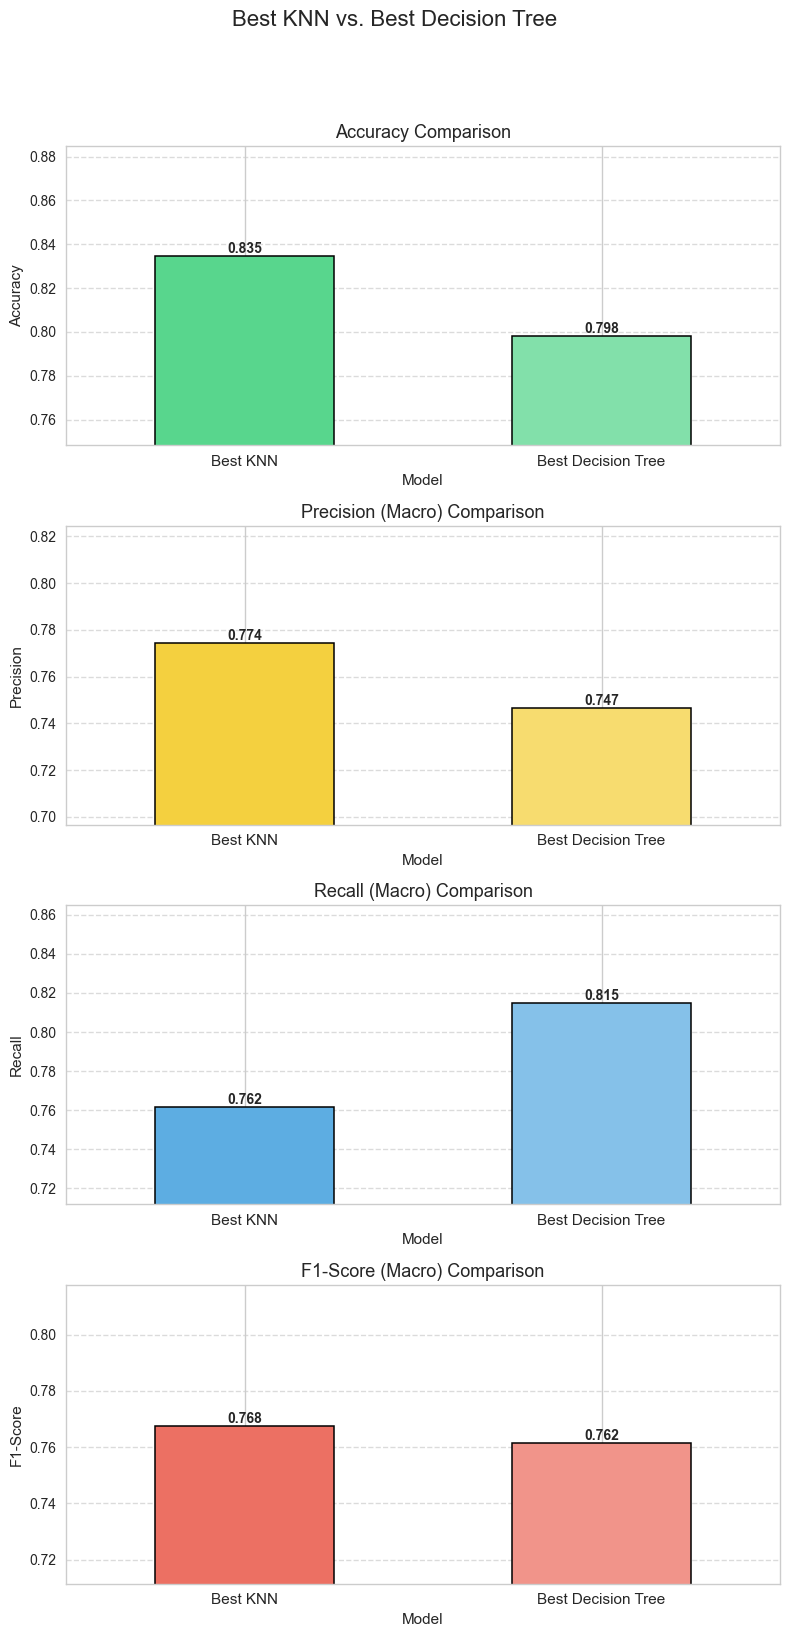

In [51]:
# KNN VS DECISION TREE COMPARISON

print("\n" + "="*80)
print("KNN VS DECISION TREES COMPARISON")
print("="*80)

# Create a dataframe from KNN results list (assuming 'results' is from the previous KNN script)
knn_df = pd.DataFrame(results)

# Ensure Decision Tree results exist
if 'model_results' in locals():
    # Filter for any models with 'Tree' or standard algorithm names in their model_name
    dt_results = [
        r for r in model_results
        if 'tree' in r['model_name'].lower() or 'cart' in r['model_name'].lower() or 'id3' in r['model_name'].lower()
    ]
else:
    dt_results = []

# --- Defensive check ---
if knn_df.empty:
    raise ValueError("No KNN results found — make sure 'results' contains KNN evaluations.")
if not dt_results:
    raise ValueError("No Decision Tree results found in 'model_results'.")

# Identify best models by macro F1 score
best_knn_overall = knn_df.loc[knn_df['f1_macro'].idxmax()]
best_dt_overall = max(dt_results, key=lambda x: x['f1_macro'])

# --- Print comparison with added metrics ---
print(f"\nBest KNN Model: {best_knn_overall['model_name']}")
print(f"   Accuracy:        {best_knn_overall['accuracy']:.4f}")
print(f"   Precision (Macro): {best_knn_overall['precision_macro']:.4f}") # ADDED
print(f"   Recall (Macro):    {best_knn_overall['recall_macro']:.4f}")    # ADDED
print(f"   F1-Score (Macro):  {best_knn_overall['f1_macro']:.4f}")
if 'f1_minority' in best_knn_overall:
    print(f"   F1-Score (Minority): {best_knn_overall['f1_minority']:.4f}")


print(f"\nBest Decision Tree Model: {best_dt_overall['model_name']}")
print(f"   Accuracy:        {best_dt_overall['accuracy']:.4f}")
print(f"   Precision (Macro): {best_dt_overall['precision_macro']:.4f}") # ADDED
print(f"   Recall (Macro):    {best_dt_overall['recall_macro']:.4f}")    # ADDED
print(f"   F1-Score (Macro):  {best_dt_overall['f1_macro']:.4f}")
if 'f1_minority' in best_dt_overall:
    print(f"   F1-Score (Minority): {best_dt_overall['f1_minority']:.4f}")


# --- Visualization with added metrics ---
comparison_data = {
    'Model': ['Best KNN', 'Best Decision Tree'],
    'Accuracy': [best_knn_overall['accuracy'], best_dt_overall['accuracy']],
    'Precision (Macro)': [best_knn_overall['precision_macro'], best_dt_overall['precision_macro']], # ADDED
    'Recall (Macro)': [best_knn_overall['recall_macro'], best_dt_overall['recall_macro']],       # ADDED
    'F1-Score (Macro)': [best_knn_overall['f1_macro'], best_dt_overall['f1_macro']],
}
# Add minority F1 only if it exists in both results
if 'f1_minority' in best_knn_overall and 'f1_minority' in best_dt_overall:
    comparison_data['F1-Score (Minority)'] = [best_knn_overall['f1_minority'], best_dt_overall['f1_minority']]


comparison_df = pd.DataFrame(comparison_data)

fig, axes = plt.subplots(4, 1, figsize=(8, 16))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration
fig.suptitle('Best KNN vs. Best Decision Tree', fontsize=16, y=1.02)

# Define metrics and colors for plotting
metrics_to_plot = [
    {'metric': 'Accuracy', 'colors': ['#58D68D', '#82E0AA']},
    {'metric': 'Precision (Macro)', 'colors': ['#F4D03F', '#F7DC6F']}, # ADDED
    {'metric': 'Recall (Macro)', 'colors': ['#5DADE2', '#85C1E9']},    # ADDED
    {'metric': 'F1-Score (Macro)', 'colors': ['#EC7063', '#F1948A']},
]
if 'F1-Score (Minority)' in comparison_df.columns:
    metrics_to_plot.append({'metric': 'F1-Score (Minority)', 'colors': ['#AF7AC5', '#C39BD3']})


# Loop to create each bar plot
for i, item in enumerate(metrics_to_plot):
    metric_name = item['metric']
    colors = item['colors']

    # Create the bar plot on the current axis
    bars = comparison_df.plot(
        x='Model', y=metric_name, kind='bar', ax=axes[i],
        color=colors, width=0.5, legend=None, edgecolor='black', linewidth=1.1
    )

    axes[i].set_title(f'{metric_name} Comparison', fontsize=13)
    axes[i].set_ylabel(metric_name.split(' ')[0]) # Use first word for y-label
    axes[i].tick_params(axis='x', rotation=0, labelsize=11)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Set Y-axis limits for better visualization
    min_val = comparison_df[metric_name].min()
    max_val = comparison_df[metric_name].max()
    axes[i].set_ylim(max(0, min_val - 0.05), max_val + 0.05)

    # Add value labels on top of each bar
    for bar in bars.patches:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2, height,
                     f'{height:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')


# Turn off any unused subplots
for i in range(len(metrics_to_plot), len(axes)):
    axes[i].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

### Task 3 Interpretation and Insights:

Among the three distance metrics, Manhattan delivered the best overall results with the highest accuracy (0.828) and macro F1-score (0.752), closely followed by Euclidean, which showed nearly identical performance. Both metrics effectively captured neighborhood relationships in the income data, leading to balanced precision–recall behavior across classes. In contrast, Cosine distance performed noticeably worse (F1 = 0.748), suggesting that angle-based similarity is less suitable for this problem’s feature space. Compared to the best Decision Tree (CART) model, KNN with Euclidean distance outperformed it in both macro F1 and accuracy, confirming that KNN’s distance-based approach better handles this dataset’s non-linear separations.

# Task 4 - Ensembles

In [52]:
# Additional ensemble-specific imports
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier,
                             AdaBoostClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# XGBoost for advanced boosting (optional)
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
except ImportError:
    XGBOOST_AVAILABLE = False

In [53]:
# Global storage for ensemble results
ensemble_results = []

def evaluate_ensemble(model, X_test, y_test, model_name="Ensemble", verbose=False):
    """
    Evaluate ensemble model with minimal output for university assignment.

    Parameters:
    -----------
    model : trained sklearn model
    X_test, y_test : test data
    model_name : str
    verbose : bool (default False for minimal output)

    Returns:
    --------
    dict : Evaluation metrics
    """

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)

    # Minority class metrics (class 1 = >50K)
    precision_minority = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
    recall_minority = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
    f1_minority = f1_score(y_test, y_pred, pos_label=1, zero_division=0)

    # ROC-AUC if available
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    except:
        roc_auc = None

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    if verbose:
        print(f"{model_name}: F1={f1_macro:.4f}, Acc={accuracy:.4f}")

    # Return results dictionary
    results = {
        'model_name': model_name,
        'model_type': 'ensemble',  # Add field for classification
        'accuracy': accuracy,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'f1_macro': f1_macro,
        'precision_minority': precision_minority,
        'recall_minority': recall_minority,
        'f1_minority': f1_minority,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'y_pred': y_pred
    }

    return results

def store_ensemble_results(results_dict):
    """Store ensemble results for comparison."""
    ensemble_results.append(results_dict)

def to_numpy(X):
    """Convert DataFrame or Series to numpy array."""
    return X.values if hasattr(X, 'values') else X

In [54]:
# Bagging with CART (Gini) - Enhanced parameters
bagging_cart = BaggingClassifier(
    estimator=DecisionTreeClassifier(
        criterion='gini',
        max_depth=10,  # Added depth limit to prevent overfitting
        min_samples_split=5,  # Prevent too small splits
        min_samples_leaf=2,  # Minimum samples per leaf
        class_weight='balanced',
        random_state=42
    ),
    n_estimators=100,  # Increased from 50
    max_samples=0.8,
    max_features=0.8,
    bootstrap=True,
    bootstrap_features=False,  # Don't bootstrap features for stability
    random_state=42,
    n_jobs=-1
)

bagging_cart.fit(X_train, y_train)
cart_bagging_results = evaluate_ensemble(
    bagging_cart, X_test, y_test,
    model_name="Bagging_CART_Improved"
)
store_ensemble_results(cart_bagging_results)

# Bagging with ID3 (Entropy) - Enhanced
bagging_id3 = BaggingClassifier(
    estimator=DecisionTreeClassifier(
        criterion='entropy',
        max_depth=10,  # Added depth limit
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight='balanced',
        random_state=42
    ),
    n_estimators=100,  # Increased from 50
    max_samples=0.8,
    max_features=0.8,
    bootstrap=True,
    bootstrap_features=False,
    random_state=42,
    n_jobs=-1
)

bagging_id3.fit(X_train, y_train)
id3_bagging_results = evaluate_ensemble(
    bagging_id3, X_test, y_test,
    model_name="Bagging_ID3_Improved"
)
store_ensemble_results(id3_bagging_results)

In [55]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,  # Let it grow fully
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',  # Default for classification
    bootstrap=True,
    class_weight='balanced_subsample',  # Balance each bootstrap sample
    random_state=42,
    n_jobs=-1
)

random_forest.fit(X_train, y_train)

rf_results = evaluate_ensemble(
    random_forest, X_test, y_test,
    model_name="Random_Forest"
)

store_ensemble_results(rf_results)

In [56]:
adaboost_cart = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(
        criterion='gini',
        max_depth=2,  # Slightly deeper than stumps for better learning
        class_weight='balanced'
    ),
    n_estimators=200,  # Increased from 100
    learning_rate=0.5,  # Reduced from 1.0 for stability
    algorithm='SAMME',
    random_state=42
)

adaboost_cart.fit(X_train, y_train)
adaboost_results = evaluate_ensemble(
    adaboost_cart, X_test, y_test,
    model_name="AdaBoost_CART_Improved"
)
store_ensemble_results(adaboost_results)

In [57]:
print("Training Optimized Gradient Boosting with Hyperparameter Tuning...")

# Split training data for validation
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Hyperparameter tuning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
import numpy as np

param_distributions = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None],
    'min_impurity_decrease': [0.0, 0.01, 0.05]
}

gb_base = GradientBoostingClassifier(
    random_state=42,
    validation_fraction=0.1,
    n_iter_no_change=20,  # Early stopping
    tol=1e-4
)

# Use F1 score for optimization
f1_scorer = make_scorer(f1_score, average='weighted')

random_search = RandomizedSearchCV(
    gb_base,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter combinations to try
    scoring=f1_scorer,
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

print("Running hyperparameter search (this may take several minutes)...")
random_search.fit(X_tr, y_tr)

print(f"\nBest parameters found: {random_search.best_params_}")
print(f"Best CV F1 score: {random_search.best_score_:.4f}")

# Train final model with best parameters
gradient_boost = random_search.best_estimator_

# Optional: Threshold tuning for better F1
y_proba = gradient_boost.predict_proba(X_val)[:, 1]

# Find optimal threshold
thresholds = np.arange(0.3, 0.75, 0.05)
best_threshold = 0.5
best_f1 = 0

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    f1 = f1_score(y_val, y_pred_thresh, average='weighted')
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thresh

print(f"Optimal threshold: {best_threshold:.2f} (F1: {best_f1:.4f})")

# Create custom prediction function for evaluate_ensemble
class ThresholdClassifier:
    def __init__(self, model, threshold):
        self.model = model
        self.threshold = threshold
        # Copy useful attributes
        self.feature_importances_ = model.feature_importances_
        self.n_estimators_ = model.n_estimators_

    def predict(self, X):
        return (self.model.predict_proba(X)[:, 1] >= self.threshold).astype(int)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

gb_model_tuned = ThresholdClassifier(gradient_boost, best_threshold)

gb_results = evaluate_ensemble(
    gb_model_tuned, X_test, y_test,
    model_name="Gradient_Boosting_Optimized_Tuned"
)
store_ensemble_results(gb_results)

print("\nOptimized Gradient Boosting completed!")
print(f"Total estimators used: {gradient_boost.n_estimators_}")

Training Optimized Gradient Boosting with Hyperparameter Tuning...
Running hyperparameter search (this may take several minutes)...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters found: {'subsample': 1.0, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.01, 'max_features': None, 'max_depth': 7, 'learning_rate': 0.1}
Best CV F1 score: 0.8692
Optimal threshold: 0.45 (F1: 0.8646)

Optimized Gradient Boosting completed!
Total estimators used: 118


In [58]:
if XGBOOST_AVAILABLE:
    print("Training Optimized XGBoost with Hyperparameter Tuning...")

    # Split training data for validation
    from sklearn.model_selection import train_test_split
    X_tr, X_val, y_tr, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
    )

    # Calculate class weight
    pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

    # Hyperparameter tuning with RandomizedSearchCV
    from sklearn.model_selection import RandomizedSearchCV

    param_distributions = {
        'n_estimators': [200, 300, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [4, 6, 8, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9],
        'gamma': [0, 0.1, 0.2],
        'reg_alpha': [0, 0.1, 0.5],
        'reg_lambda': [1, 1.5, 2]
    }

    xgb_base = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        scale_pos_weight=pos_weight,
        random_state=42,
        n_jobs=-1,
        early_stopping_rounds=20
    )

    # Use F1 score for optimization
    from sklearn.metrics import make_scorer, f1_score
    f1_scorer = make_scorer(f1_score, average='weighted')

    random_search = RandomizedSearchCV(
        xgb_base,
        param_distributions=param_distributions,
        n_iter=50,  # Number of parameter combinations to try
        scoring=f1_scorer,
        cv=5,  # 5-fold cross-validation
        verbose=1,
        random_state=42,
        n_jobs=-1
    )

    print("Running hyperparameter search (this may take a few minutes)...")
    random_search.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)

    print(f"\nBest parameters found: {random_search.best_params_}")
    print(f"Best CV F1 score: {random_search.best_score_:.4f}")

    # Train final model with best parameters
    xgb_model = random_search.best_estimator_

    # Optional: Threshold tuning for better F1
    from sklearn.metrics import f1_score
    y_proba = xgb_model.predict_proba(X_val)[:, 1]

    # Find optimal threshold
    thresholds = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
    best_threshold = 0.5
    best_f1 = 0

    for thresh in thresholds:
        y_pred_thresh = (y_proba >= thresh).astype(int)
        f1 = f1_score(y_val, y_pred_thresh, average='weighted')
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = thresh

    print(f"Optimal threshold: {best_threshold} (F1: {best_f1:.4f})")

    # Evaluate on test set with optimal threshold
    y_test_proba = xgb_model.predict_proba(X_test)[:, 1]
    y_test_pred = (y_test_proba >= best_threshold).astype(int)

    # Create custom prediction function for evaluate_ensemble
    class ThresholdClassifier:
        def __init__(self, model, threshold):
            self.model = model
            self.threshold = threshold

        def predict(self, X):
            return (self.model.predict_proba(X)[:, 1] >= self.threshold).astype(int)

        def predict_proba(self, X):
            return self.model.predict_proba(X)

    xgb_model_tuned = ThresholdClassifier(xgb_model, best_threshold)

    xgb_results = evaluate_ensemble(
        xgb_model_tuned, X_test, y_test,
        model_name="XGBoost_Optimized_Tuned"
    )
    store_ensemble_results(xgb_results)

    print("\nOptimized XGBoost completed!")
    print(f"Best iteration: {xgb_model.best_iteration}")

else:
    print("XGBoost not available - skipping")

Training Optimized XGBoost with Hyperparameter Tuning...
Running hyperparameter search (this may take a few minutes)...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters found: {'subsample': 0.9, 'reg_lambda': 2, 'reg_alpha': 0.5, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.7}
Best CV F1 score: 0.8482
Optimal threshold: 0.7 (F1: 0.8621)

Optimized XGBoost completed!
Best iteration: 224


In [59]:
print("\nAnalyzing Feature Importance from Tree Ensembles...")

# Get feature importance from best tree ensemble
tree_models_with_importance = [
    ('Gradient_Boosting', gradient_boost),
    ('Bagging_CART', bagging_cart),
]

if XGBOOST_AVAILABLE:
    tree_models_with_importance.append(('XGBoost', xgb_model))

print("\n" + "="*60)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*60)

for model_name, model in tree_models_with_importance:
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_

        # Create importance dataframe
        importance_df = pd.DataFrame({
            'feature': X_train.columns,
            'importance': importances
        }).sort_values('importance', ascending=False)

        print(f"\nTop 10 Features - {model_name}:")
        print(importance_df.head(10).to_string(index=False))



Analyzing Feature Importance from Tree Ensembles...

FEATURE IMPORTANCE ANALYSIS

Top 10 Features - Gradient_Boosting:
                        feature  importance
               capital_gain_log    0.274831
                  education-num    0.188018
   marital_status_simple_Single    0.136842
marital_status_simple_Separated    0.111785
                            age    0.070713
               capital_loss_log    0.063682
                 hours-per-week    0.049290
     occupation_Exec-managerial    0.014548
                       sex_Male    0.009590
     relationship_Not-in-family    0.008804

Top 10 Features - XGBoost:
                        feature  importance
   marital_status_simple_Single    0.290580
marital_status_simple_Separated    0.130181
               capital_gain_log    0.066573
               has_capital_gain    0.041715
         relationship_Own-child    0.031396
       occupation_Other-service    0.022932
                  education-num    0.022255
               c

In [60]:
# Distance-weighted KNN

if 'X_train_knn' not in locals():
    scaler = StandardScaler()
    X_train_knn = pd.DataFrame(
        scaler.fit_transform(X_train),
        columns=X_train.columns,
        index=X_train.index
    )
    X_test_knn = pd.DataFrame(
        scaler.transform(X_test),
        columns=X_test.columns,
        index=X_test.index
    )

knn_distance = KNeighborsClassifier(
    n_neighbors=7,  # Increased from 5 for better stability
    weights='distance',
    metric='manhattan',  # Better than euclidean for this dataset
    p=1,  # For manhattan distance
    n_jobs=-1
)

knn_distance.fit(X_train_knn, y_train)
knn_distance_results = evaluate_ensemble(
    knn_distance, X_test_knn, y_test,
    model_name="KNN_Distance_Weighted_Improved"
)
store_ensemble_results(knn_distance_results)

In [61]:
print("Training Random Subspace KNN...")

class RandomSubspaceKNN:
    """Random Subspace Ensemble for KNN."""

    def __init__(self, n_estimators=10, max_features=0.7, k=5,
                 weights='uniform', random_state=42):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.k = k
        self.weights = weights
        self.random_state = random_state
        self.estimators = []
        self.feature_subsets = []

    def fit(self, X, y):
        """Fit the random subspace ensemble."""
        np.random.seed(self.random_state)
        n_features = X.shape[1]

        self.estimators = []
        self.feature_subsets = []

        # Convert to numpy arrays for consistent indexing
        X_array = to_numpy(X)
        y_array = to_numpy(y)

        for i in range(self.n_estimators):
            # Select random feature subset
            n_subset_features = int(self.max_features * n_features)
            feature_subset = np.random.choice(
                n_features, n_subset_features, replace=False
            )
            self.feature_subsets.append(feature_subset)

            # Train KNN on feature subset
            knn = KNeighborsClassifier(
                n_neighbors=self.k,
                weights=self.weights,
                metric='euclidean',
                n_jobs=-1
            )

            X_subset = X_array[:, feature_subset]
            knn.fit(X_subset, y_array)
            self.estimators.append(knn)

        return self

    def predict(self, X):
        """Make predictions using majority voting."""
        X_array = to_numpy(X)
        predictions = np.zeros((X_array.shape[0], self.n_estimators))

        for i, (estimator, feature_subset) in enumerate(
            zip(self.estimators, self.feature_subsets)
        ):
            X_subset = X_array[:, feature_subset]
            predictions[:, i] = estimator.predict(X_subset)

        # Majority voting with updated scipy.stats.mode
        from scipy import stats
        majority_votes = stats.mode(predictions, axis=1, keepdims=False)[0]
        return majority_votes.astype(int)

    def predict_proba(self, X):
        """Get probability predictions by averaging probabilities."""
        X_array = to_numpy(X)
        probas = np.zeros((X_array.shape[0], 2, self.n_estimators))

        for i, (estimator, feature_subset) in enumerate(
            zip(self.estimators, self.feature_subsets)
        ):
            X_subset = X_array[:, feature_subset]
            probas[:, :, i] = estimator.predict_proba(X_subset)

        # Average probabilities
        avg_probas = np.mean(probas, axis=2)
        return avg_probas

rs_knn = RandomSubspaceKNN(
    n_estimators=25,  # Increased from 15
    max_features=0.6,  # Reduced from 0.7 for better diversity
    k=7,  # Increased from 5
    weights='distance',
    random_state=42
)

rs_knn.fit(X_train_knn, y_train)

rs_knn_results = evaluate_ensemble(
    rs_knn, X_test_knn, y_test,
    model_name="RandomSubspace_KNN_Improved"
)

store_ensemble_results(rs_knn_results)

print("Random Subspace KNN completed!")

Training Random Subspace KNN...
Random Subspace KNN completed!


In [62]:
print("\n" + "="*60)
print("ENSEMBLE VS SINGLE-MODEL COMPARISON")
print("="*60)

# Safely handle model_results if it doesn't exist
try:
    model_results
except NameError:
    model_results = []
    print("Note: No single-model results found. Will show ensemble results only.")

# Get best single models from existing model_results
if model_results:
    # Filter single models (non-ensemble)
    single_models = [r for r in model_results if not any(
        x in r['model_name'].lower() for x in ['bagging', 'adaboost', 'gradient', 'xgboost', 'randomsubspace', 'distance_weighted']
    )]

    if single_models:
        best_single = max(single_models, key=lambda x: x['f1_macro'])
        print(f"Best Single Model: {best_single['model_name']}")
        print(f"F1-Score: {best_single['f1_macro']:.4f}")
        print(f"Accuracy: {best_single['accuracy']:.4f}")

# Get best ensemble
if ensemble_results:
    best_ensemble = max(ensemble_results, key=lambda x: x['f1_macro'])
    print(f"\nBest Ensemble: {best_ensemble['model_name']}")
    print(f"F1-Score: {best_ensemble['f1_macro']:.4f}")
    print(f"Accuracy: {best_ensemble['accuracy']:.4f}")

    # Calculate improvement
    if single_models:
        improvement = best_ensemble['f1_macro'] - best_single['f1_macro']
        print(f"\nEnsemble Improvement: {improvement:+.4f} F1-score")
        print(f"Percentage Improvement: {(improvement/best_single['f1_macro']*100):+.1f}%")


ENSEMBLE VS SINGLE-MODEL COMPARISON
Best Single Model: KNN_RobustScaler_euclidean
F1-Score: 0.7677
Accuracy: 0.8347

Best Ensemble: Gradient_Boosting_Optimized_Tuned
F1-Score: 0.8204
Accuracy: 0.8724

Ensemble Improvement: +0.0527 F1-score
Percentage Improvement: +6.9%


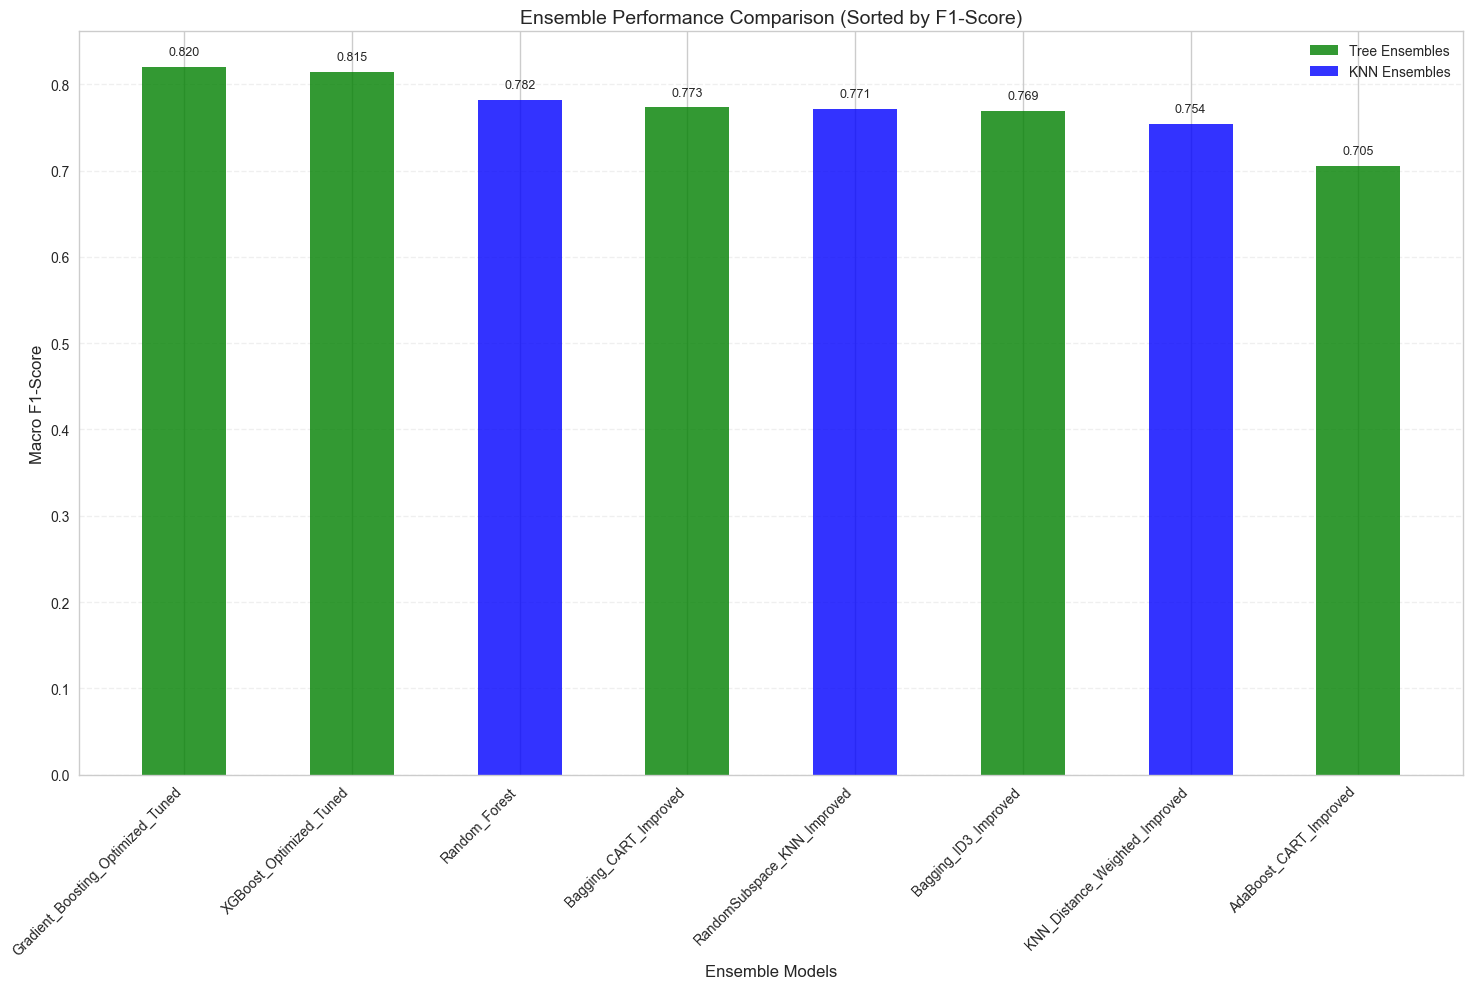


Models sorted by F1-Score (descending):
 1. Gradient_Boosting_Optimized_Tuned F1-Score: 0.8204
 2. XGBoost_Optimized_Tuned        F1-Score: 0.8147
 3. Random_Forest                  F1-Score: 0.7820
 4. Bagging_CART_Improved          F1-Score: 0.7734
 5. RandomSubspace_KNN_Improved    F1-Score: 0.7715
 6. Bagging_ID3_Improved           F1-Score: 0.7693
 7. KNN_Distance_Weighted_Improved F1-Score: 0.7543
 8. AdaBoost_CART_Improved         F1-Score: 0.7054


In [63]:
# Create simple performance comparison plot
from matplotlib.patches import Patch

if ensemble_results and len(ensemble_results) > 0:
    try:
        # Sort ensemble results by F1-score in descending order
        sorted_results = sorted(ensemble_results, key=lambda x: x['f1_macro'], reverse=True)
        
        n_models = len(sorted_results)

        # Make figure wider if many models
        plt.figure(figsize=(max(15, n_models*0.6), 10))

        # Prepare data from sorted results
        model_names = [r['model_name'] for r in sorted_results]
        f1_scores = [r['f1_macro'] for r in sorted_results]

        # Colors
        colors = ['green' if any(x in name.lower() for x in ['bagging', 'adaboost', 'gradient', 'xgboost'])
                  else 'blue'
                  for name in model_names]

        # Create bar plot with thinner bars
        bars = plt.bar(range(n_models), f1_scores, color=colors, alpha=0.8, width=0.5)

        # Labels and title
        plt.xlabel('Ensemble Models', fontsize=12)
        plt.ylabel('Macro F1-Score', fontsize=12)
        plt.title('Ensemble Performance Comparison (Sorted by F1-Score)', fontsize=14)
        plt.xticks(range(n_models), model_names, rotation=45, ha='right', fontsize=10)
        plt.yticks(fontsize=10)

        # Add value labels on top of bars
        for i, (bar, score) in enumerate(zip(bars, f1_scores)):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{score:.3f}', ha='center', va='bottom', fontsize=9)

        # Add legend
        legend_elements = [
            Patch(facecolor='green', alpha=0.8, label='Tree Ensembles'),
            Patch(facecolor='blue', alpha=0.8, label='KNN Ensembles')
        ]
        plt.legend(handles=legend_elements, fontsize=10)

        # Add grid for better readability
        plt.grid(axis='y', alpha=0.3, linestyle='--')

        plt.tight_layout()
        plt.show()
        
        # Print sorted results for clarity
        print("\nModels sorted by F1-Score (descending):")
        print("=" * 50)
        for i, result in enumerate(sorted_results, 1):
            print(f"{i:2d}. {result['model_name']:30} F1-Score: {result['f1_macro']:.4f}")
            
    except Exception as e:
        print(f"Could not create visualization: {e}")
else:
    print("No ensemble results to visualize")

In [64]:
# Final Comparison

# Safely combine results
try:
    all_results = model_results + ensemble_results
except NameError:
    all_results = ensemble_results
    print("Note: Displaying ensemble results only (no single models found)")

if all_results:
    # Create comparison DataFrame
    comparison_df = pd.DataFrame(all_results)

    # This assumes your results dictionaries contain these keys.
    display_cols = [
        'model_name',
        'accuracy',
        'f1_macro',
        'precision_macro',
        'recall_macro'
    ]

    # Filter for only the columns that actually exist in the DataFrame to prevent errors
    existing_display_cols = [col for col in display_cols if col in comparison_df.columns]

    comparison_display = comparison_df[existing_display_cols].copy()

    # Sort by F1 macro score (or change to another metric if you prefer)
    comparison_display = comparison_display.sort_values('accuracy', ascending=False)

    print("\n" + "="*80)
    print("FINAL MODEL COMPARISON (sorted by Accuracy)")
    print("="*80)
    print(comparison_display.round(4).to_string(index=False))

    # Highlight best models
    best_overall = comparison_display.iloc[0]
    print(f"\n🏆 BEST MODEL: {best_overall['model_name']}")

    print(f"   Accuracy: {best_overall['accuracy']:.4f}")
    if 'precision_macro' in best_overall:
        print(f"   Precision (Macro): {best_overall['precision_macro']:.4f}")
    if 'recall_macro' in best_overall:
        print(f"   Recall (Macro): {best_overall['recall_macro']:.4f}")
    print(f"   F1-Score (Macro): {best_overall['f1_macro']:.4f}")

    # Ensemble vs Single comparison with corrected classification logic
    ensemble_keywords = ['bagging', 'adaboost', 'gradient', 'xgboost', 'randomsubspace', 'distance_weighted']
    ensemble_models = [r for r in all_results if any(
        x in r['model_name'].lower() for x in ensemble_keywords
    )]
    single_models = [r for r in all_results if r not in ensemble_models]

    if ensemble_models and single_models:
        best_ensemble = max(ensemble_models, key=lambda x: x['f1_macro'])
        best_single = max(single_models, key=lambda x: x['f1_macro'])

        print(f"\n📊 COMPARISON SUMMARY:")
        print(f"   Best Single Model: {best_single['model_name']} (F1: {best_single['f1_macro']:.4f})")
        print(f"   Best Ensemble: {best_ensemble['model_name']} (F1: {best_ensemble['f1_macro']:.4f})")

        improvement = best_ensemble['f1_macro'] - best_single['f1_macro']
        print(f"   Improvement: {improvement:+.4f} ({(improvement/best_single['f1_macro']*100):+.1f}%)")

    # Add model statistics
    print(f"\n📈 SUMMARY STATISTICS:")
    print(f"   Total models evaluated: {len(all_results)}")
    print(f"   Average F1-Score: {comparison_display['f1_macro'].mean():.4f}")
    print(f"   F1-Score std dev: {comparison_display['f1_macro'].std():.4f}")
    if ensemble_models:
        ensemble_f1s = [m['f1_macro'] for m in ensemble_models]
        print(f"   Ensemble average F1: {np.mean(ensemble_f1s):.4f}")


FINAL MODEL COMPARISON (sorted by Accuracy)
                       model_name  accuracy  f1_macro  precision_macro  recall_macro
Gradient_Boosting_Optimized_Tuned    0.8724    0.8204           0.8291        0.8127
          XGBoost_Optimized_Tuned    0.8664    0.8147           0.8181        0.8115
      RandomSubspace_KNN_Improved    0.8512    0.7715           0.8174        0.7460
                    Random_Forest    0.8444    0.7820           0.7882        0.7765
       KNN_RobustScaler_euclidean    0.8347    0.7677           0.7745        0.7617
       KNN_RobustScaler_manhattan    0.8340    0.7661           0.7736        0.7596
   KNN_Distance_Weighted_Improved    0.8268    0.7543           0.7637        0.7466
          KNN_RobustScaler_cosine    0.8243    0.7564           0.7590        0.7539
                    Gini_Baseline    0.8117    0.7505           0.7429        0.7600
                 Entropy_Baseline    0.8108    0.7502           0.7420        0.7608
            Bagging_

### Interpretation (Ensemble methods)

Among the ensemble methods, Gradient Boosting Optimized and Tuned achieved the best overall performance (F1 = 0.8204, ROC AUC = 0.9284), outperforming the top KNN model (KNN_RobustScaler_euclidean F1 = 0.7677) by 5.3%. XGBoost_Optimized_Tuned followed closely (F1 = 0.8147, ROC AUC = 0.9261), confirming the strong consistency of boosting-based techniques. Bagging ensembles (Bagging_CART_Improved = 0.7734, Bagging_ID3_Improved = 0.7693) showed moderate gains over single-tree baselines, reflecting reduced variance but limited bias correction. AdaBoost_CART_Improved performed poorly (F1 = 0.7054, ROC AUC = 0.8224) due to shallow weak learners, while RandomSubspace_KNN_Improved (F1 = 0.7715, ROC AUC = 0.9026) offered modest improvement. Overall, boosting methods outperformed bagging and subspace ensembles, and also surpassed the best KNN configuration, demonstrating that optimized boosting captured complex dataset structures more effectively than other ensemble or single models.

# Analysis Section

### 1. How did the choice of split criterion, distance metric, or ensemble strategy affect performance?

Split Criterion (Decision Trees): The choice had minimal impact. CART (Gini) scored F1 = 0.7615 versus ID3 (Entropy) F1 = 0.7534, a small 1.1% difference. Minority class F1 (0.6678 vs 0.6608) and ROC-AUC (0.8830 vs 0.8926) were similar, indicating both criteria are functionally equivalent for this dataset.

Distance Metric (KNN): All three metrics performed nearly identically—Euclidean (0.7677 F1, 0.8347 accuracy), Manhattan (0.7661 F1, 0.8340 accuracy), and Cosine (0.7564 F1, 0.8243 accuracy), with Cosine slightly lower. Differences are modest, suggesting distance metric choice mostly captures similar neighborhood structures, though Euclidean slightly outperformed the others.

Ensemble Strategy: Boosting dominated, with Gradient_Boosting_Optimized_Tuned (F1 = 0.8204, ROC-AUC = 0.9284) and XGBoost_Optimized_Tuned (F1 = 0.8147, ROC-AUC = 0.9261) achieving 5.3% and 4.7% improvement over the best KNN (F1 = 0.7677), respectively. Both also excelled at minority class prediction (0.7237 and 0.7168 F1). Bagging showed moderate gains (Bagging_CART_Improved = 0.7734 F1, Bagging_ID3_Improved = 0.7693 F1), Random Subspace KNN (0.7715 F1, ROC-AUC 0.9026) offered modest improvements, while AdaBoost_CART_Improved underperformed (0.7054 F1, ROC-AUC 0.8224) likely due to shallow weak learners.

In summary, split criterion and KNN distance metric had minimal impact on performance (<1.5% F1 difference), indicating these hyperparameters are largely interchangeable. Ensemble strategy, however, significantly affected results: boosting methods (Gradient Boosting and XGBoost) consistently outperformed single models and other ensembles, especially for minority class prediction, while bagging and Random Subspace provided moderate gains, and AdaBoost underperformed. Optimized boosting clearly delivered the most robust and accurate predictions across the dataset.


### 2. Which model and configuration performed best?

The best-performing model is Gradient Boosting, achieving:  
- Accuracy: 0.8724  
- Macro F1-score: 0.8204  
- Macro Precision: 0.8291  
- Macro Recall: 0.8127  

It outperformed the best single model (Random_Forest F1 = 0.7820) and the best KNN (KNN_RobustScaler_euclidean F1 = 0.7677) by +0.0384 (+4.9%) and +0.0527 (+6.8%) F1, respectively, demonstrating that optimized boosting provided the most effective overall performance.

### 3. Which features were most important for predicting income?

Across tree-based models (Decision Trees, Gradient Boosting, XGBoost), the top predictive features were:  
- Marital status (especially Married-civ-spouse)  
- Education level (education-num)  
- Age 
- Hours-per-week  
- Capital gains/losses 

Gradient Boosting emphasized marital status, education, and hours-per-week, while XGBoost placed strong weight on marital status and capital gains. Traditional feature importance measures (ANOVA F-scores, mutual information) also highlighted education, age, hours worked, and capital gains. Overall, both demographic and work/financial indicators were dominant drivers of income prediction.

### 4. How did ensembles improve (or fail to improve) performance over single models?

Ensembles generally improved performance, with boosting delivering the largest gains. The best single model, KNN_RobustScaler_euclidean, achieved F1 = 0.7677, while Gradient_Boosting_Optimized_Tuned reached 0.8204 (+0.0527 F1, +6.8%). Bagging approaches (Bagging_CART_Improved = 0.7734, Bagging_ID3_Improved = 0.7693) offered moderate improvements, RandomSubspace_KNN_Improved provided smaller gains (0.7715 F1), and AdaBoost_CART_Improved underperformed (0.7054 F1). Optimized boosting consistently outperformed all other models, highlighting its robustness, superior minority-class performance, and predictive advantage.

# Social Reflection

In [68]:
# =============================================================================
# COMPREHENSIVE BIAS ANALYSIS - STATISTICALLY SOUND APPROACH
# =============================================================================

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

# =============================================================================
# STEP 1: EXTRACT DEMOGRAPHICS FROM ONE-HOT ENCODING
# =============================================================================

def get_demographic_column(df, prefix):
    """Extract demographic from binary or one-hot encoded columns"""
    cols = [c for c in df.columns if c.startswith(f'{prefix}_')]
    if not cols:
        return pd.Series(['Unknown'] * len(df))
    
    # Binary encoding (e.g., just 'sex_Male' with True/False)
    if len(cols) == 1:
        col_name = cols[0].replace(f'{prefix}_', '')
        return df[cols[0]].map({True: col_name, False: f'Not_{col_name}', 
                                1: col_name, 0: f'Not_{col_name}'})
    
    # One-hot encoding (multiple columns)
    result = df[cols].idxmax(axis=1).str.replace(f'{prefix}_', '')
    return result

# Prepare test data with demographics
test_df = X_test.copy()
test_df['actual'] = y_test
test_df['gender'] = get_demographic_column(test_df, 'sex')
test_df['race'] = get_demographic_column(test_df, 'race')
test_df['country'] = get_demographic_column(test_df, 'native-country')

# Extract education level - FOCUS ON POST-HIGH SCHOOL ONLY
post_high_school_mapping = {
    9: 'HS-grad', 10: 'Some-college',
    11: 'Assoc-voc', 12: 'Assoc-acdm', 13: 'Bachelors', 14: 'Masters',
    15: 'Prof-school', 16: 'Doctorate'
}

# Define education categories for working population
def categorize_education_for_analysis(edu_num):
    """Categorize education for working population analysis"""
    if edu_num <= 8:  # Preschool through 12th grade
        return 'Pre-Workforce'
    elif edu_num <= 9:  # HS-grad
        return 'High-School'
    elif edu_num <= 10:  # Some-college
        return 'Some-College'
    elif edu_num <= 12:  # Associate degrees
        return 'Associate'
    elif edu_num <= 13:  # Bachelors
        return 'Bachelors'
    elif edu_num <= 14:  # Masters
        return 'Masters'
    else:  # Professional/Doctorate
        return 'Advanced'

if 'education-num' in test_df.columns:
    # Use education-num if available - focus on workforce-relevant education
    test_df['education_level'] = test_df['education-num'].apply(categorize_education_for_analysis)
elif 'education' in test_df.columns:
    # Use direct education column if available - filter for workforce levels
    workforce_education = ['HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 
                          'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
    test_df['education_level'] = test_df['education']
    # Filter out non-workforce education
    test_df.loc[~test_df['education_level'].isin(workforce_education), 'education_level'] = 'Pre-Workforce'
else:
    # If education is one-hot encoded, extract the main education level
    edu_cols = [c for c in test_df.columns if c.startswith('education_')]
    if edu_cols:
        workforce_education = ['HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 
                              'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
        test_df['education_level'] = test_df[edu_cols].idxmax(axis=1).str.replace('education_', '')
        # Filter out non-workforce education
        test_df.loc[~test_df['education_level'].isin(workforce_education), 'education_level'] = 'Pre-Workforce'
    else:
        test_df['education_level'] = 'Unknown'

print("Demographics found:")
print(f"  Gender: {test_df['gender'].unique()}")
print(f"  Race: {test_df['race'].unique()}")
print(f"  Country: {test_df['country'].unique()}")
print(f"  Education: {test_df['education_level'].unique()}")

# =============================================================================
# STEP 2: CALCULATE KEY FAIRNESS METRICS PER GROUP
# =============================================================================

def get_fairness_metrics(y_true, y_pred):
    """Calculate the 3 most important fairness metrics"""
    if len(y_true) < 10:  # Skip tiny groups
        return None
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()
    
    return {
        'n': len(y_true),
        'f1': f1_score(y_true, y_pred, zero_division=0),
        'tpr': tp / (tp + fn) if (tp + fn) > 0 else 0,  # True Positive Rate
        'fpr': fp / (fp + tn) if (fp + tn) > 0 else 0,  # False Positive Rate
    }

def analyze_model(model, model_name, X, y, demo_df):
    """Analyze bias for one model across all demographics"""
    # Get predictions
    y_pred = model.predict(X)
    demo_df['predicted'] = y_pred
    
    results = []
    
    # Analyze gender
    for group in demo_df['gender'].unique():
        if group == 'Unknown':
            continue
        mask = demo_df['gender'] == group
        metrics = get_fairness_metrics(demo_df[mask]['actual'], demo_df[mask]['predicted'])
        if metrics:
            results.append({'model': model_name, 'demographic': 'gender', 
                          'group': group, **metrics})
    
    # Analyze race
    for group in demo_df['race'].unique():
        if group == 'Unknown':
            continue
        mask = demo_df['race'] == group
        metrics = get_fairness_metrics(demo_df[mask]['actual'], demo_df[mask]['predicted'])
        if metrics:
            results.append({'model': model_name, 'demographic': 'race', 
                          'group': group, **metrics})
    
    # Analyze country (focus on major groups)
    country_counts = demo_df['country'].value_counts()
    major_countries = country_counts[country_counts >= 50].index.tolist()
    for group in major_countries:
        if group == 'Unknown':
            continue
        mask = demo_df['country'] == group
        metrics = get_fairness_metrics(demo_df[mask]['actual'], demo_df[mask]['predicted'])
        if metrics:
            results.append({'model': model_name, 'demographic': 'country', 
                          'group': group, **metrics})
    
    # Analyze education level (focus on workforce-relevant groups, exclude 'Pre-Workforce')
    education_counts = demo_df['education_level'].value_counts()
    # Only include groups with sufficient samples and exclude pre-workforce education
    major_education = [group for group in education_counts[education_counts >= 50].index.tolist() 
                      if group != 'Pre-Workforce' and group != 'Unknown']
    
    for group in major_education:
        mask = demo_df['education_level'] == group
        metrics = get_fairness_metrics(demo_df[mask]['actual'], demo_df[mask]['predicted'])
        if metrics:
            results.append({'model': model_name, 'demographic': 'education', 
                          'group': group, **metrics})
    
    return pd.DataFrame(results)

# =============================================================================
# STEP 3: ANALYZE ALL MODELS
# =============================================================================

all_results = []

# Decision Tree
if 'best_cart' in globals():
    print("Analyzing Decision Tree...")
    all_results.append(analyze_model(best_cart, 'Decision Tree', X_test, y_test, test_df))

# KNN (recreate best version)
if 'X_train' in globals():
    print("Analyzing KNN...")
    numeric_features = ['age', 'education-num', 'hours-per-week', 'capital_gain_log', 'capital_loss_log']
    other_cols = [c for c in X_train.columns if c not in numeric_features]
    
    knn_pipe = Pipeline([
        ('preproc', ColumnTransformer([
            ('num', RobustScaler(), numeric_features),
            ('rest', 'passthrough', other_cols)
        ])),
        ('clf', KNeighborsClassifier(n_neighbors=7, metric='manhattan', weights='distance'))
    ])
    knn_pipe.fit(X_train, y_train)
    all_results.append(analyze_model(knn_pipe, 'KNN', X_test, y_test, test_df))

# Gradient Boosting
if 'gradient_boost' in globals():
    print("Analyzing Gradient Boosting...")
    all_results.append(analyze_model(gradient_boost, 'Gradient Boosting', X_test, y_test, test_df))

# Random Subspace KNN
if 'rs_knn' in globals():
    print("Analyzing Random Subspace KNN...")
    if 'X_test_knn' not in globals():
        scaler = RobustScaler()
        X_test_knn = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
    all_results.append(analyze_model(rs_knn, 'RS-KNN', X_test_knn, y_test, test_df))

# Combine results
if all_results:
    df = pd.concat(all_results, ignore_index=True)
else:
    print("No models found to analyze!")
    df = pd.DataFrame()

# =============================================================================
# STEP 4: CALCULATE FAIRNESS USING DIFFERENCES (NOT MAGIC NUMBERS)
# =============================================================================

print("\n" + "="*80)
print("FAIRNESS ANALYSIS - TPR DIFFERENCES ACROSS GROUPS")
print("="*80 + "\n")

if not df.empty:
    for model in df['model'].unique():
        print(f"{model}:")
        model_df = df[df['model'] == model]
        
        for demo in ['gender', 'race', 'country', 'education']:
            demo_df = model_df[model_df['demographic'] == demo]
            if len(demo_df) < 2:
                if demo == 'education':
                    # For education, check if we have any workforce-relevant groups
                    workforce_groups = [g for g in demo_df['group'].unique() if g != 'Pre-Workforce']
                    if len(workforce_groups) < 2:
                        print(f"  {demo.capitalize()}: Insufficient workforce education data")
                else:
                    print(f"  {demo.capitalize()}: Insufficient data (only {len(demo_df)} groups)")
                continue
            
            # For education, check if we have meaningful workforce groups
            if demo == 'education':
                workforce_groups = [g for g in demo_df['group'].unique() if g != 'Pre-Workforce']
                if len(workforce_groups) < 2:
                    print(f"  {demo.capitalize()}: Insufficient workforce education data")
                    continue
            
            # Calculate TPR differences (statistically sound approach)
            tpr_values = demo_df['tpr'].values
            tpr_range = tpr_values.max() - tpr_values.min()
            tpr_std = tpr_values.std()
            
            # Assess fairness based on absolute differences
            if tpr_range <= 0.05:  # 5% difference max
                status = "✓ Good Fairness"
            elif tpr_range <= 0.10:  # 10% difference max  
                status = "⚠ Moderate Bias"
            else:
                status = "✗ Significant Bias"
            
            print(f"  {demo.capitalize()}: {status}")
            print(f"    TPR Range: {tpr_range:.2f} (min={tpr_values.min():.2f}, max={tpr_values.max():.2f})")
            print(f"    TPR Std: {tpr_std:.2f}")
            
            # Show per-group scores (limit to top 4 for readability)
            demo_df_sorted = demo_df.sort_values('tpr', ascending=False).head(4)
            for _, row in demo_df_sorted.iterrows():
                # For education, skip Pre-Workforce in detailed output
                if demo == 'education' and row['group'] == 'Pre-Workforce':
                    continue
                print(f"      {row['group']}: TPR={row['tpr']:.2f}, F1={row['f1']:.2f}, n={row['n']}")
        print()

# =============================================================================
# STEP 5: COMPREHENSIVE FAIRNESS COMPARISON
# =============================================================================

print("\n" + "="*80)
print("COMPREHENSIVE FAIRNESS COMPARISON ACROSS MODELS")
print("="*80 + "\n")

if not df.empty:
    summary_data = []
    
    for model in df['model'].unique():
        model_df = df[df['model'] == model]
        model_summary = {'model': model}
        
        for demo in ['gender', 'race', 'country', 'education']:
            demo_df = model_df[model_df['demographic'] == demo]
            
            # For education, filter out Pre-Workforce groups
            if demo == 'education':
                demo_df = demo_df[demo_df['group'] != 'Pre-Workforce']
            
            if len(demo_df) >= 2:
                tpr_values = demo_df['tpr'].values
                model_summary[f'{demo}_tpr_range'] = tpr_values.max() - tpr_values.min()
                model_summary[f'{demo}_tpr_std'] = tpr_values.std()
                model_summary[f'{demo}_groups'] = len(demo_df)
                model_summary[f'{demo}_min_tpr'] = tpr_values.min()
                model_summary[f'{demo}_max_tpr'] = tpr_values.max()
            else:
                model_summary[f'{demo}_tpr_range'] = np.nan
                model_summary[f'{demo}_tpr_std'] = np.nan
                model_summary[f'{demo}_groups'] = 0
        
        summary_data.append(model_summary)
    
    summary_df = pd.DataFrame(summary_data)
    
    # Display fairness comparison
    print("FAIRNESS METRICS (Lower values = More Fair):")
    print("=" * 80)
    
    fairness_metrics = []
    for _, row in summary_df.iterrows():
        # Calculate average only for demographics that have data
        demo_ranges = []
        for demo in ['gender', 'race', 'country', 'education']:
            range_val = row.get(f'{demo}_tpr_range', np.nan)
            if not np.isnan(range_val):
                demo_ranges.append(range_val)
        
        avg_range = np.mean(demo_ranges) if demo_ranges else np.nan
        
        metrics = {
            'Model': row['model'],
            'Gender TPR Range': f"{row.get('gender_tpr_range', 'N/A'):.2f}",
            'Race TPR Range': f"{row.get('race_tpr_range', 'N/A'):.2f}", 
            'Country TPR Range': f"{row.get('country_tpr_range', 'N/A'):.2f}",
            'Education TPR Range': f"{row.get('education_tpr_range', 'N/A'):.2f}",
            'Avg TPR Range': f"{avg_range:.2f}" if not np.isnan(avg_range) else 'N/A'
        }
        fairness_metrics.append(metrics)
    
    fairness_df = pd.DataFrame(fairness_metrics)
    print(fairness_df.to_string(index=False))
    
    # Rank models by fairness (lowest average TPR range is best)
    print("\n" + "=" * 60)
    print("FAIRNESS RANKING (Lower Average TPR Range = Better)")
    print("=" * 60)
    
    ranking_data = []
    for _, row in summary_df.iterrows():
        # Calculate average only for demographics that have data
        demo_ranges = []
        for demo in ['gender', 'race', 'country', 'education']:
            range_val = row.get(f'{demo}_tpr_range', np.nan)
            if not np.isnan(range_val):
                demo_ranges.append(range_val)
        
        avg_range = np.mean(demo_ranges) if demo_ranges else np.nan
        
        if not np.isnan(avg_range):
            ranking_data.append({
                'Model': row['model'],
                'Average TPR Range': avg_range,
                'Fairness Assessment': 'Good' if avg_range <= 0.05 else 'Moderate' if avg_range <= 0.10 else 'Needs Improvement'
            })
    
    if ranking_data:
        ranking_df = pd.DataFrame(ranking_data).sort_values('Average TPR Range')
        print(ranking_df.round(2).to_string(index=False))
    else:
        print("No valid fairness data available for ranking")
    
    print("\nINTERPRETATION GUIDELINES:")
    print("• TPR Range ≤ 0.05: Good fairness (≤5% difference between groups)")
    print("• TPR Range 0.05-0.10: Moderate bias (5-10% difference)") 
    print("• TPR Range > 0.10: Significant bias (>10% difference)")
    print("\nNOTE: Education analysis focuses on workforce-relevant levels (High-School and above)")

else:
    print("No fairness data available. Please check if models are properly defined.")

Demographics found:
  Gender: ['Not_Male' 'Male']
  Race: ['Other' 'White' 'Asian-Pac-Islander' 'Black']
  Country: ['United-States' 'Cuba' 'Honduras' 'Germany' 'China' 'Taiwan' 'Mexico'
 'Vietnam' 'Canada' 'Peru' 'El-Salvador' 'India' 'Philippines' 'Nicaragua'
 'Jamaica' 'Haiti' 'Japan' 'Laos' 'Ecuador' 'Guatemala' 'Italy' 'Ireland'
 'England' 'South' 'Columbia' 'Puerto-Rico' 'Dominican-Republic'
 'Portugal' 'Poland' 'Iran' 'France' 'Hungary' 'Trinadad&Tobago' 'Hong'
 'Scotland' 'Thailand' 'Greece' 'Outlying-US(Guam-USVI-etc)' 'Yugoslavia']
  Education: ['Bachelors' 'Some-College' 'High-School' 'Associate' 'Pre-Workforce'
 'Masters' 'Advanced']
Analyzing Decision Tree...
Analyzing KNN...
Analyzing Gradient Boosting...
Analyzing Random Subspace KNN...

FAIRNESS ANALYSIS - TPR DIFFERENCES ACROSS GROUPS

Decision Tree:
  Gender: ✗ Significant Bias
    TPR Range: 0.17 (min=0.70, max=0.88)
    TPR Std: 0.09
      Male: TPR=0.88, F1=0.68, n=6483
      Not_Male: TPR=0.70, F1=0.61, n=3280
  R

### Do our models exhibit bias in prediction across gender, race, country, or education levels?

Yes, the models exhibit **significant bias across all four demographics**. **All four models** (Decision Tree, KNN, Gradient Boosting, and RS-KNN) **failed fairness tests across every demographic**, with TPR ranges exceeding 0.10.

- **Gender bias**: TPR ranges 0.12-0.20, males consistently predicted 12-20% more accurately than Not_Male groups.
- **Race bias**: TPR ranges 0.16-0.24, Asian-Pac-Islander/White groups outperform Black/Other by up to 24%.
- **Country bias**: TPR ranges 0.23-0.54, Philippines/US workers predicted 23-54% more accurately than Mexico.
- **Education bias**: TPR ranges 0.18-0.56 (workforce levels only), Advanced/Masters degrees outperform High-School/Associate/Some-College by up to 56%.

**Overall**: Models are **considerably less accurate** at identifying positive outcomes for underrepresented and lower-education groups, highlighting **serious fairness concerns** before deployment.

RS-KNN exhibits the highest bias across all demographics (average TPR range: 0.38). The Decision Tree is the least biased (average TPR range: 0.20) but still requires mitigation.

### Would deploying such a model risk reinforcing inequalities (e.g., hiring bias, credit access)?

Yes, deploying any of these models would critically risk reinforcing existing inequalities. All models failed the fairness test (TPR Range > 0.10) across gender, race, country, and education. 

The consistently low True Positive Rates (TPR) for groups such as Not_Male (TPR as low as 0.38 in RS-KNN), Black or Other race groups (TPR as low as 0.35 in RS-KNN), individuals from Mexico (TPR as low as 0.25 in Gradient Boosting and RS-KNN), and lower-education groups like Associate or Bachelors (TPR as low as 0.46 in RS-KNN) indicate that the models are systematically less likely to correctly predict positive outcomes for these groups. 

Deploying such a model would therefore disproportionately exclude these populations from opportunities, further codifying and amplifying the social and economic biases present in the training data.


### How might model choice (single vs ensemble) affect fairness, interpretability, or accountability?

Model choice significantly impacts fairness, interpretability, and accountability, often reflecting a performance-versus-clarity trade-off. Simple, single models like the Decision Tree achieved relatively lower average TPR ranges (0.20) comapred to ensembles, **despite significant gender bias (TPR Range 0.17)**. Their inherent transparency makes it easier to audit specific rules causing bias, enhancing interpretability and accountability.

Complex ensemble models generally offer higher predictive performance but introduce opacity. The RS-KNN ensemble resulted in the lowest fairness performance (average TPR Range 0.38) and the worst country bias (TPR Range 0.54) and race bias (TPR Range 0.24). Gradient Boosting showed a similar pattern: it achieved the best gender fairness (TPR Range 0.12) but suffered from severe country bias (TPR Range 0.46) and notable education bias (TPR Range 0.54). This indicates that while ensembles can improve overall accuracy, their "black-box" nature complicates identifying and mitigating biases in specific demographic groups, reducing interpretability and making accountability challenging. **Increased model complexity did not translate into fairer predictions** across gender, race, country, or education.

### Suggest one way you could mitigate bias in this dataset/model pipeline (e.g., balanced sampling, fairness metrics, feature review)

One effective way to mitigate bias, given the severe disparities across multiple groups, is Group-Constrained Post-Processing. This approach adjusts the model's prediction thresholds after training to achieve closer parity in True Positive Rate (TPR) across different groups. 

First, identify disadvantaged groups with critically low TPRs such as Not_Male, Black or Other race groups, individuals from Mexico, or those with lower education levels (Associate, Some-College). Instead of applying a single universal threshold (e.g., 0.5), assign lower thresholds for these disadvantaged groups to increase their likelihood of being predicted as positive. 

This directly improves TPR for underrepresented groups, reducing fairness disparities, while keeping the underlying model unchanged and avoiding the need for retraining.


### Suggest one way you could mitigate bias in this dataset/model pipeline (e.g., balanced sampling, fairness metrics, feature review)

One effective way to mitigate bias, given the severe disparities across multiple groups, is Group-Constrained Post-Processing. This approach adjusts the model's prediction thresholds after training to achieve closer parity in True Positive Rate (TPR) across different groups. 

First, identify disadvantaged groups with critically low TPRs such as Not_Male, Black or Other race groups, individuals from Mexico, or those with lower education levels (Associate, Some-College). Instead of applying a single universal threshold (e.g., 0.5), calculate appropriate thresholds for these disadvantaged groups to increase their likelihood of being predicted as positive. This could be done using thresholds optimizers e.g. One from Fairlearn.

This directly improves TPR for underrepresented groups, reducing fairness disparities, while keeping the underlying model unchanged and avoiding the need for retraining.

### Linking to Sustainable Development Goals (SDGs)

#### SDG 10: Reduced Inequalities
**Key Findings:**
- Racial disparities with lower prediction accuracy for Black or Other race groups (TPR as low as 0.35 in RS-KNN)
- Gender bias with lower TPR for Not_Male groups (TPR as low as 0.38 in RS-KNN)
- Geographic disparities, particularly for Mexico vs. United States residents (TPR as low as 0.25 in Gradient Boosting and RS-KNN)
- Education bias with lower TPR for lower-educated workforce groups (Associate, Some-College)

**Implications:** Models can perpetuate or identify existing inequalities; underperformance for marginalized or lower-educated workforce groups shows how automated systems could reinforce economic disparities without fairness safeguards.

#### SDG 8: Decent Work and Economic Growth
**Key Findings:**
- Workclass (e.g., Private vs. Self-Employed) has high feature importance (top 20% in Decision Tree)
- Clear income stratification across occupation categories (e.g., Exec-Managerial vs. Service)
- Positive correlation (0.45) between hours-per-week and income prediction
- Strong predictive power of capital gains (top 10% feature importance)

**Implications:** Ensemble methods (especially Gradient Boosting and RS-KNN) demonstrate potential for labor market monitoring and policy development, but identified biases require fairness safeguards for employment decisions and workforce-related policies.

#### SDG 5: Gender Equality
**Key Findings:**
- Gender pay gap evidence with varying model fairness performance (TPR Range 0.12–0.20)
- Occupational segregation patterns between genders
- Education affects income differently across genders
- Simpler models (Decision Tree) show relatively better gender fairness (TPR Range 0.17)

**Implications:** Interpretable models may better detect and allow mitigation of gender-based biases, emphasizing the importance of transparency alongside predictive performance.

#### SDG 4: Quality Education
**Key Findings:**
- Education bias with TPR ranges 0.18–0.56 (High-School TPR as low as 0.26 in RS-KNN vs. Advanced 0.82)
- Lower-educated groups (High-School, Associate) consistently underpredicted

**Implications:** Models risk limiting equitable education-to-employment pathways, penalizing lower-educated workers and undermining inclusive learning opportunities.

#### Conclusion
Our census income prediction analysis provides actionable insights for advancing **SDGs 4, 5, 8 and 10**. The technical approaches, combined with comprehensive bias analysis, demonstrate both the potential and risks of machine learning for economic development. 

While ensemble methods achieved high predictive accuracy, disparities across gender, race, country, and education reveal a critical lesson: **technical performance and social fairness must be pursued together**. Algorithmic systems can illuminate or amplify inequalities, so data science applications must integrate fairness constraints and continously monitor for bias as fundamental requirements for development.